# PRCP-1023-JohnsHopkinsCovid19 - Covid Prediction
    
  By: PTID-CDS-JAN22-1266<br>
      Guiller Fiestada
                             

### Datasets

- **time_series_covid19_confirmed_global.csv**

    - This is the confirmed covid 19 cases globally.

- **time_series_covid19_deaths_global.csv**

    - This is the number of death cause by covid 19 globally.
    
- **time_series_covid19_recovered_global.csv**
    
    - This is the data for patients recovered cause by covid 19.

# 1. Importing Libraries


In [1]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import numpy as np
import pandas as pd
from pandas import datetime
import random
import math
from math import sqrt
import time
import datetime
import operator

# data visualization
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns

#model validation
from sklearn.metrics import mean_squared_error, mean_absolute_error



# 2. Loading Dataset 

In [3]:
confirmed_cases  =  pd.read_csv('time_series_covid19_confirmed_global.csv',)
death_cases  =  pd.read_csv('time_series_covid19_deaths_global.csv')
recovery_cases  =  pd.read_csv('time_series_covid19_recovered_global.csv')

# 3. EDA

In [4]:
confirmed_cases.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/12/20  9/13/20  9/14/20  \
0        0        0        0        0  ...    38641    38716    38772   
1        0        0        0        0  ...    11185    11353    11520   
2        0        0        0        0  ...    48007    48254    48496   
3        0        0        0        0  ...     1344     1344     1438   
4        0        0        0        0  ...     3335     3388     3439   

   9/15/20  9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
0    38815    38855    38872    38883    38919    39044    39074  
1    11672    11816    11948    12073    12226    12385    12535  
2    48734    48966    49194    49413    49623    49826    50023  
3     1438     1483     1483     1564     1564     1564     1681  
4     3569     3675     3789     3848     3901     3991     4117  

[5 rows x 248 columns]

In [5]:
death_cases.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/12/20  9/13/20  9/14/20  \
0        0        0        0        0  ...     1420     1420     1425   
1        0        0        0        0  ...      330      334      338   
2        0        0        0        0  ...     1605     1612     1620   
3        0        0        0        0  ...       53       53       53   
4        0        0        0        0  ...      132      134      136   

   9/15/20  9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
0     1426     1436     1436     1437     1437     1441     1444  
1      340      343      347      353      358      362      364  
2     1632     1645     1654     1659     1665     1672     1679  
3       53       53       53       53       53       53       53  
4      139      143      144      147      147      152      154  

[5 rows x 248 columns]

In [6]:
recovery_cases.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/12/20  9/13/20  9/14/20  \
0        0        0        0        0  ...    31234    31638    32073   
1        0        0        0        0  ...     6494     6569     6615   
2        0        0        0        0  ...    33875    34037    34204   
3        0        0        0        0  ...      943      943      945   
4        0        0        0        0  ...     1289     1301     1324   

   9/15/20  9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
0    32098    32503    32505    32576    32576    32576    32576  
1     6668     6733     6788     6831     6888     6940     6995  
2    34385    34517    34675    34818    34923    35047    35180  
3      945     1054     1054     1164     1164     1164     1199  
4     1332     1401     1405     1443     1445     1445     1449  

[5 rows x 248 columns]

In [7]:
print("Shape of confirmed cases: ",confirmed_cases.shape)
print("Shape of death cases: ",death_cases.shape)
print("Shape of recovery cases: ",recovery_cases.shape)

Shape of confirmed cases:  (266, 248)
Shape of death cases:  (266, 248)
Shape of recovery cases:  (253, 248)


In [8]:
# Extracting all the columns using the .keys() function

cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=248)

In [9]:
# Extracting only the dates columns that have information of confirmed, deaths and recovered cases
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = death_cases.loc[:, cols[4]:cols[-1]]
recoveries = recovery_cases.loc[:, cols[4]:cols[-1]]

In [9]:
confirmed.head().style.background_gradient(cmap='Wistia',axis=1)

In [11]:
# Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
# Also, calculate the total mortality rate which is the death_sum/confirmed cases

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = []
active_cases = []
close_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    active_cases = confirmed_sum - death_sum - recovered_sum
    close_cases= death_sum + recovered_sum
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [12]:
# Checking total number of cases

print("Total number of confirmed cases: ", confirmed_sum)
print("Total number of deaths: ", death_sum)
print("Total number of recovered patients: ", recovered_sum)
print("Percentage of death per confirmed cases: ", round((death_sum/confirmed_sum*100),2), "%")
print("Percentage of recoveries per confirmed cases: ", round((recovered_sum/confirmed_sum*100),2), "%")
print("Total active cases: ",  active_cases)
print("Total closed cases: ",  close_cases)

Total number of confirmed cases:  31245797
Total number of deaths:  963693
Total number of recovered patients:  21394593
Percentage of death per confirmed cases:  3.08 %
Percentage of recoveries per confirmed cases:  68.47 %
Total active cases:  8887511
Total closed cases:  22358286


In [13]:
# Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [13]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [14]:
total_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2008],
       [  2123],
       [  2248],
       [  2252],
       [  2459],
       [  2470],
       [  2630],
       [  2710],
       [  2771],
       [  2814],
       [  2873],
       [  2942],
       [  2996],
       [  3085],
       [  3160],
       [  3255],
       [  3348],
       [  3460],
       [  3559],
       [  3803],
       [  3987],
       [  4267],
       [  4611],
       [  4917],
       [  5414],
       [  5834],
       [  6475],
       [  7153],
       [  7964],
       [  8867],
       [  9981],
       [ 11460

In [15]:
total_recovered

array([[      28],
       [      30],
       [      36],
       [      39],
       [      52],
       [      61],
       [     107],
       [     126],
       [     143],
       [     222],
       [     284],
       [     472],
       [     623],
       [     852],
       [    1124],
       [    1487],
       [    2011],
       [    2616],
       [    3244],
       [    3946],
       [    4683],
       [    5150],
       [    6295],
       [    8058],
       [    9395],
       [   10865],
       [   12583],
       [   14352],
       [   16121],
       [   18177],
       [   18890],
       [   22886],
       [   23394],
       [   25227],
       [   27905],
       [   30384],
       [   33277],
       [   36711],
       [   39782],
       [   42716],
       [   45602],
       [   48228],
       [   51170],
       [   53796],
       [   55865],
       [   58359],
       [   60694],
       [   62493],
       [   64404],
       [   67002],
       [   68324],
       [   70251],
       [   7

In [16]:
world_cases

array([[     555],
       [     654],
       [     941],
       [    1434],
       [    2118],
       [    2927],
       [    5578],
       [    6166],
       [    8234],
       [    9926],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30802],
       [   34395],
       [   37129],
       [   40159],
       [   42768],
       [   44810],
       [   45228],
       [   60381],
       [   66908],
       [   69050],
       [   71234],
       [   73269],
       [   75151],
       [   75651],
       [   76211],
       [   76840],
       [   78601],
       [   78981],
       [   79545],
       [   80398],
       [   81375],
       [   82735],
       [   84120],
       [   86013],
       [   88395],
       [   90372],
       [   92957],
       [   95272],
       [   98028],
       [  102018],
       [  106036],
       [  109993],
       [  113946],
       [  118967],
       [  126675],
       [  132450],
       [  146783],
       [  15

In [17]:
# Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

In [19]:

future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [20]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [21]:
# For visualization with the latest data 

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = death_cases[dates[-1]]
latest_recoveries = recovery_cases[dates[-1]]

In [22]:
latest_confirmed

0      39074
1      12535
2      50023
3       1681
4       4117
       ...  
261    36151
262       10
263     2028
264    14175
265     7683
Name: 9/21/20, Length: 266, dtype: int64

In [23]:
latest_deaths

0      1444
1       364
2      1679
3        53
4       154
       ... 
261     265
262       1
263     586
264     331
265     225
Name: 9/21/20, Length: 266, dtype: int64

In [24]:
latest_recoveries

0      32576
1       6995
2      35180
3       1199
4       1449
       ...  
248    24428
249        8
250     1235
251    13629
252     5924
Name: 9/21/20, Length: 253, dtype: int64

## Worldwide Overview 
Graphing the number of confirmed cases, deaths, and mortality rate (CFR). This gives us a big picture of the ongoing pandemic. 


In [25]:
# check each countries infected by covid using world map

import folium

world_map = folium.Map(location=[0,0], zoom_start=2,tiles='CartoDB positron')

for lat, lon,conf in zip(confirmed_cases['Lat'], confirmed_cases['Long'],confirmed_cases.iloc[:,-1]):
    folium.CircleMarker([lat, lon], 
                        radius=5,color='red',
                        fill_color='red',fill_opacity=0.5,
                        tooltip="Confirmed Cases :"+str(conf)).add_to(world_map)
world_map

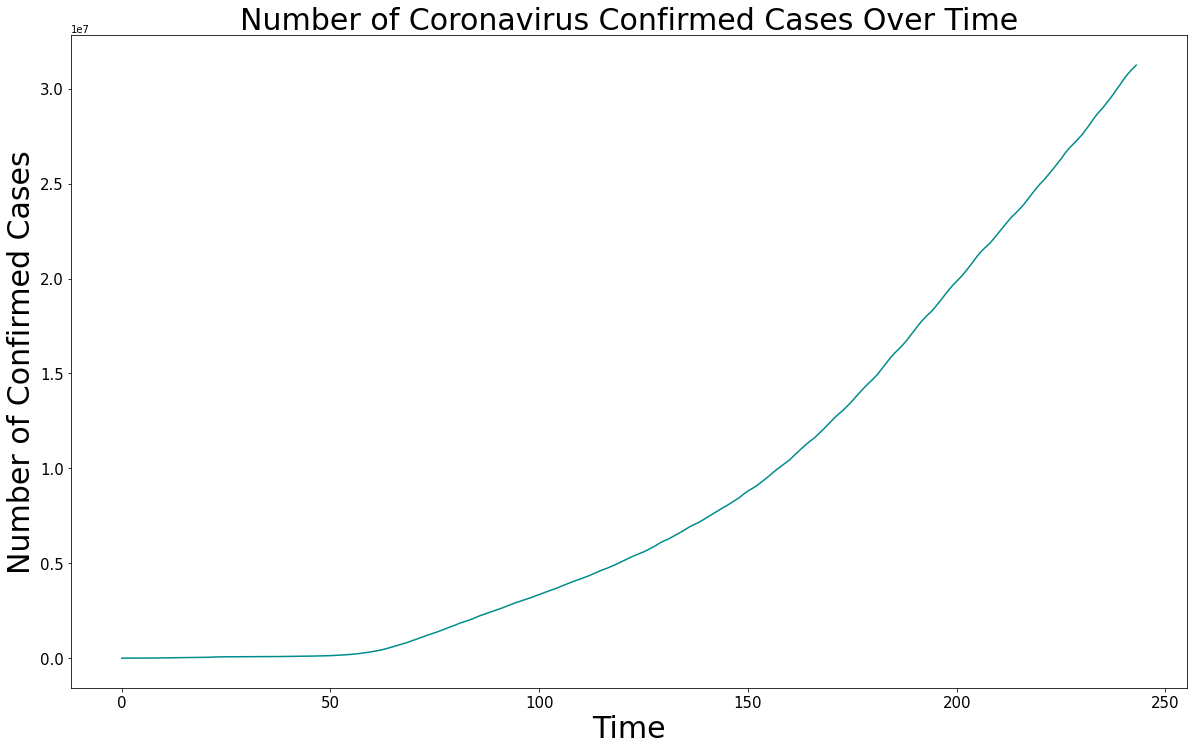

In [26]:
# Total confirmed cases over time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='darkcyan')
plt.title('Number of Coronavirus Confirmed Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Confirmed Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

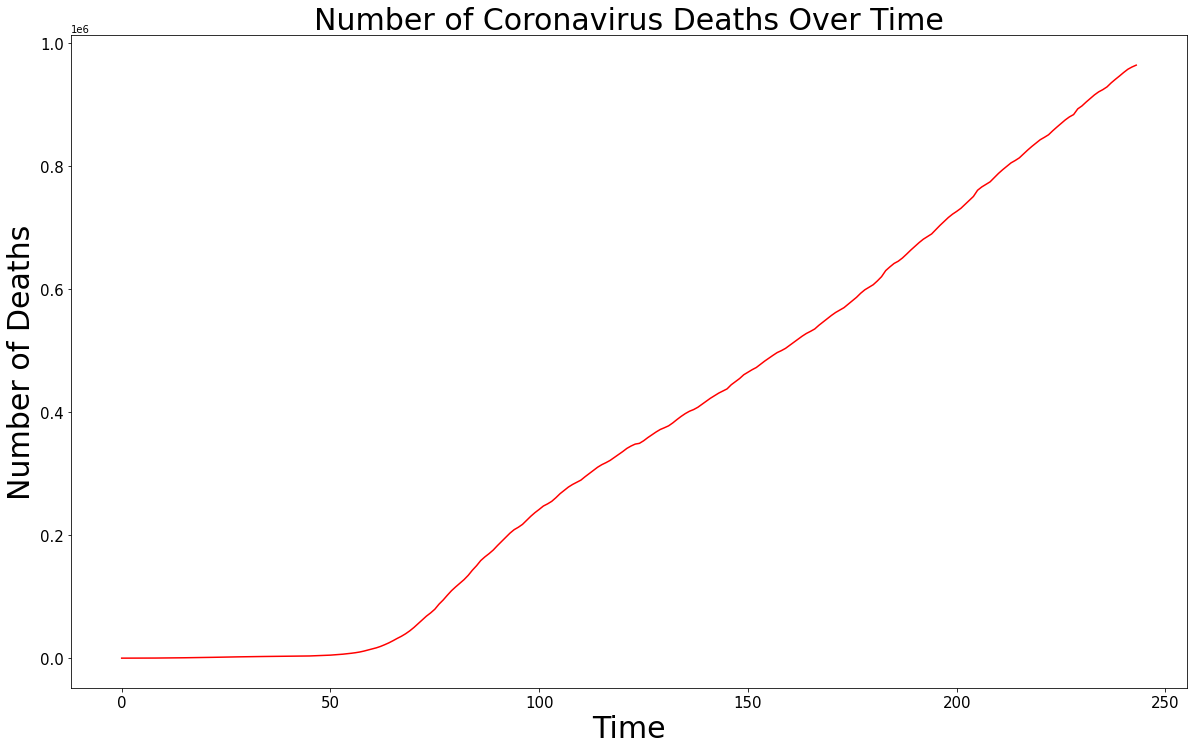

In [26]:
# Total deaths over time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

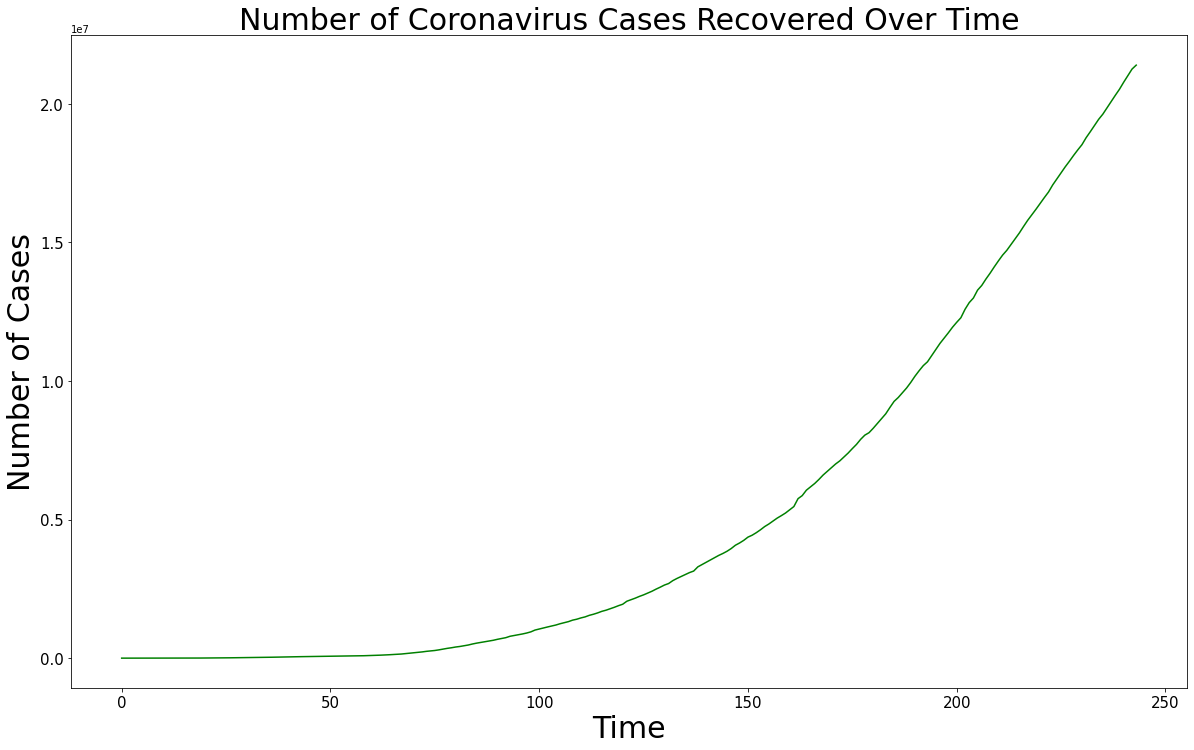

In [27]:
# Coronavirus Cases Recovered Over Time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

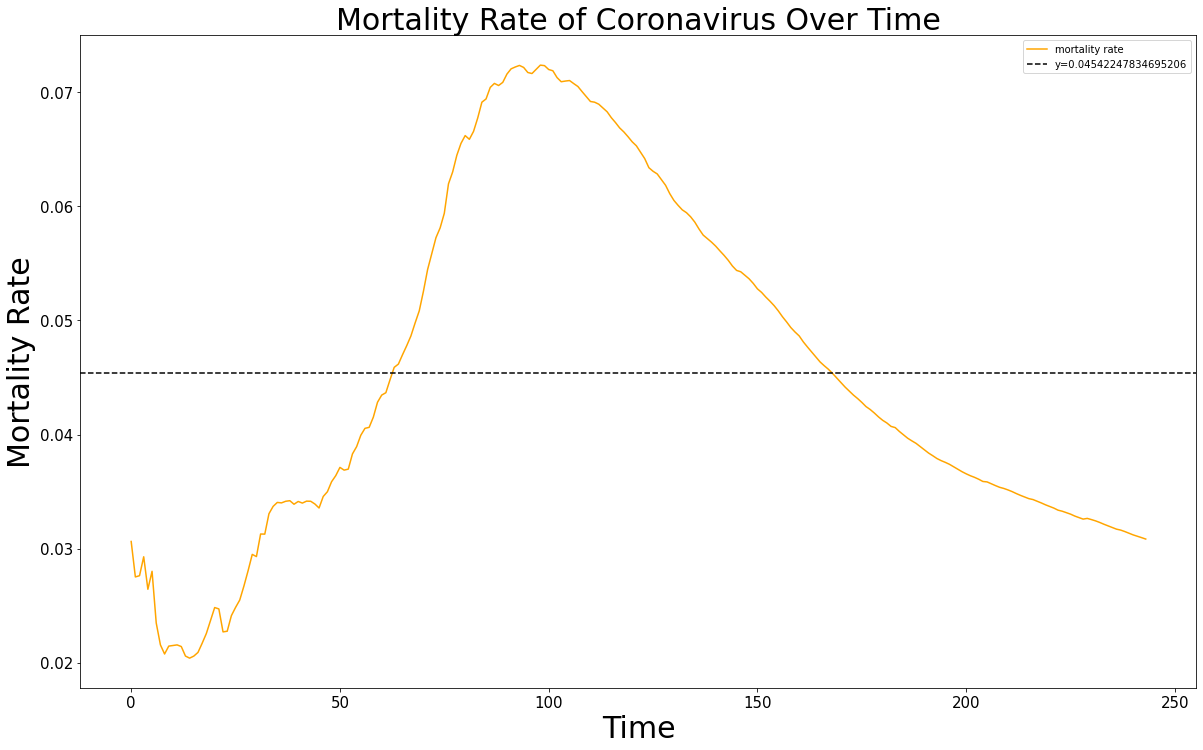

In [28]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

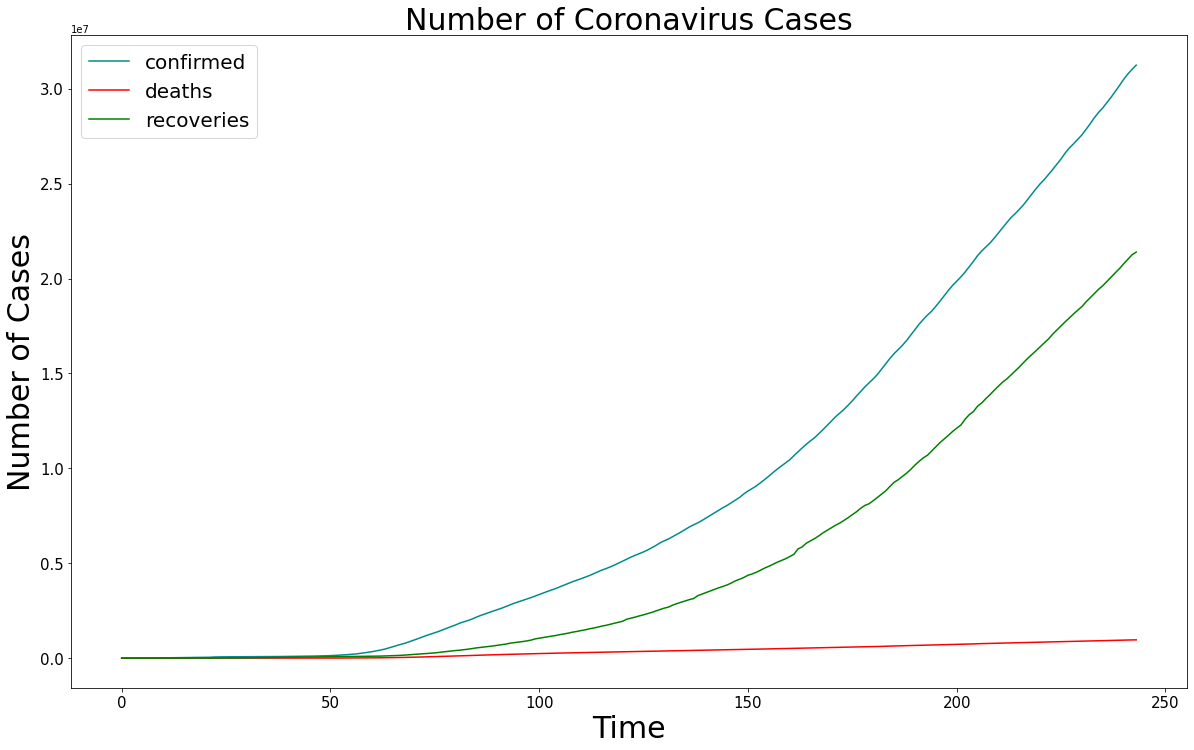

In [28]:
# Number of Coronavirus cases comparison

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='darkcyan')
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['confirmed','deaths', 'recoveries',], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

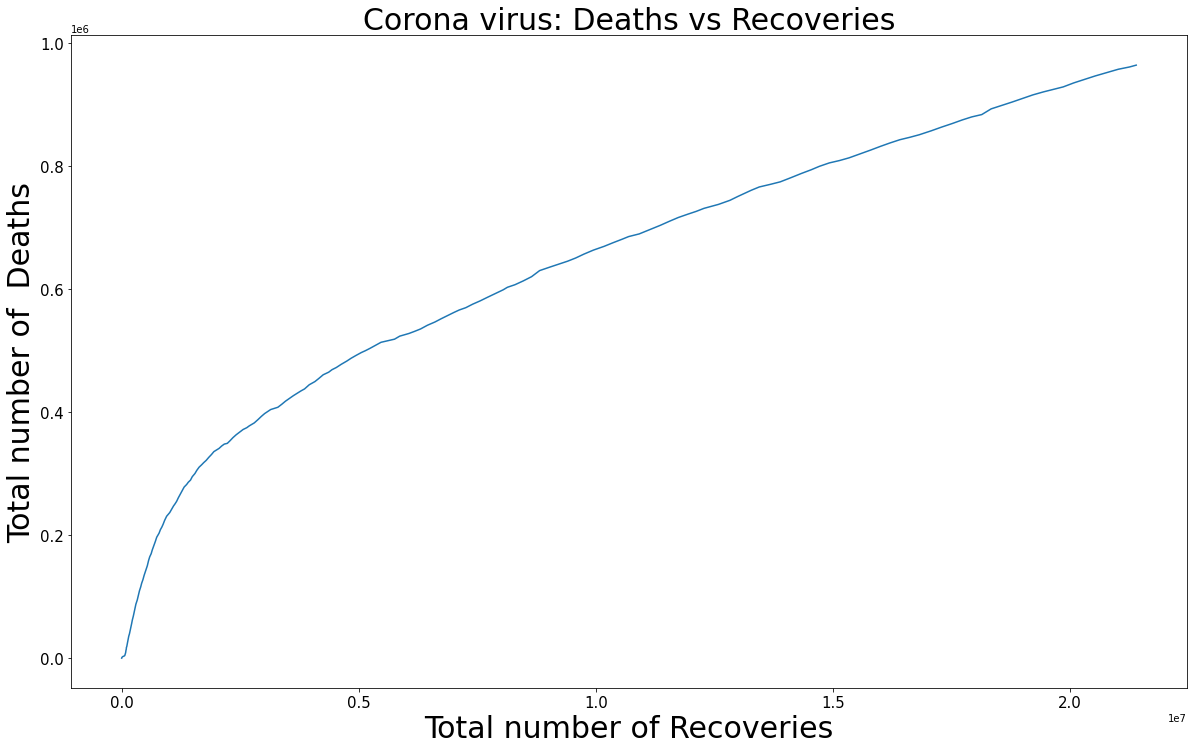

In [29]:
# Coronavirus Deaths vs Recoveries

plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Corona virus: Deaths vs Recoveries', size=30)
plt.xlabel('Total number of Recoveries', size=30)
plt.ylabel('Total number of  Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [30]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# moving average (7days)
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


# recoveries
world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)


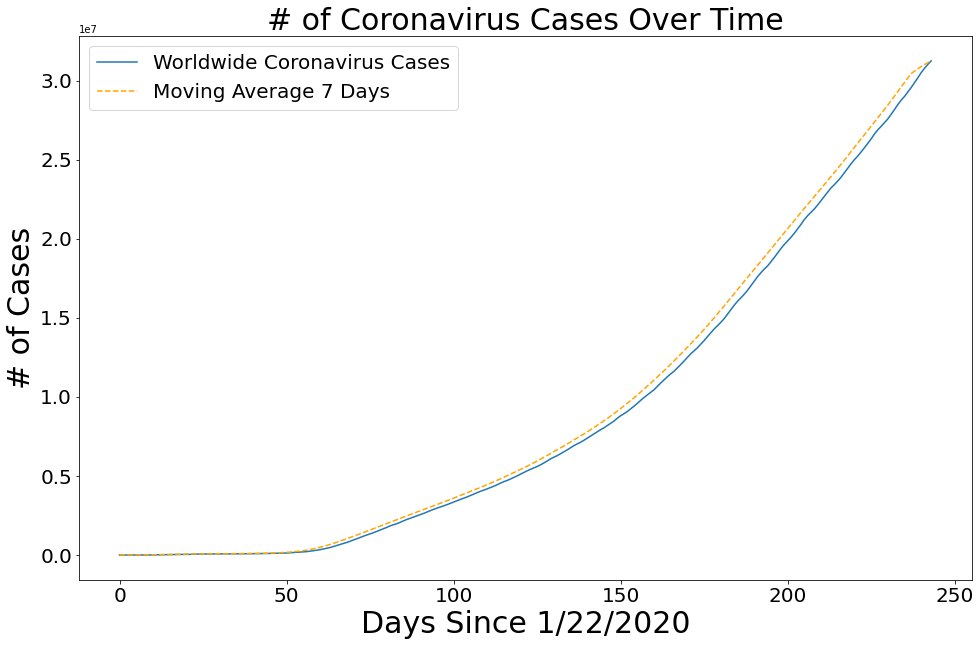

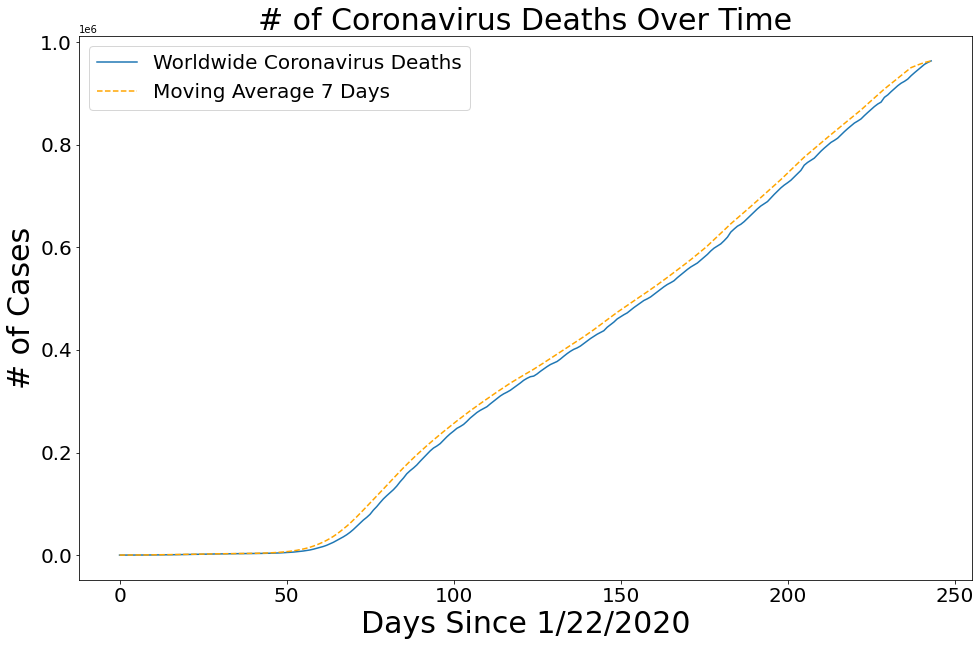

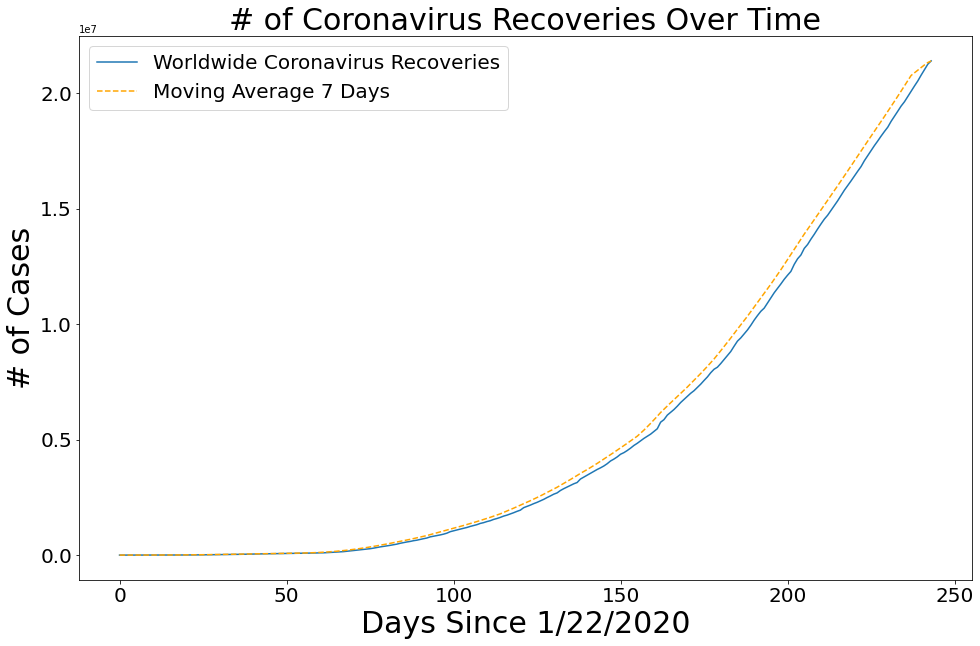

In [31]:
#Worldwide cases against 7 days moving average

adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, world_recovery_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Recoveries', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

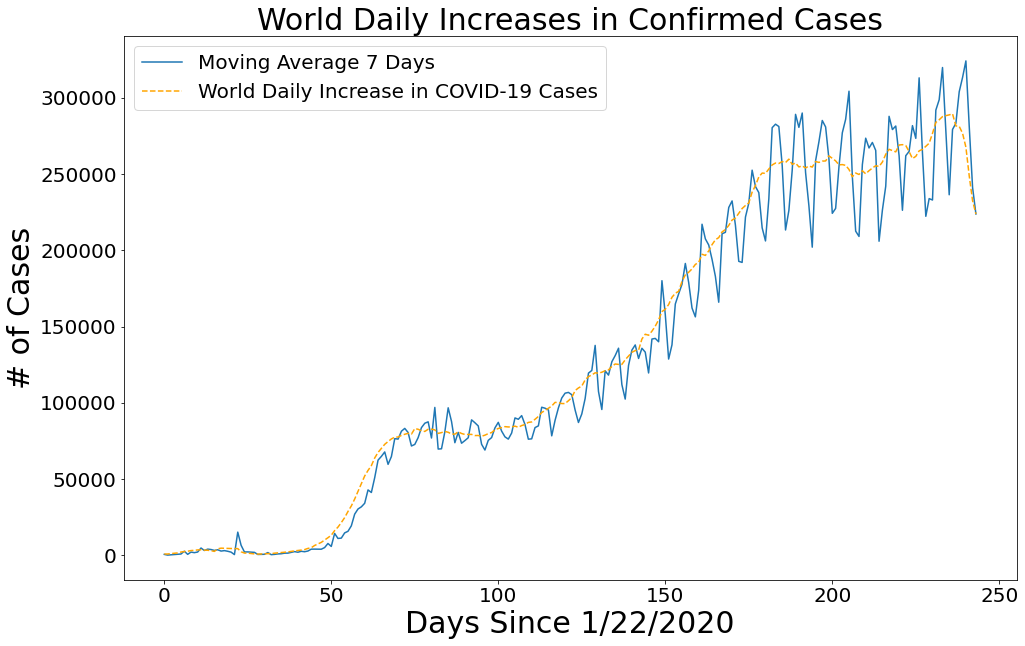

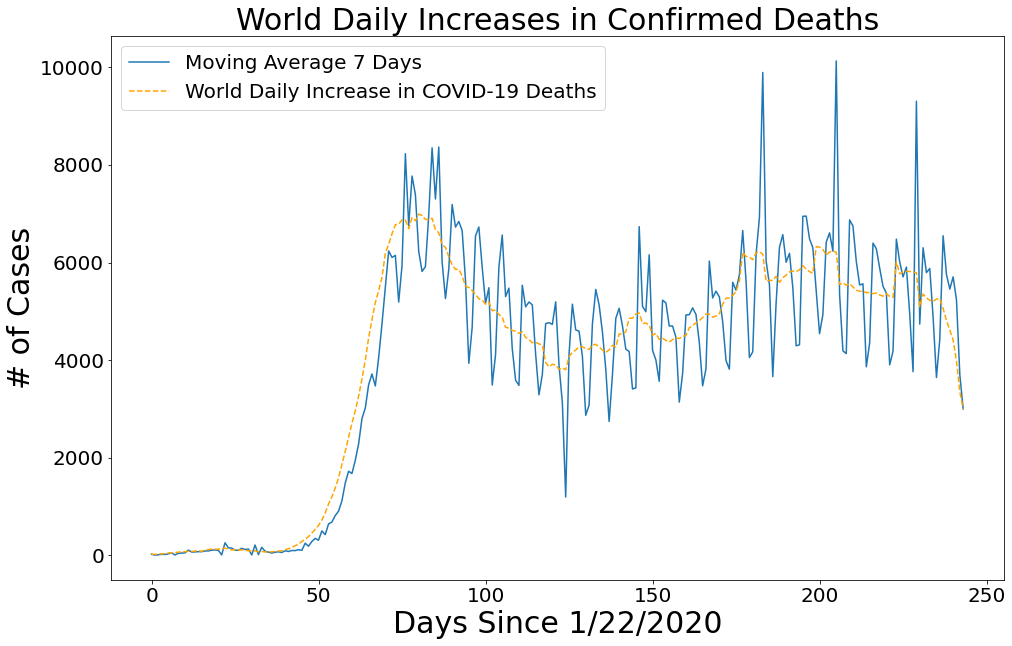

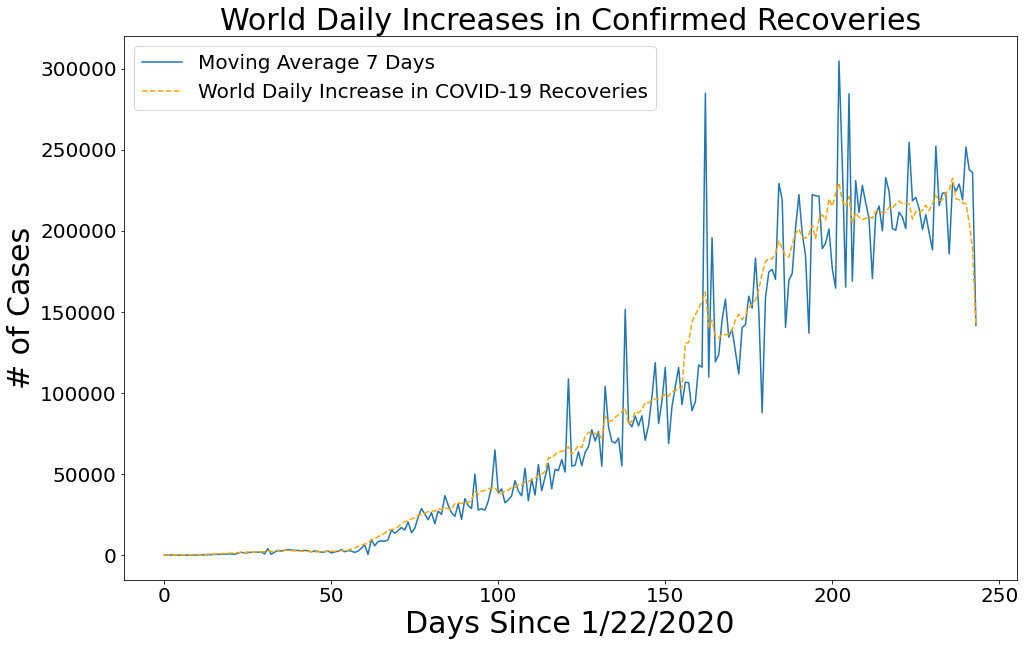

In [32]:
# Daily increase of cases vs. 7 days moving average

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_daily_increase, )
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_daily_recovery)
plt.plot(adjusted_dates, world_daily_recovery_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [39]:
# Find the list of unique countries

unique_countries =  list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [41]:
# calculation of the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [42]:
# number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 6856884 cases
India: 5487580 cases
Brazil: 4558040 cases
Russia: 1105048 cases
Colombia: 770435 cases
Peru: 768895 cases
Mexico: 700580 cases
Spain: 671468 cases
South Africa: 661936 cases
Argentina: 640147 cases
France: 496851 cases
Chile: 447468 cases
Iran: 425481 cases
United Kingdom: 401122 cases
Bangladesh: 350621 cases
Saudi Arabia: 330246 cases
Iraq: 322856 cases
Pakistan: 306886 cases
Turkey: 304610 cases
Italy: 299506 cases
Philippines: 290190 cases
Germany: 275560 cases
Indonesia: 248852 cases
Israel: 190929 cases
Ukraine: 182900 cases
Canada: 147583 cases
Bolivia: 130986 cases
Ecuador: 126711 cases
Qatar: 123604 cases
Romania: 113589 cases
Dominican Republic: 108783 cases
Kazakhstan: 107374 cases
Panama: 106810 cases
Belgium: 103392 cases
Morocco: 103119 cases
Egypt: 102141 cases
Netherlands: 100491 cases
Kuwait: 99964 cases
Oman: 94051 cases
China: 90381 cases
Sweden: 88237 cases
Guatemala: 85681 cases
United Arab Emirates: 85595 ca

In [43]:
# Find the list of unique provinces

unique_provinces =  list(confirmed_cases['Province/State'].unique())
unique_provinces


[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Yukon',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'New Caledonia',
 'Reunion',
 'Saint Barthelemy',
 'Saint Pierre and Miqu

In [45]:
# Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
for i in no_cases:
    unique_provinces.remove(i)

In [46]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 113 cases
New South Wales: 4206 cases
Northern Territory: 33 cases
Queensland: 1153 cases
South Australia: 466 cases
Tasmania: 230 cases
Victoria: 20076 cases
Western Australia: 665 cases
Alberta: 16739 cases
British Columbia: 8208 cases
Grand Princess: 13 cases
Manitoba: 1608 cases
New Brunswick: 196 cases
Newfoundland and Labrador: 272 cases
Northwest Territories: 5 cases
Nova Scotia: 1086 cases
Ontario: 49442 cases
Prince Edward Island: 57 cases
Quebec: 68128 cases
Saskatchewan: 1814 cases
Yukon: 15 cases
Anhui: 991 cases
Beijing: 935 cases
Chongqing: 584 cases
Fujian: 396 cases
Gansu: 170 cases
Guangdong: 1803 cases
Guangxi: 258 cases
Guizhou: 147 cases
Hainan: 171 cases
Hebei: 365 cases
Heilongjiang: 948 cases
Henan: 1279 cases
Hong Kong: 5038 cases
Hubei: 68139 cases
Hunan: 1019 cases
Inner Mongolia: 263 cases
Jiangsu: 665 cases
Jiangxi: 935 cases
Jilin: 157 cases
Liaoning: 265 cases
Macau: 46 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 401 ca

In [47]:
# handling nan values if there is any

nan_indices = [] 


for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

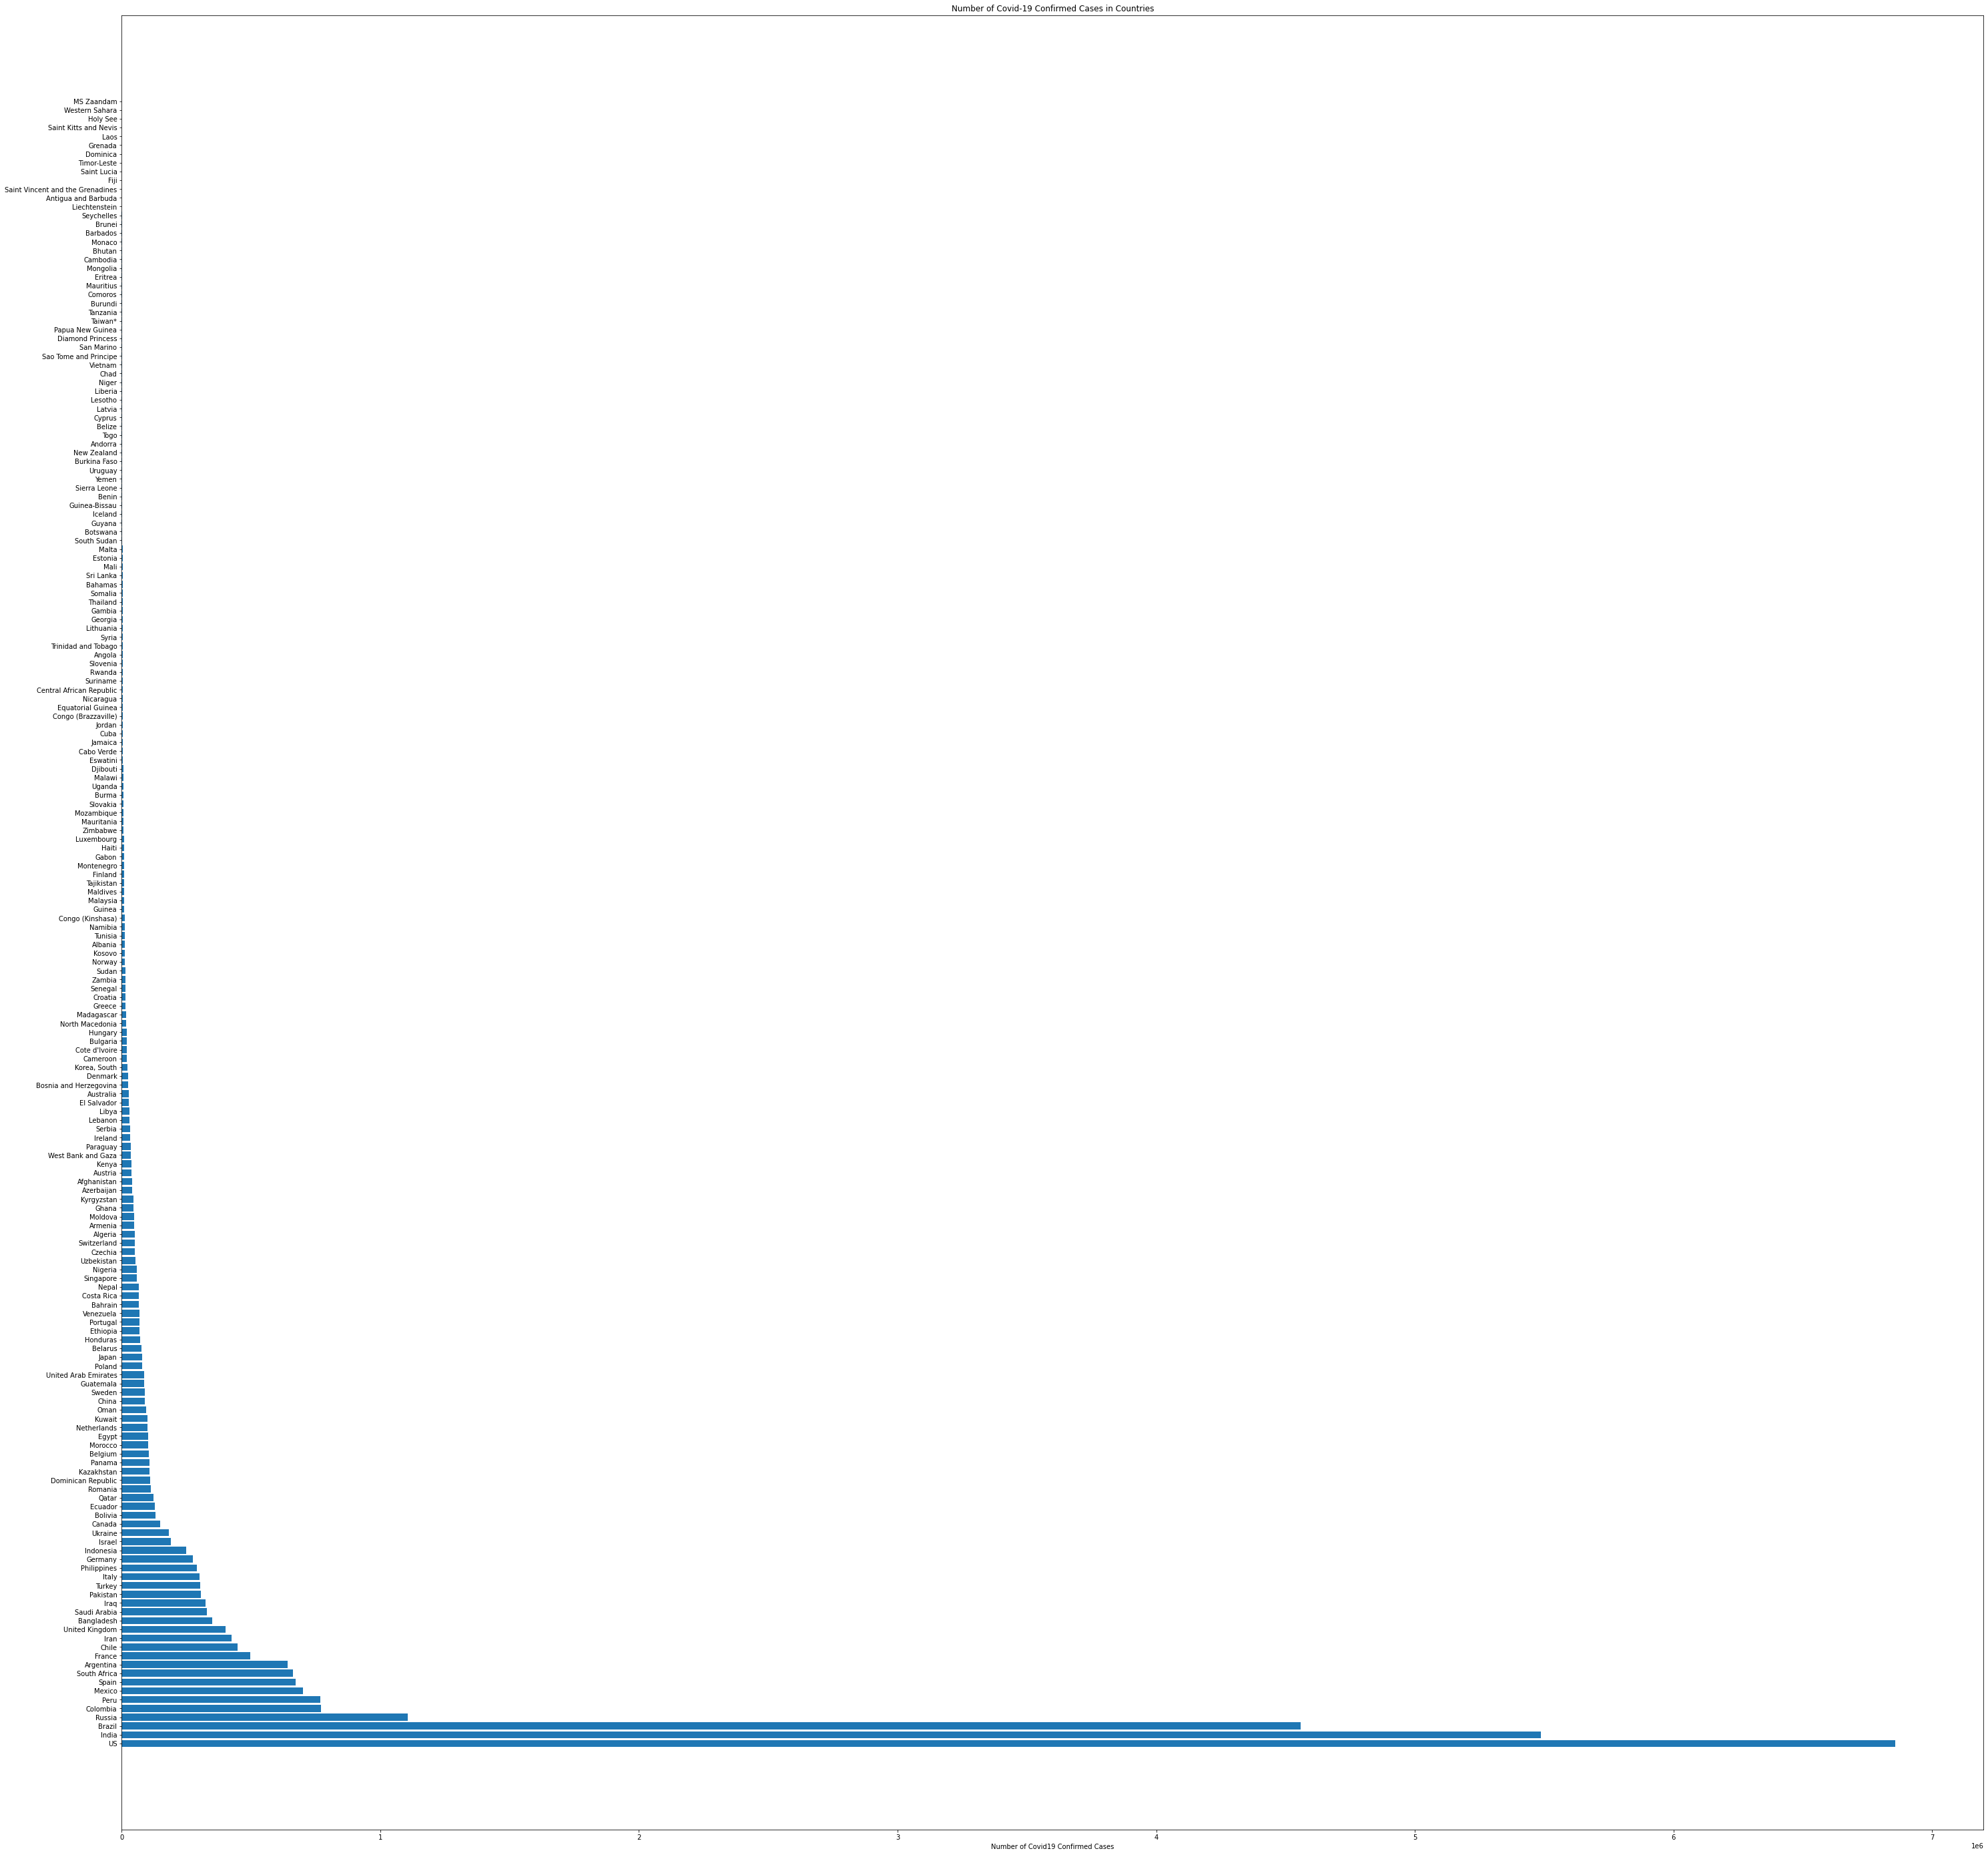

In [48]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(50, 50))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

In [49]:
# calculation of the total number of death cases by each country
d_unique_countries =  list(death_cases['Country/Region'].unique())

country_death_cases = []
no_death_cases = []
for i in d_unique_countries:
    d_cases = latest_deaths[death_cases['Country/Region']==i].sum()
    if cases > 0:
        country_death_cases.append(d_cases)
    else:
        no_death_cases.append(i)
        
for i in no_death_cases:
    d_unique_countries.remove(i)
    
d_unique_countries = [k for k, v in sorted(zip(d_unique_countries, country_death_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(d_unique_countries)):
    country_death_cases[i] = latest_deaths[death_cases['Country/Region']==d_unique_countries[i]].sum()

In [50]:
# number of deaths cases per country/region

print('Death Cases by Countries/Regions:')
for i in range(len(d_unique_countries)):
    print(f'{d_unique_countries[i]}: {country_death_cases[i]} cases')

Death Cases by Countries/Regions:
US: 199865 cases
Brazil: 137272 cases
India: 87882 cases
Mexico: 73697 cases
United Kingdom: 41877 cases
Italy: 35724 cases
Peru: 31369 cases
France: 31346 cases
Spain: 30663 cases
Iran: 24478 cases
Colombia: 24397 cases
Russia: 19420 cases
South Africa: 15992 cases
Argentina: 13482 cases
Chile: 12298 cases
Ecuador: 11095 cases
Belgium: 9950 cases
Indonesia: 9677 cases
Germany: 9390 cases
Canada: 9279 cases
Iraq: 8625 cases
Bolivia: 7654 cases
Turkey: 7574 cases
Pakistan: 6424 cases
Netherlands: 6327 cases
Sweden: 5865 cases
Egypt: 5787 cases
Philippines: 4999 cases
Bangladesh: 4979 cases
China: 4737 cases
Saudi Arabia: 4512 cases
Romania: 4458 cases
Ukraine: 3652 cases
Guatemala: 3124 cases
Poland: 2298 cases
Panama: 2272 cases
Honduras: 2204 cases
Dominican Republic: 2054 cases
Switzerland: 2050 cases
Portugal: 1920 cases
Morocco: 1855 cases
Ireland: 1792 cases
Algeria: 1679 cases
Kazakhstan: 1671 cases
Japan: 1518 cases
Afghanistan: 1444 cases
Israe

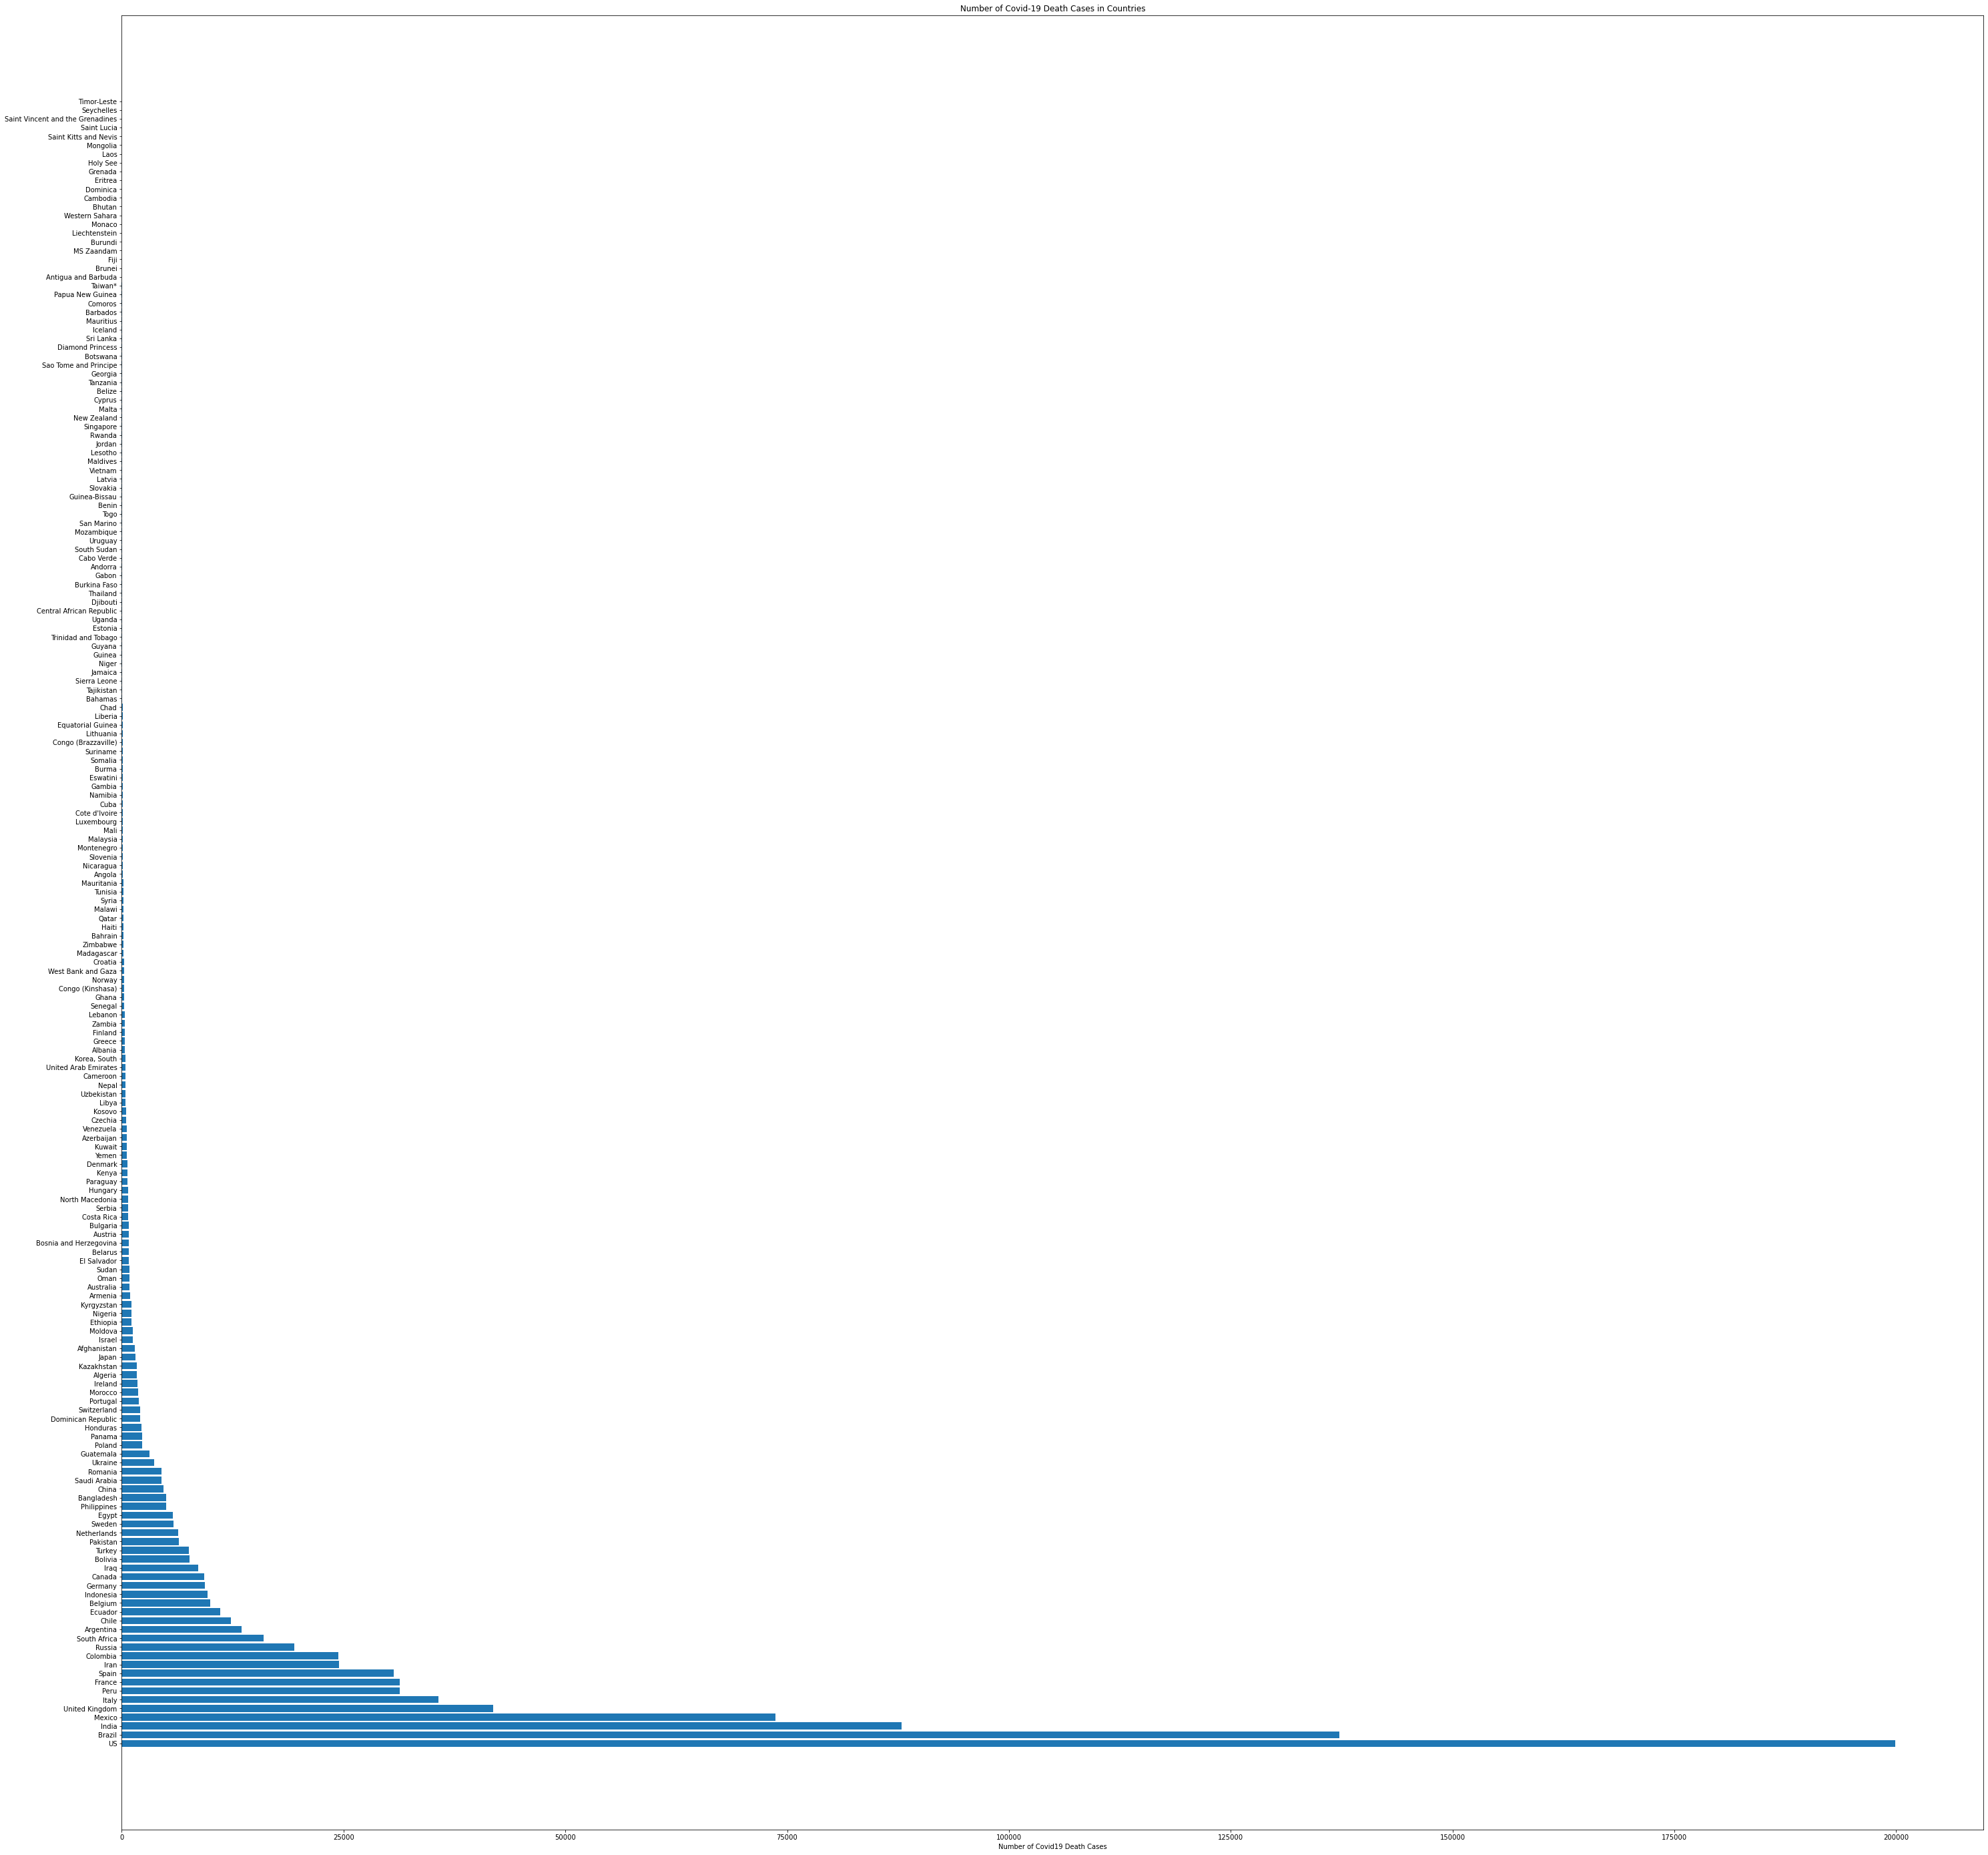

In [43]:
# Plot a bar graph to see the total death cases across different countries

plt.figure(figsize=(50, 50))
plt.barh(d_unique_countries, country_death_cases)
plt.title('Number of Covid-19 Death Cases in Countries')
plt.xlabel('Number of Covid19 Death Cases')
plt.show()

In [52]:
# calculation of the total number of recovery cases by each country

r_unique_countries =  list(recovery_cases['Country/Region'].unique())

country_recovery_cases = []
no_recovery_cases = []
for i in r_unique_countries:
    r_cases = latest_recoveries[recovery_cases['Country/Region']==i].sum()
    if cases > 0:
        country_recovery_cases.append(r_cases)
    else:
        no_recovery_cases.append(i)
        
for i in no_recovery_cases:
    r_unique_countries.remove(i)
    
r_unique_countries = [k for k, v in sorted(zip(r_unique_countries, country_recovery_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(r_unique_countries)):
    country_death_cases[i] = latest_recoveries[recovery_cases['Country/Region']==d_unique_countries[i]].sum()

In [53]:
# number of recovery cases per country/region

print('Recovery Cases by Countries/Regions:')
for i in range(len(r_unique_countries)):
    print(f'{r_unique_countries[i]}: {country_recovery_cases[i]} cases')

Recovery Cases by Countries/Regions:
India: 32576 cases
Brazil: 6995 cases
US: 35180 cases
Russia: 1199 cases
Colombia: 1449 cases
Peru: 92 cases
Mexico: 508563 cases
South Africa: 42637 cases
Argentina: 24155 cases
Chile: 29516 cases
Iran: 36836 cases
Saudi Arabia: 1771 cases
Pakistan: 58626 cases
Turkey: 258717 cases
Bangladesh: 173 cases
Iraq: 73301 cases
Germany: 18977 cases
Philippines: 967 cases
Italy: 1954 cases
Indonesia: 194 cases
Spain: 90240 cases
Israel: 18109 cases
Canada: 624 cases
Qatar: 3993432 cases
Ecuador: 142 cases
Kazakhstan: 13727 cases
France: 1189 cases
Kuwait: 1445 cases
Romania: 462 cases
Egypt: 4674 cases
Bolivia: 274 cases
Oman: 19124 cases
China: 127684 cases
Morocco: 1830 cases
Panama: 967 cases
Dominican Republic: 421111 cases
Ukraine: 85257 cases
Guatemala: 640900 cases
United Arab Emirates: 450 cases
Belarus: 3887 cases
Japan: 9952 cases
Poland: 25127 cases
Bahrain: 18630 cases
Singapore: 12737 cases
Venezuela: 4462 cases
Nigeria: 1369 cases
Uzbekistan:

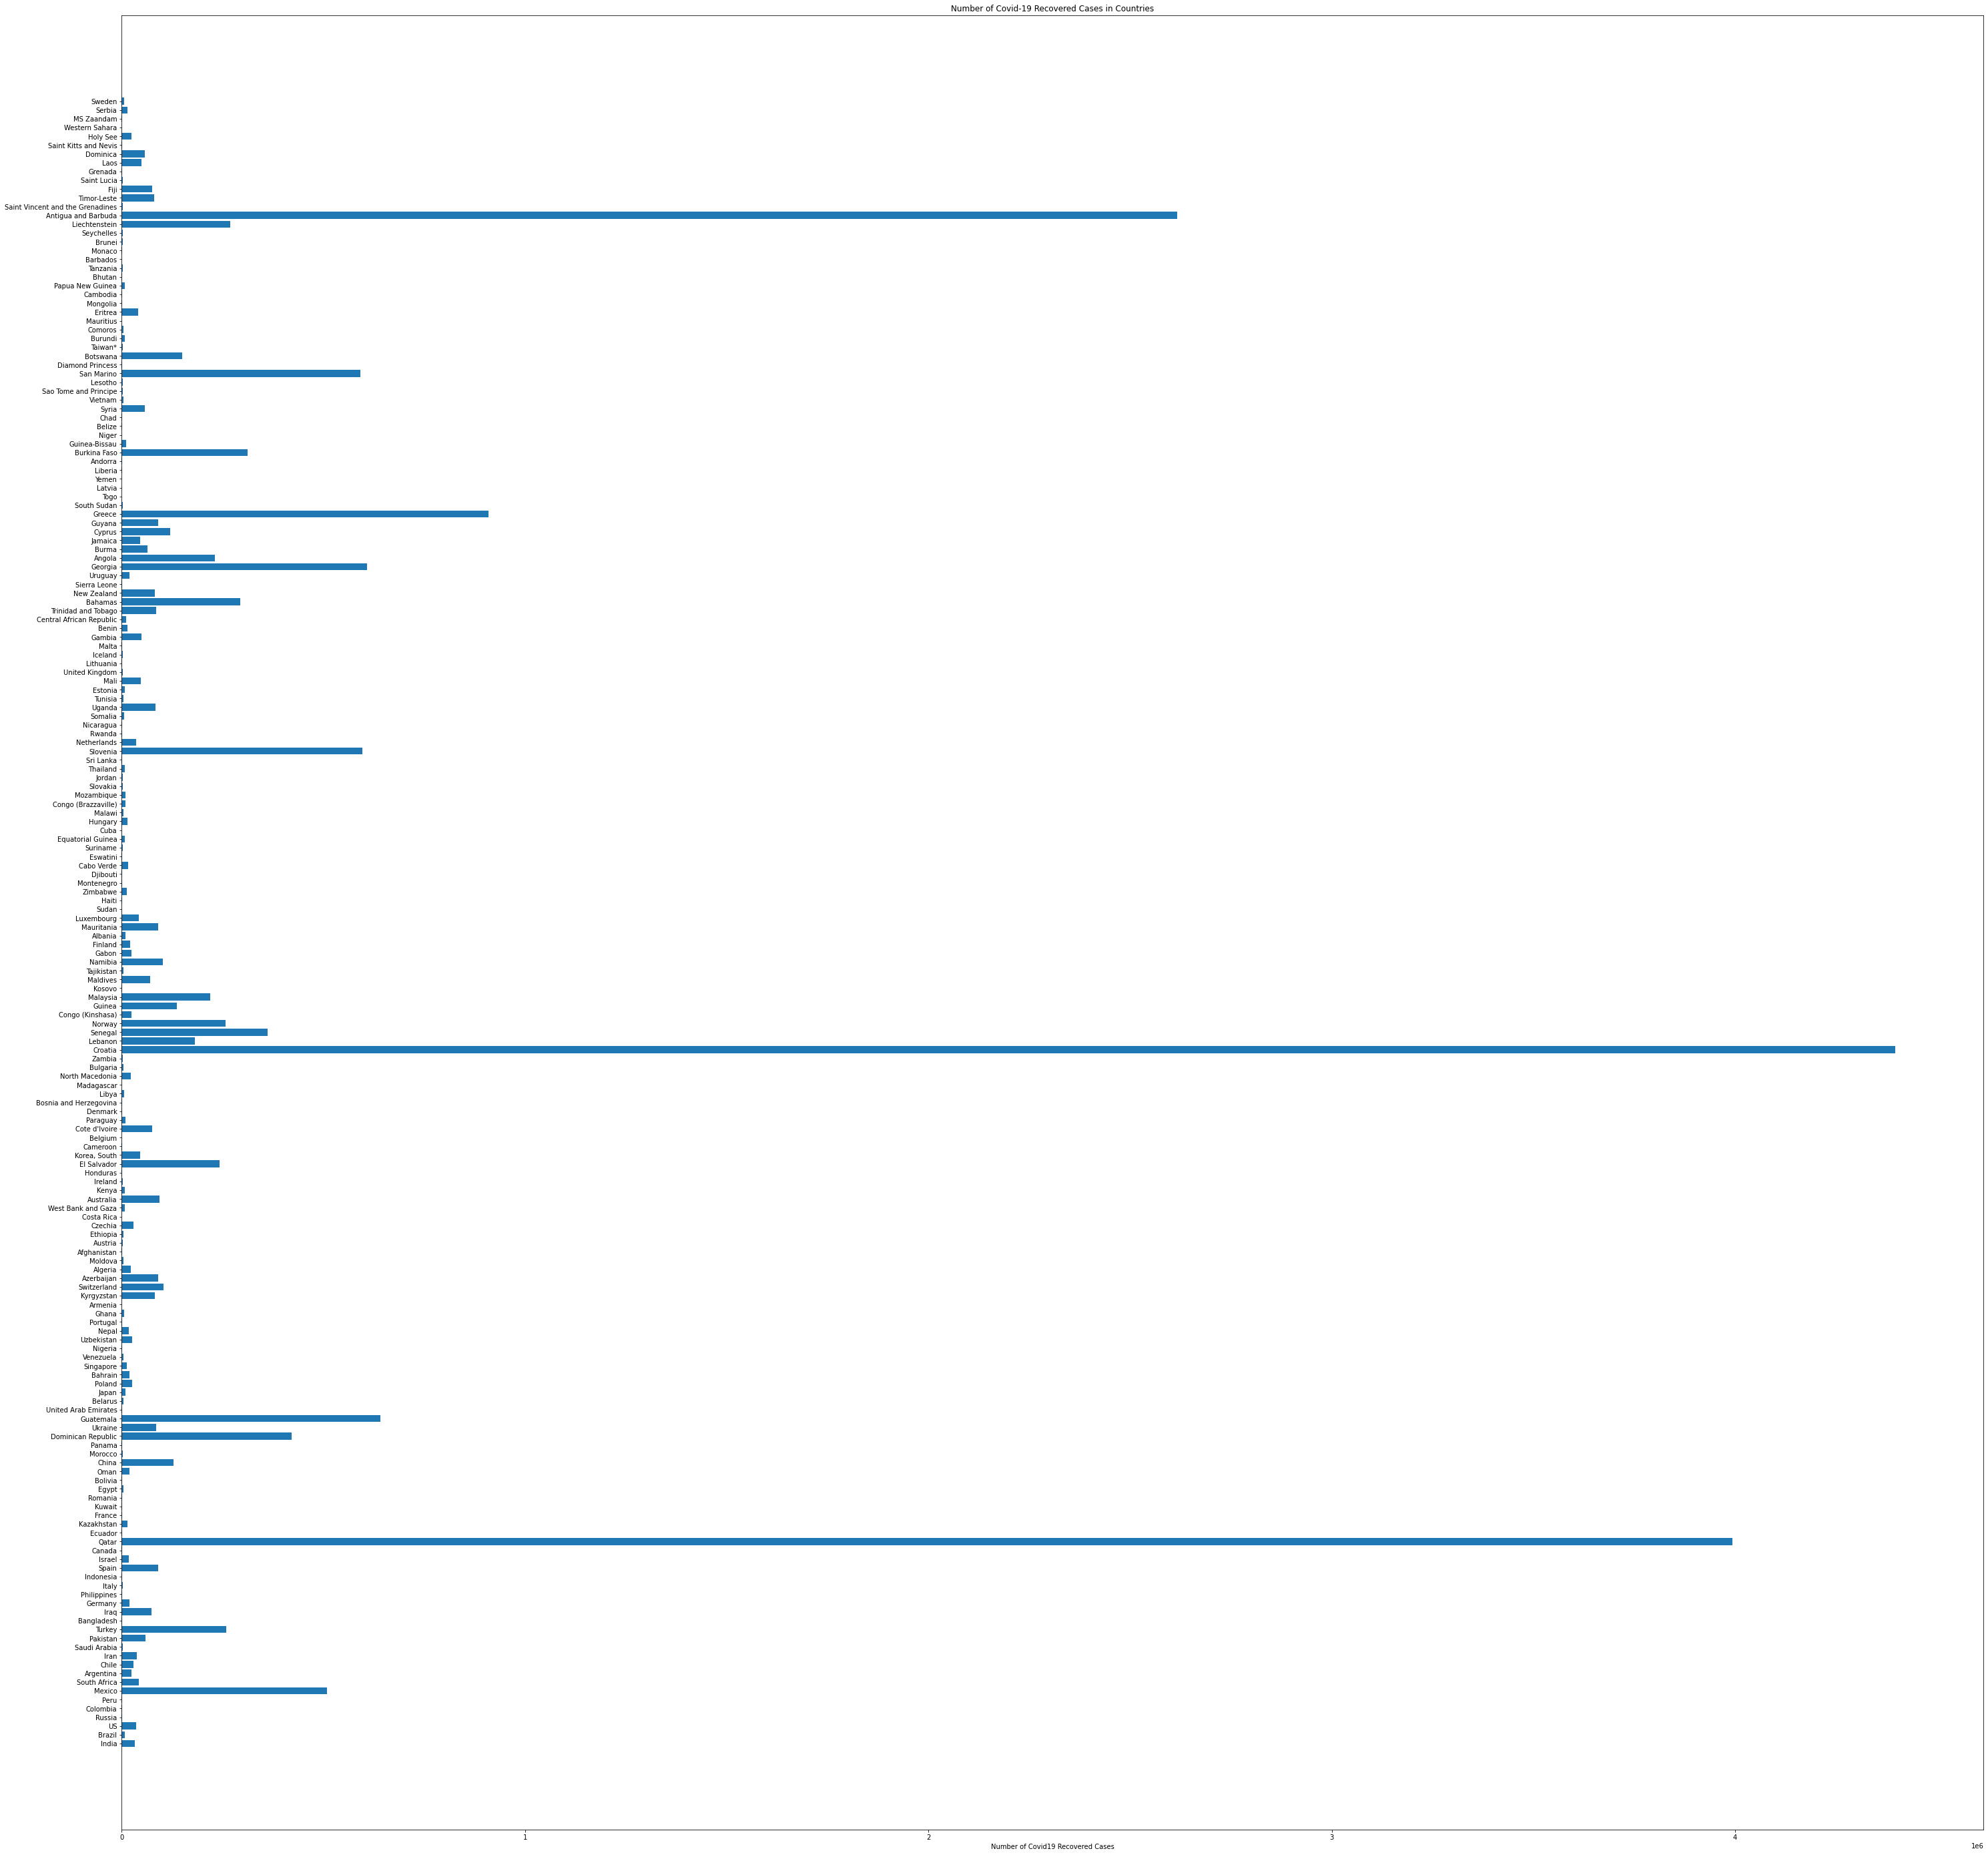

In [45]:
# Plot a bar graph to see the total recovery cases across different countries

plt.figure(figsize=(50, 50))
plt.barh(r_unique_countries, country_recovery_cases)
plt.title('Number of Covid-19 Recovered Cases in Countries')
plt.xlabel('Number of Covid19 Recovered Cases')
plt.show()

#### China vs. Wolrd Confirmed Cases

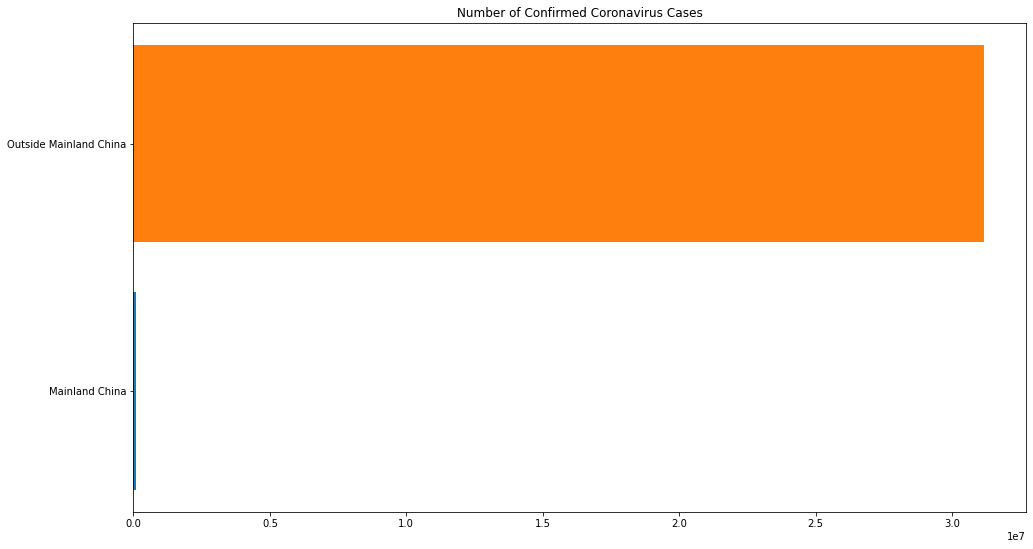

In [46]:
# Plot a bar graph to see the total confirmed cases between mainland china where the virus originated 
# and outside mainland china 

china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()

In [47]:
# Print the total cases in mainland china and outside of it

print('Outside Mainland China {} cases:'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland China 31155416 cases:
Mainland China: 90381 cases
Total: 31245797 cases


In [48]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [49]:
# Only show 10 countries with the most death cases, the rest are grouped into the category named others

visual_unique_countries = [] 
visual_death_cases = []
others = np.sum(country_death_cases[10:])
for i in range(len(country_death_cases[:10])):
    visual_unique_countries.append(d_unique_countries[i])
    visual_death_cases.append(country_death_cases[i])

visual_unique_countries.append('Others')
visual_death_cases.append(others)

In [50]:
# Only show 10 countries with the most recovery cases, the rest are grouped into the category named others

visual_unique_countries = [] 
visual_recovery_cases = []
others = np.sum(country_recovery_cases[10:])
for i in range(len(country_recovery_cases[:10])):
    visual_unique_countries.append(r_unique_countries[i])
    visual_recovery_cases.append(country_recovery_cases[i])

visual_unique_countries.append('Others')
visual_recovery_cases.append(others)

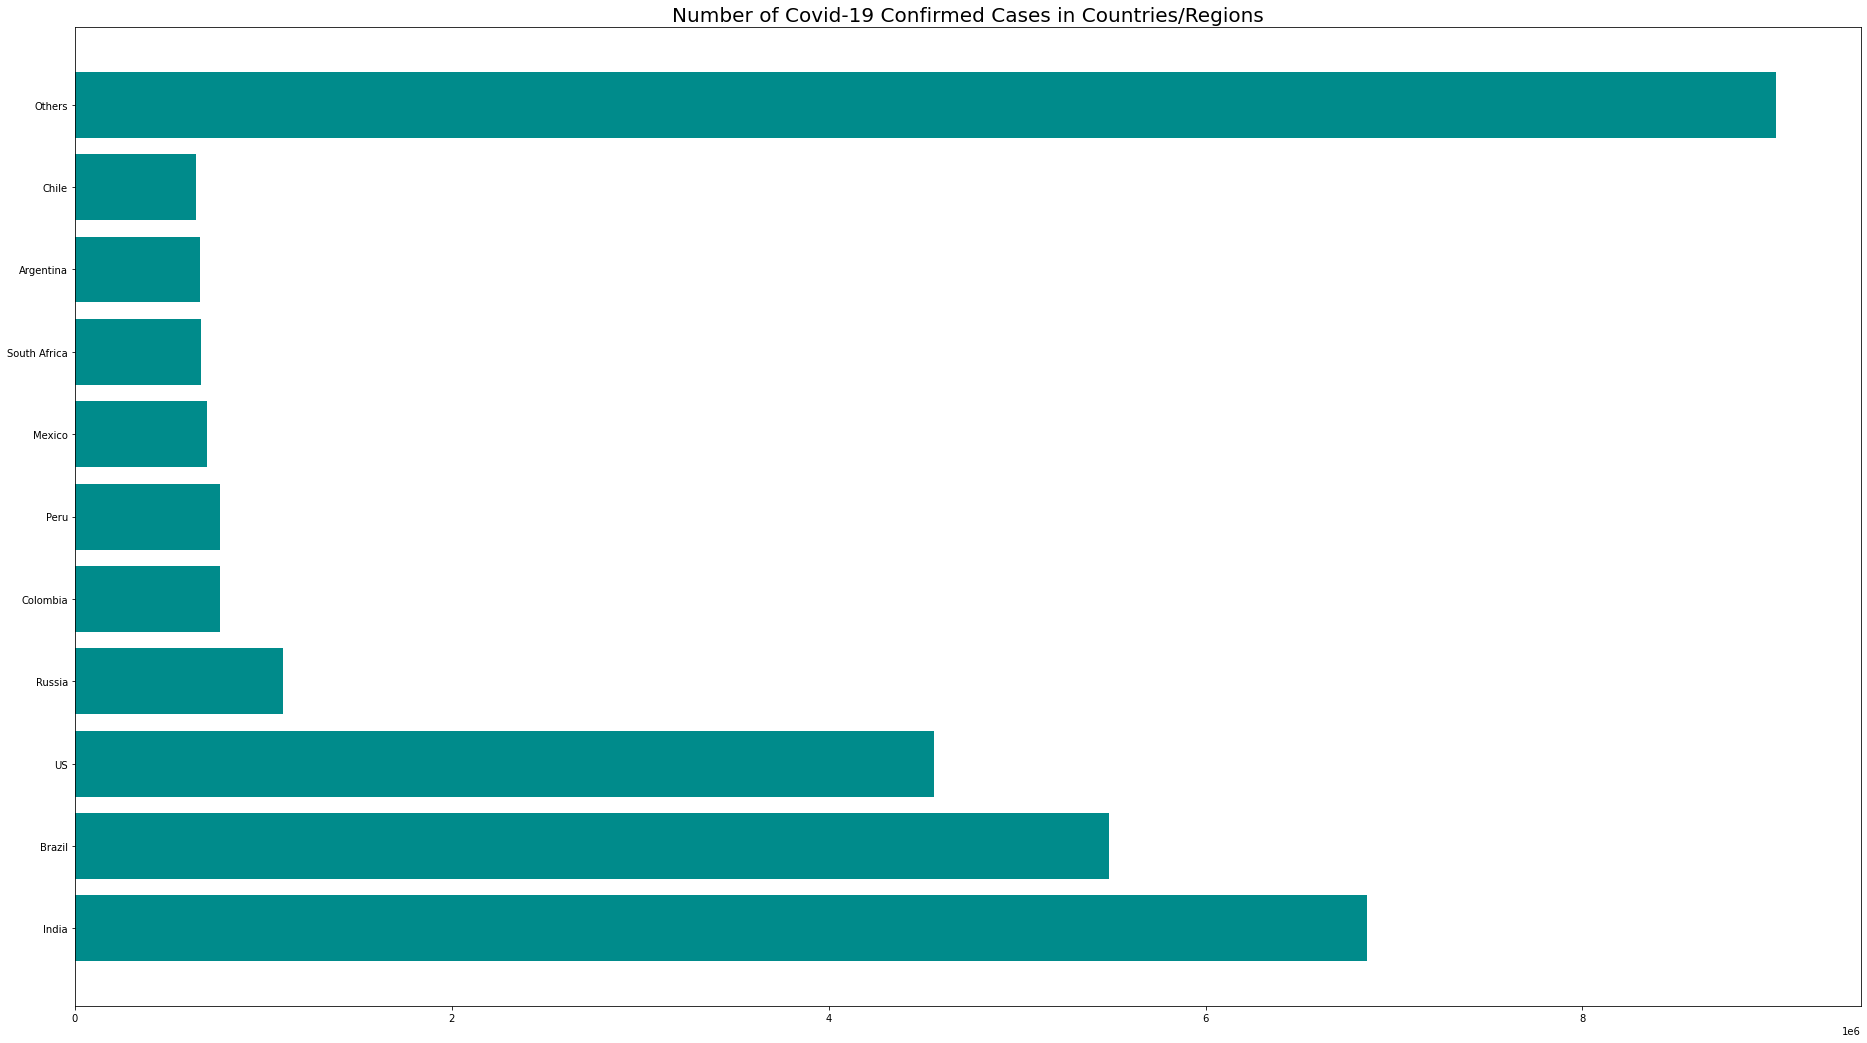

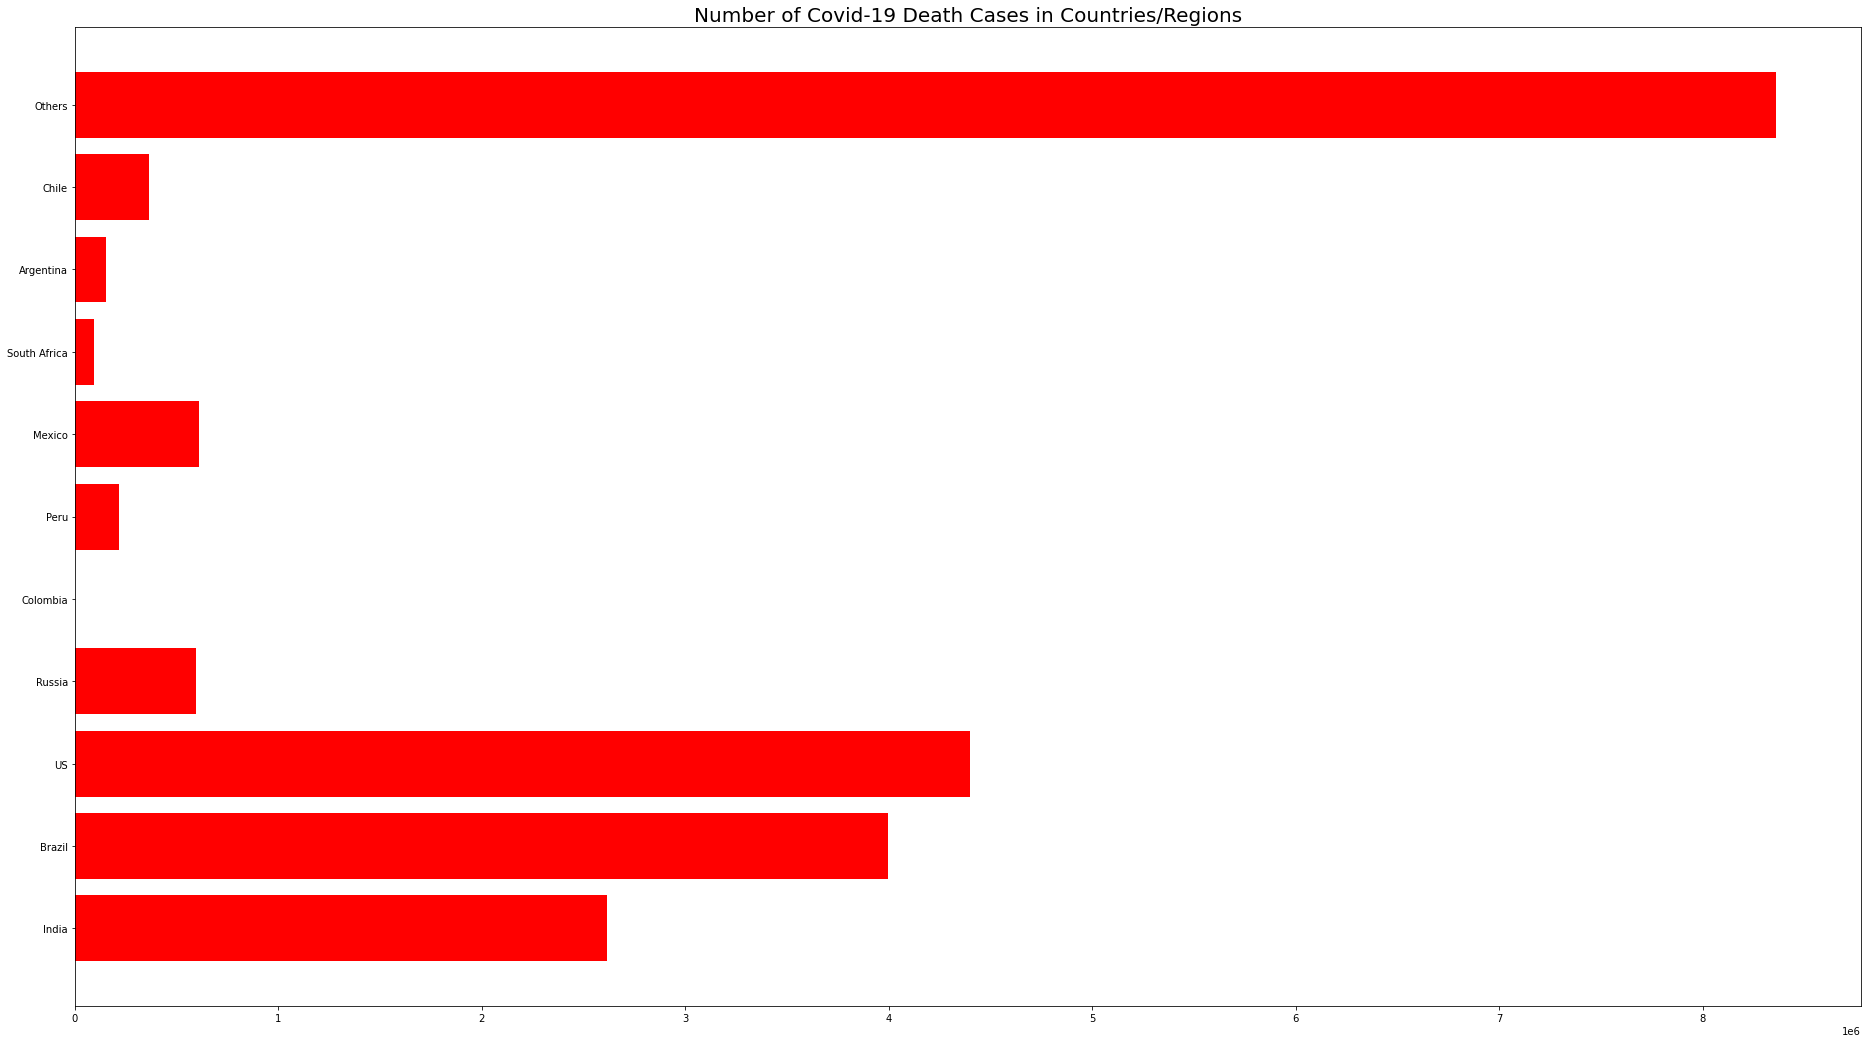

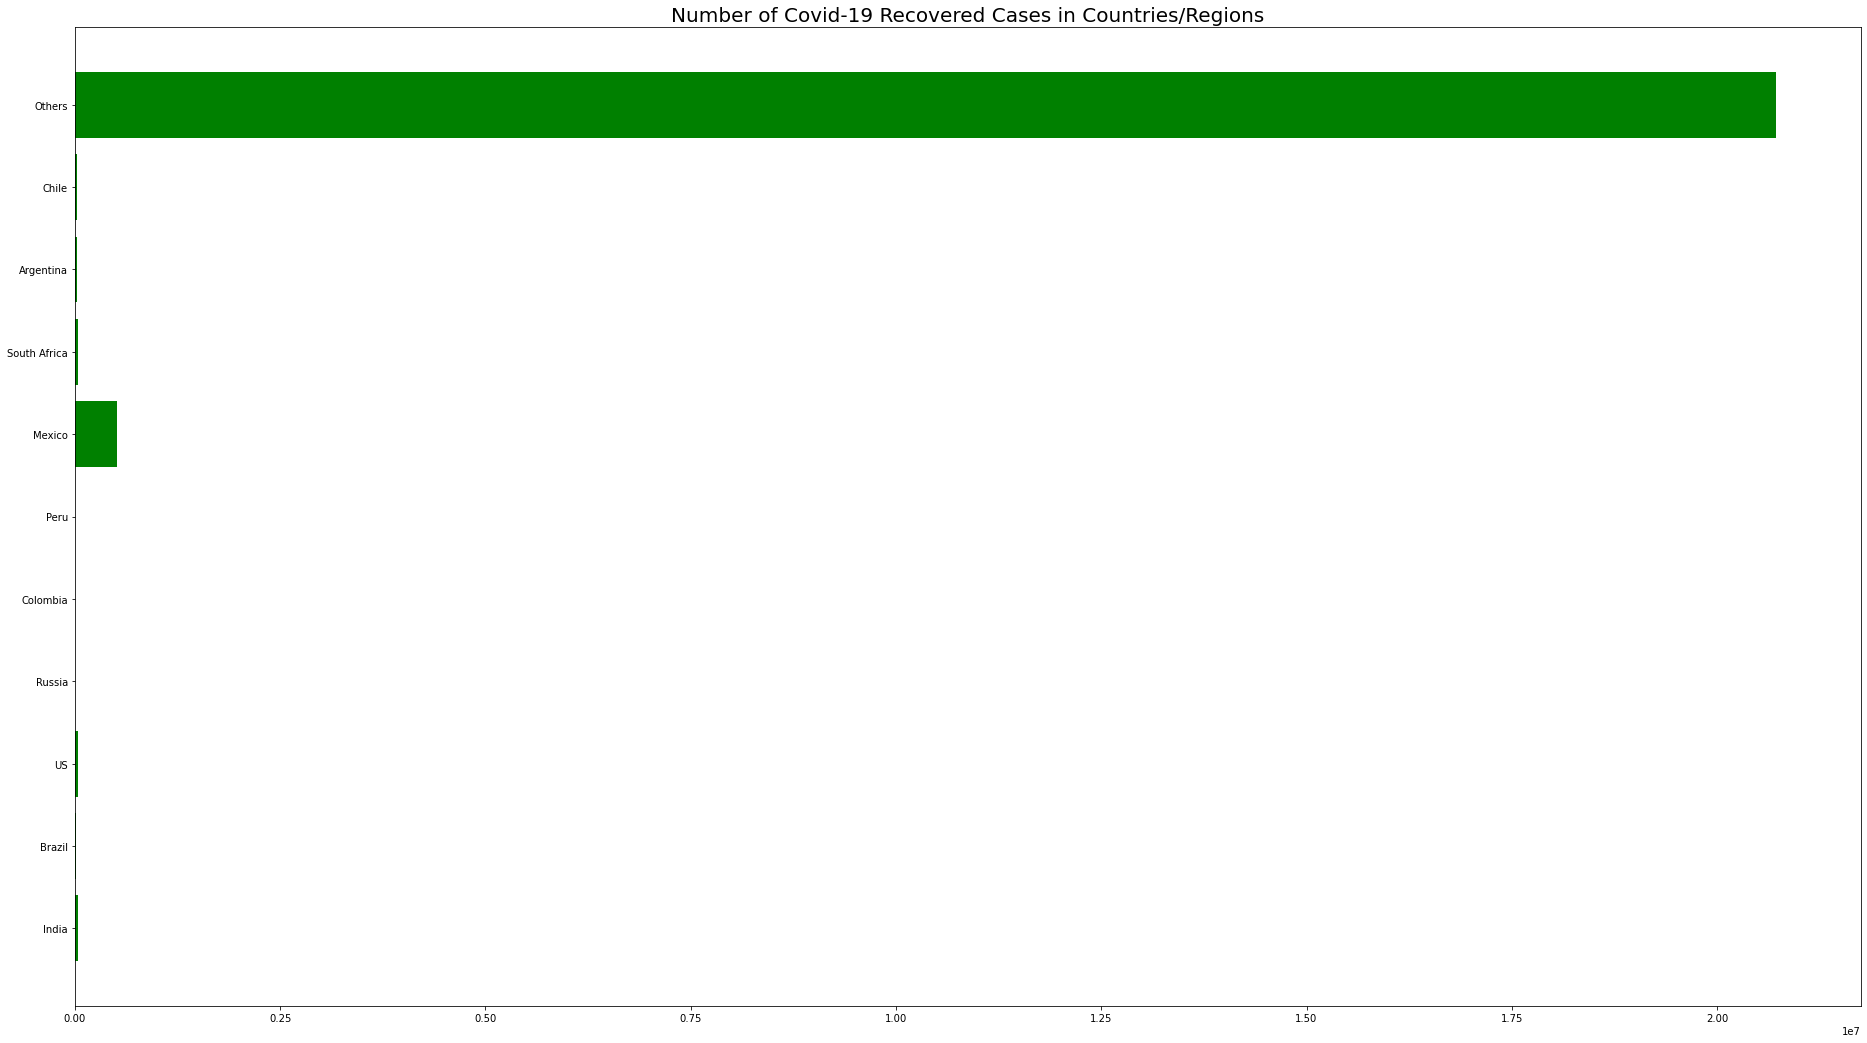

In [51]:
# Visualize the 10 countries

#confirmed cases
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases, color='darkcyan')
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

#death cases
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_death_cases, color='red')
plt.title('Number of Covid-19 Death Cases in Countries/Regions', size=20)
plt.show()

#recovered cases
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_recovery_cases, color='green')
plt.title('Number of Covid-19 Recovered Cases in Countries/Regions', size=20)
plt.show()

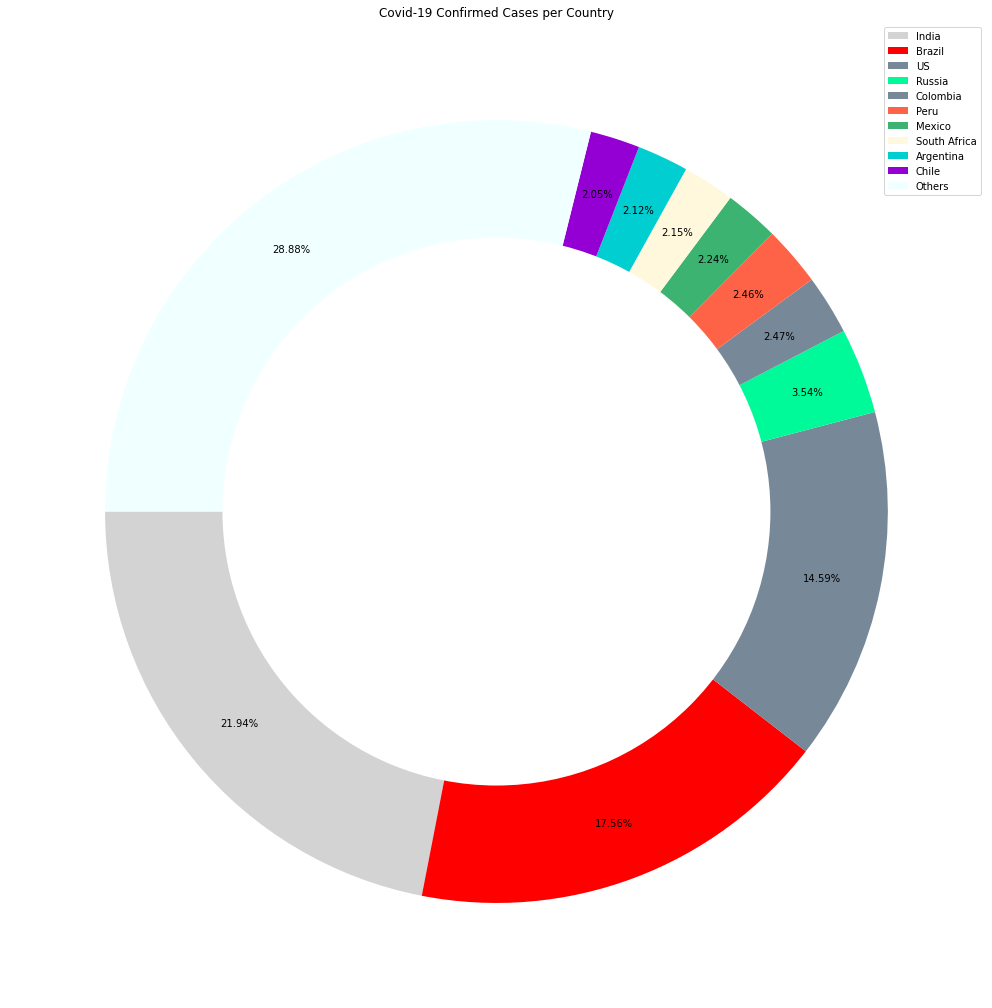

In [52]:
# doughnut chart for bett the view of percentage of total confirmed cases in 10 different countries

#confirmed cases
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(18,18))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, autopct="%.2f%%", colors = c, pctdistance = 0.85, startangle = 180)
plt.legend(visual_unique_countries, loc='best')

centre_circle = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


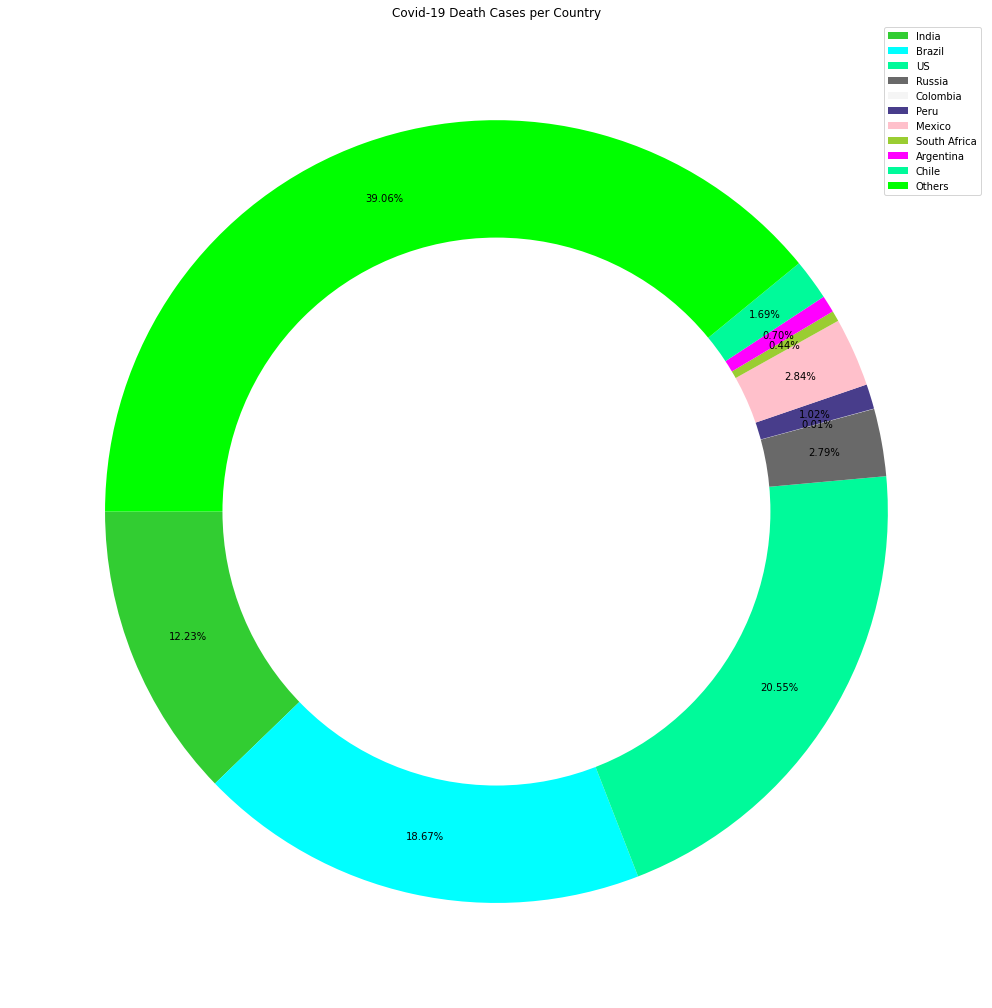

In [53]:
#death cases
d = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(d_unique_countries))
plt.figure(figsize=(18,18))
plt.title('Covid-19 Death Cases per Country')
plt.pie(visual_death_cases, autopct="%.2f%%", colors = d, pctdistance = 0.85, startangle = 180)
plt.legend(visual_unique_countries, loc='best')

centre_circle = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


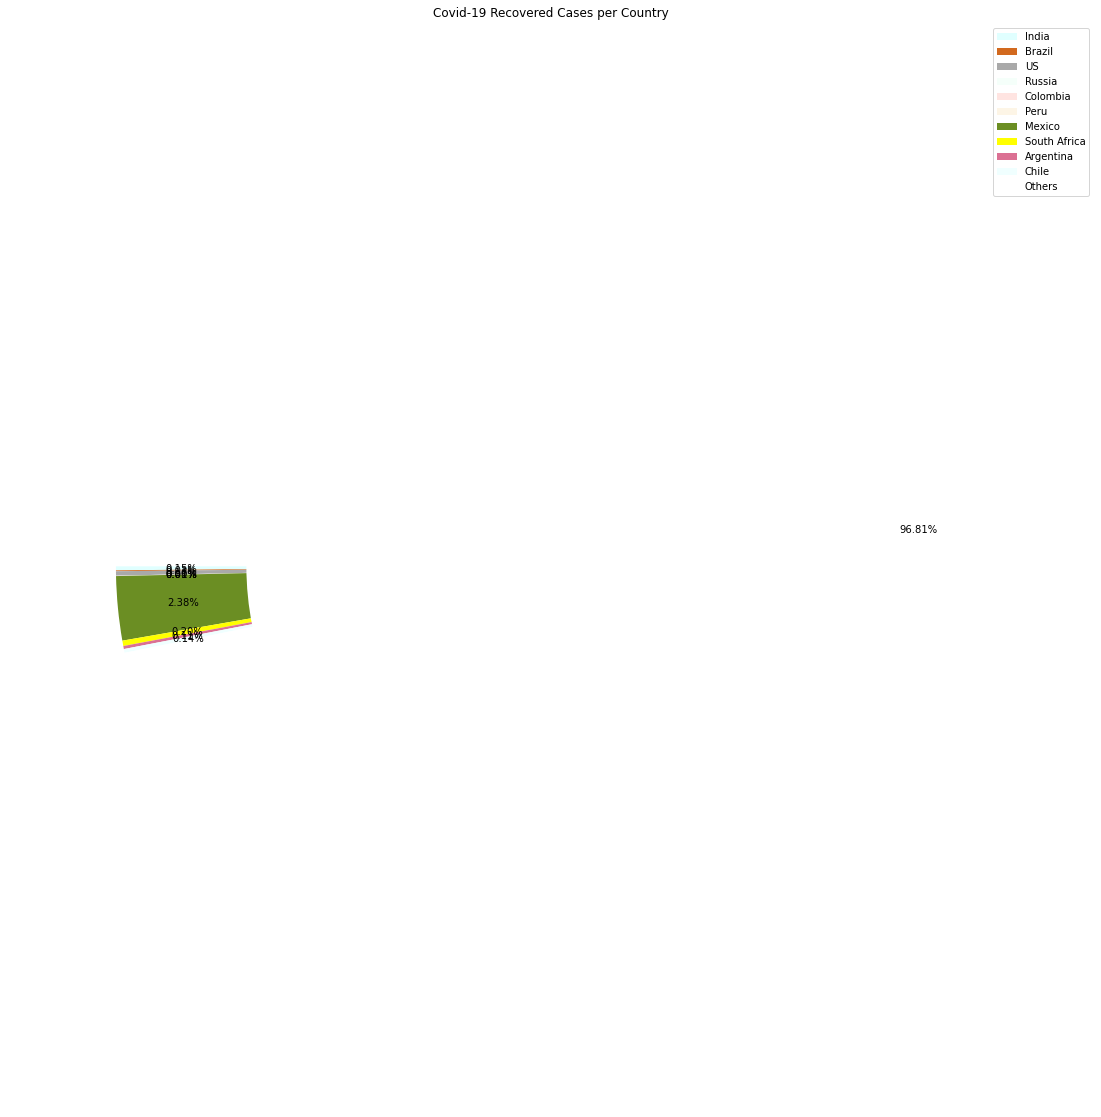

In [54]:
#recovered cases
r = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(r_unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Recovered Cases per Country')
plt.pie(visual_recovery_cases, autopct="%.2f%%", colors = r, pctdistance = 0.85, startangle = 180)
plt.legend(visual_unique_countries, loc='best')

centre_circle = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

### Country Specific Graph

In [55]:
def country_plot(x, y1, y2, y3, y4, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y4)
    plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_cases[confirmed_cases['Country/Region']==country_name][i].sum())
        country_deaths.append(death_cases[death_cases['Country/Region']==country_name][i].sum())
        country_recoveries.append(recovery_cases[recovery_cases['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths, country_recoveries)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    country_recoveries = country_info[2]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_daily_recovery, country_name)
    

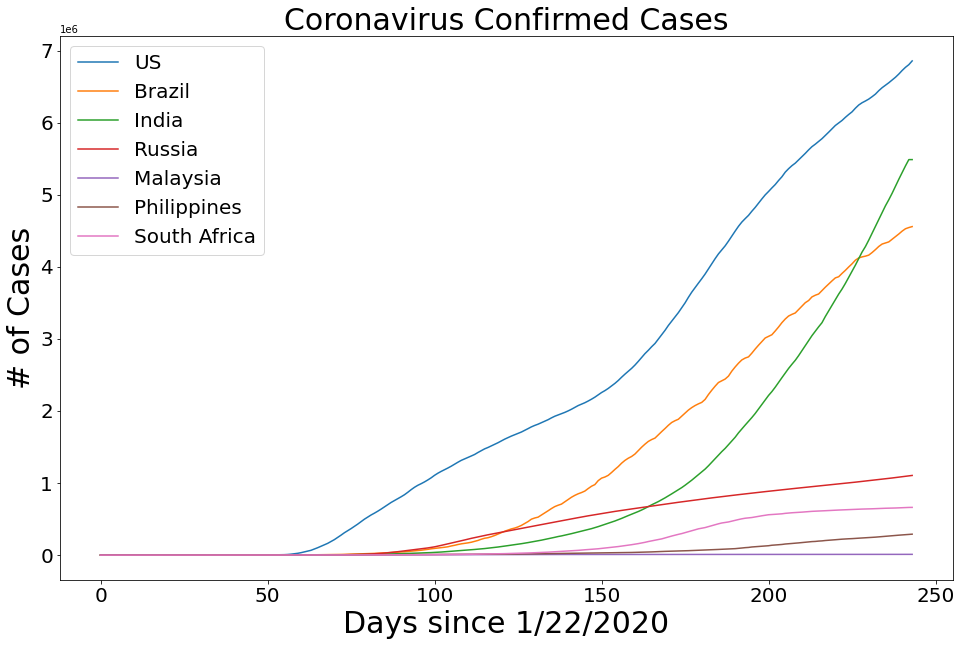

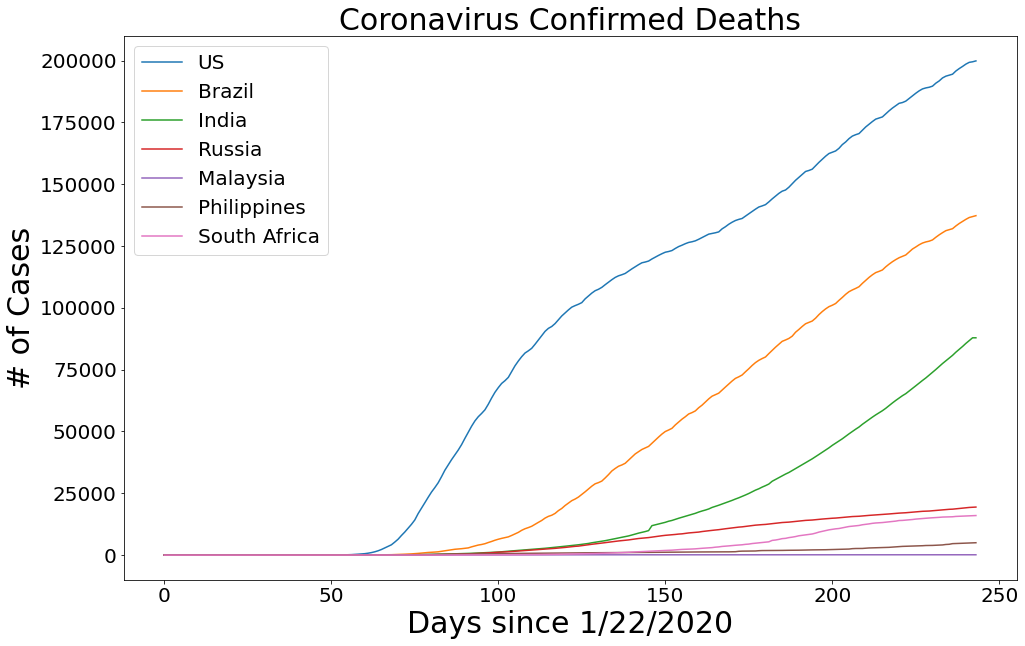

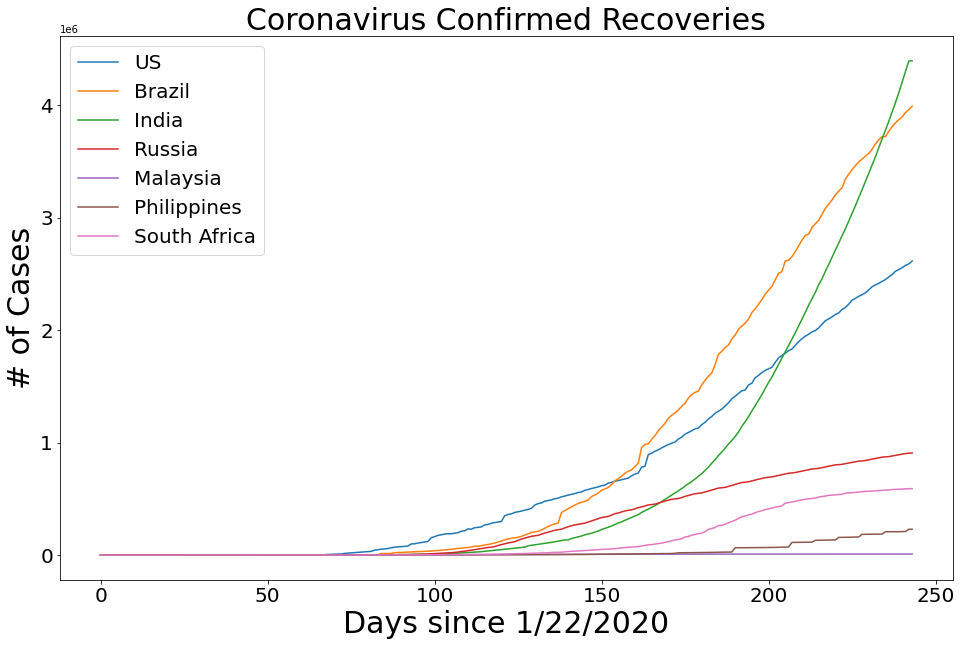

In [56]:
compare_countries = ['US', 'Brazil', 'India', 'Russia','Malaysia', 'Philippines', 'South Africa'] 
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths', 'Coronavirus Confirmed Recoveries']

for num in range(3):
    plt.figure(figsize=(16, 10))
    for country in compare_countries:
        plt.plot(get_country_info(country)[num])
    plt.legend(compare_countries, prop={'size': 20})
    plt.xlabel('Days since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.title(graph_name[num], size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

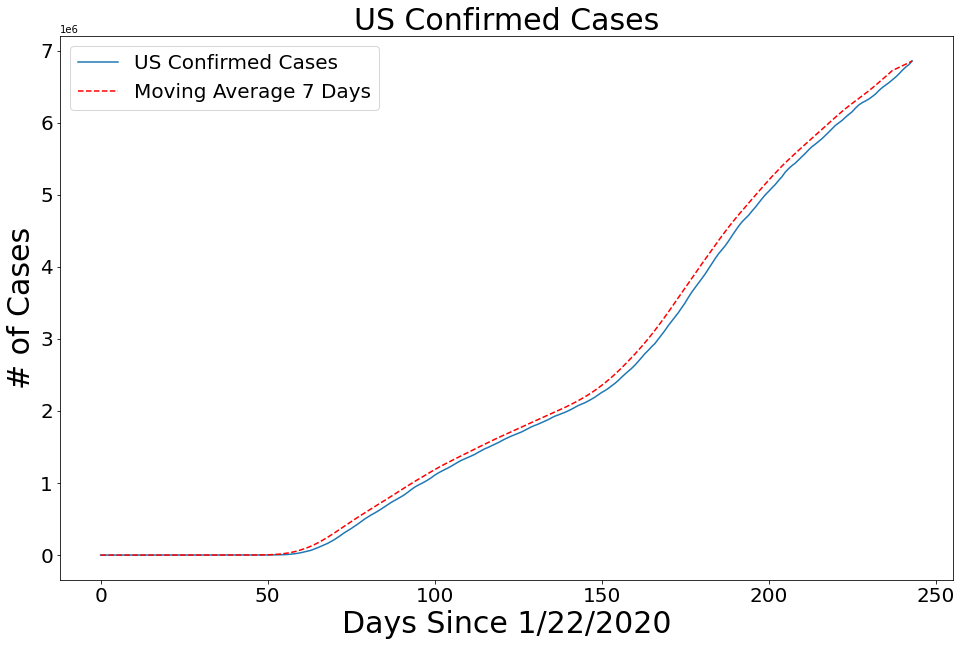

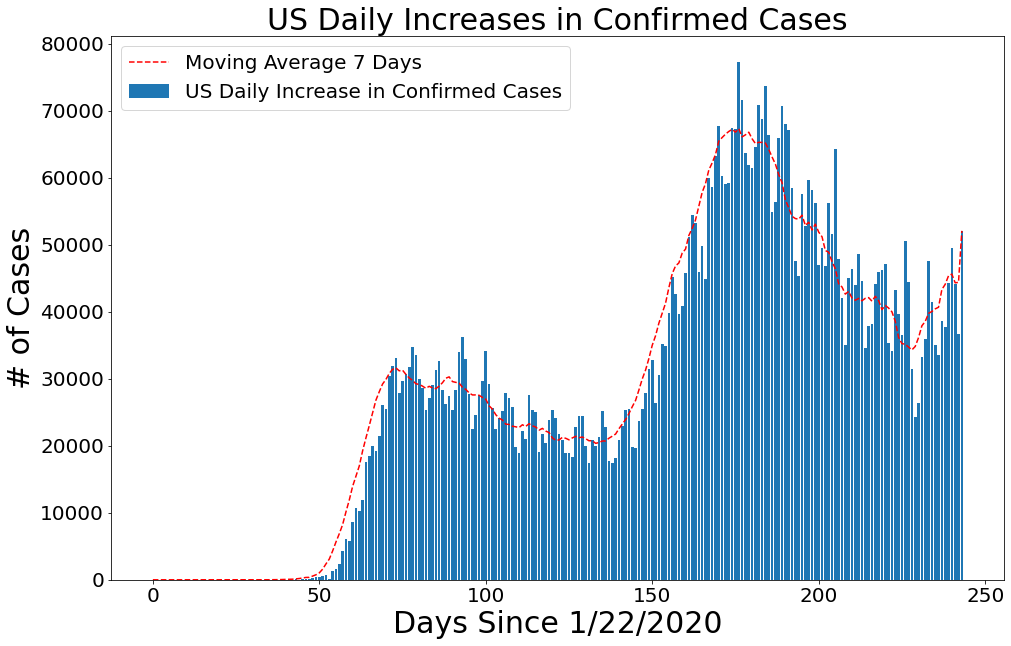

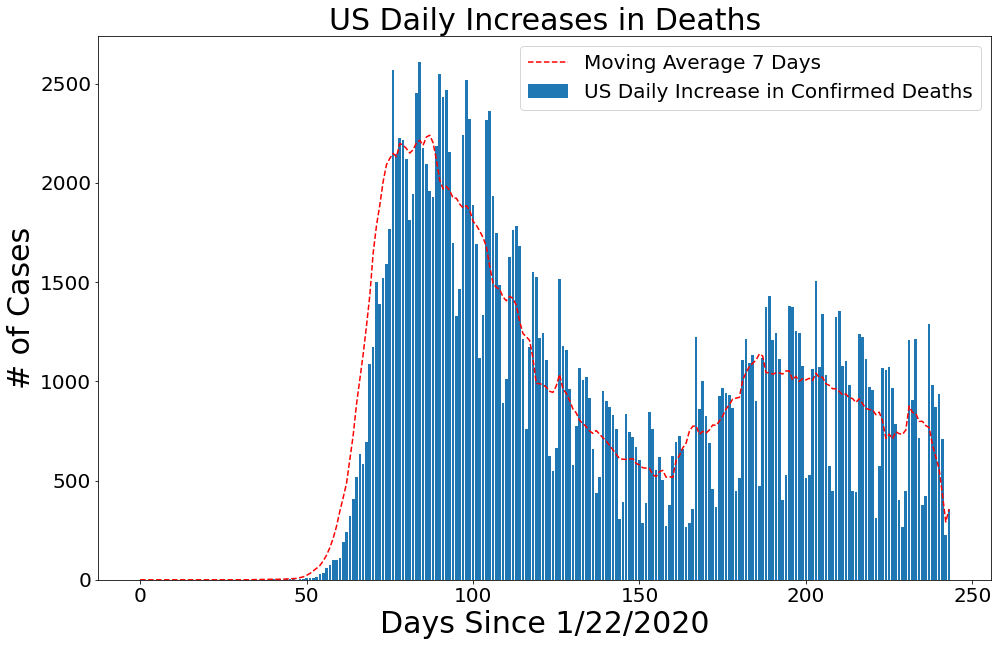

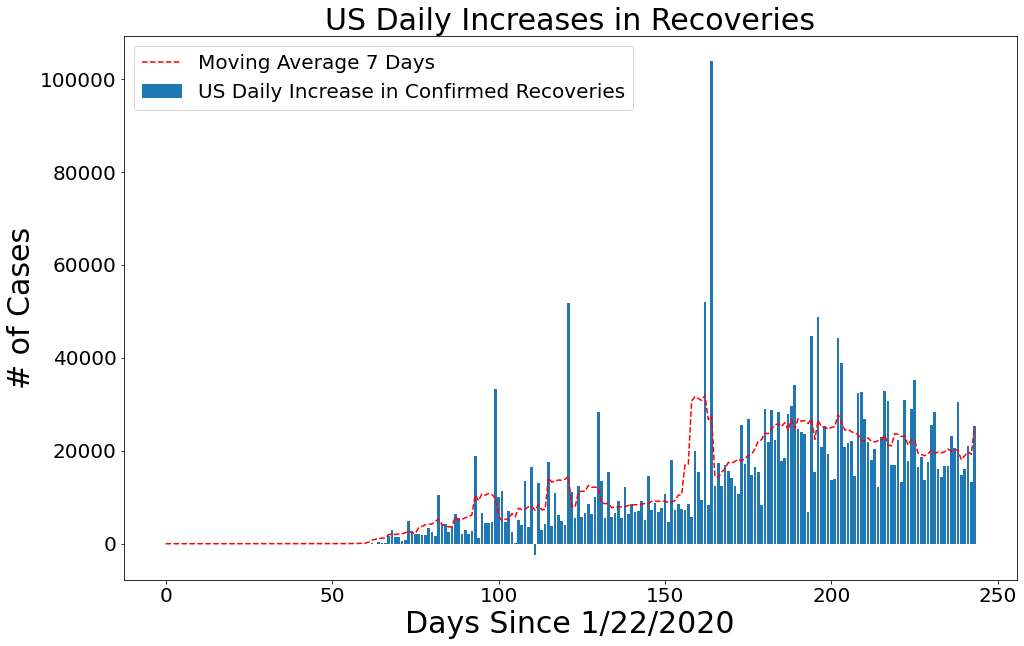

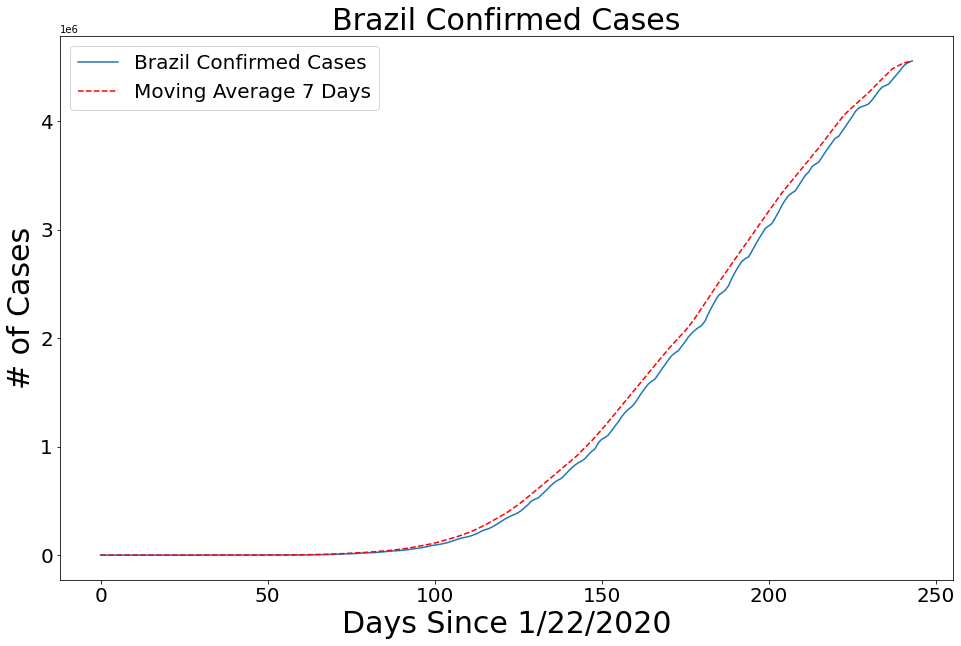

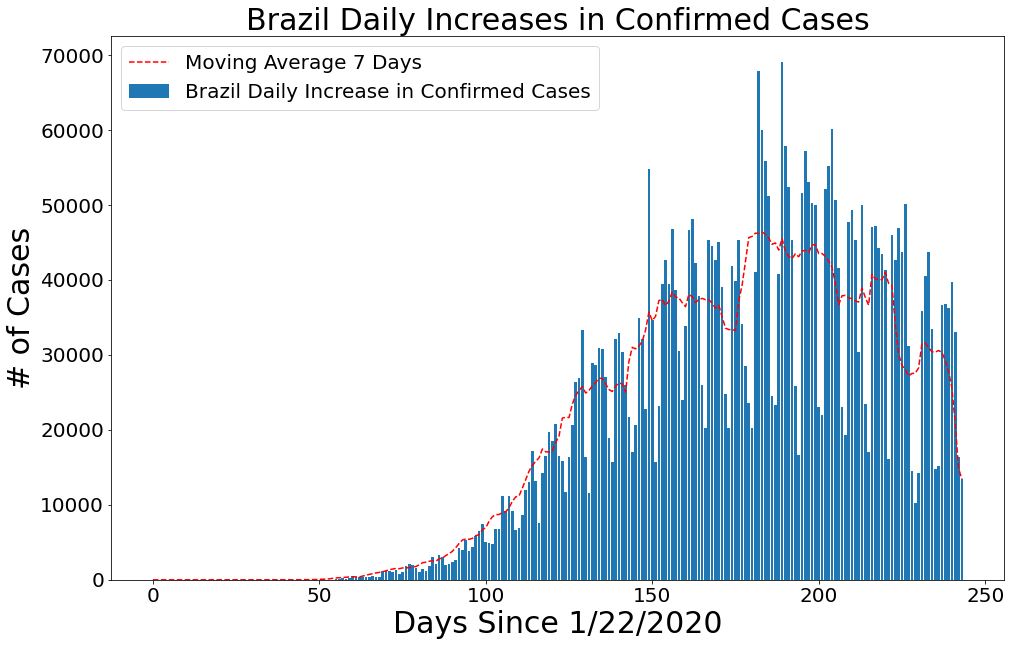

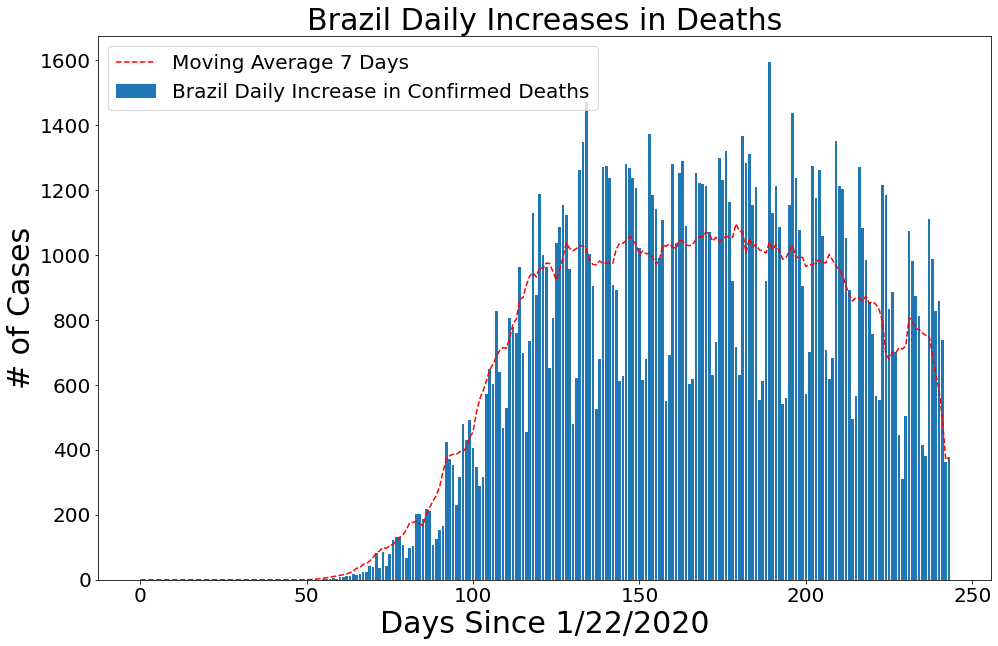

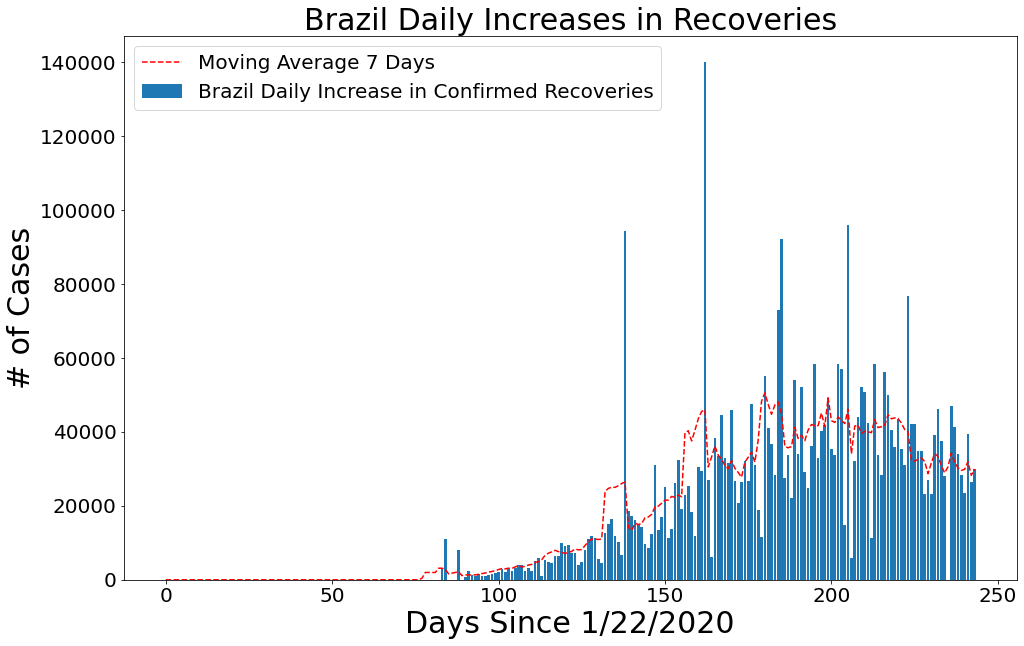

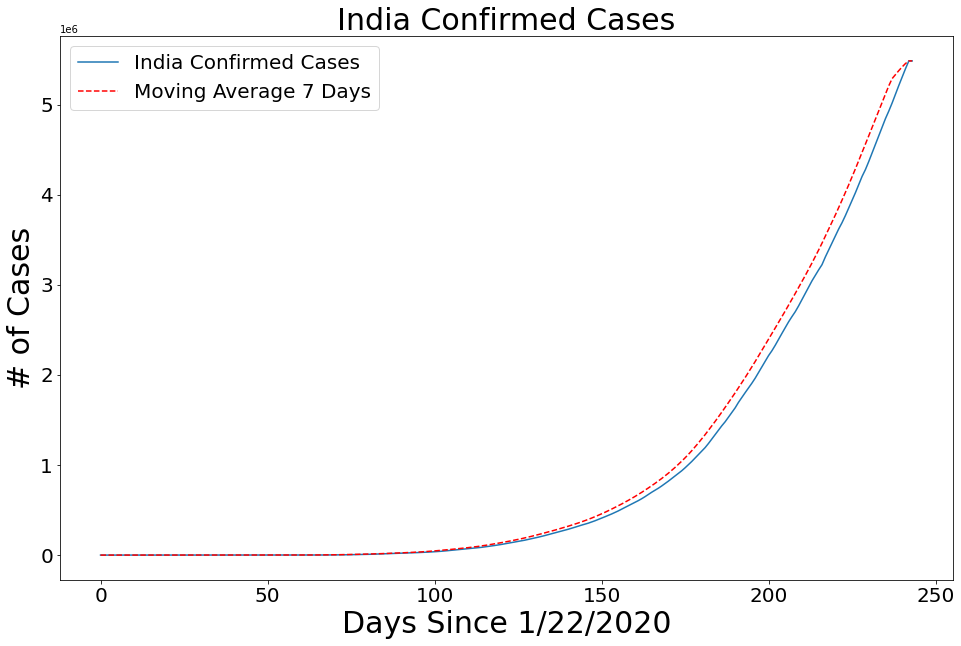

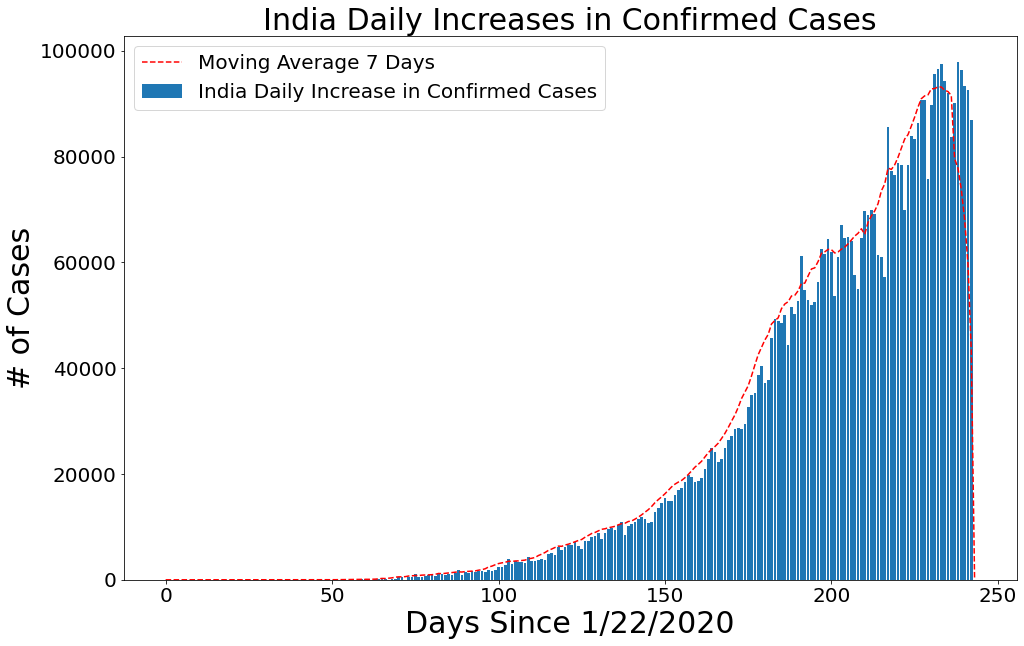

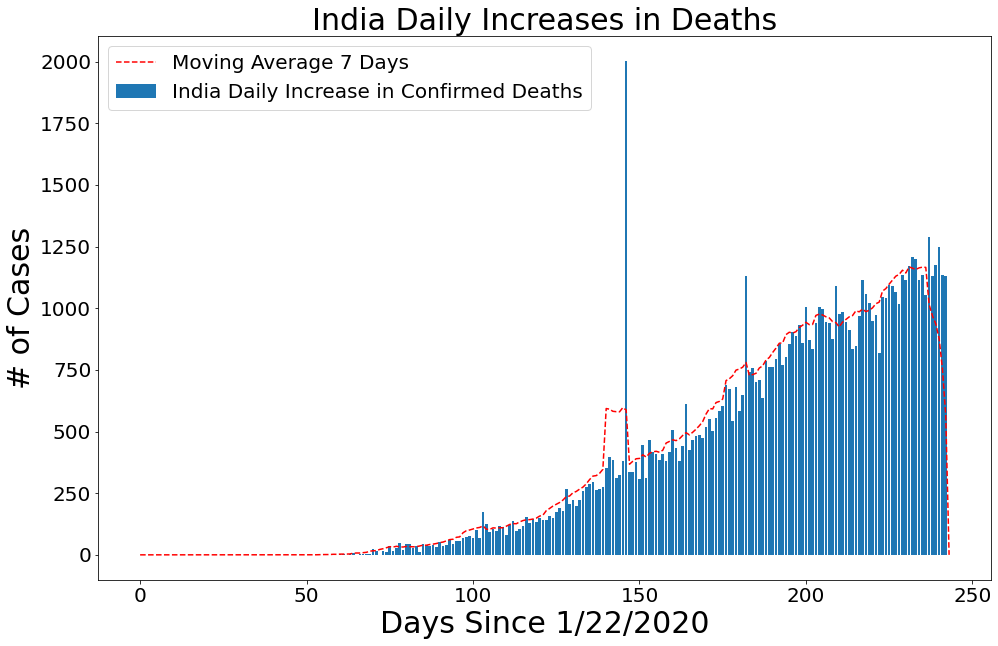

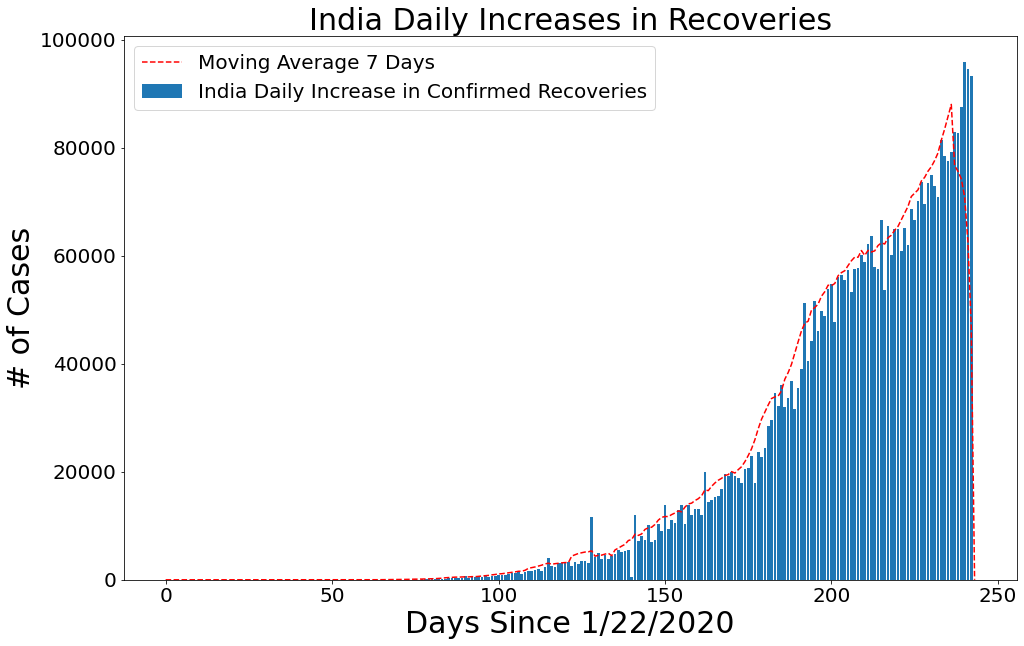

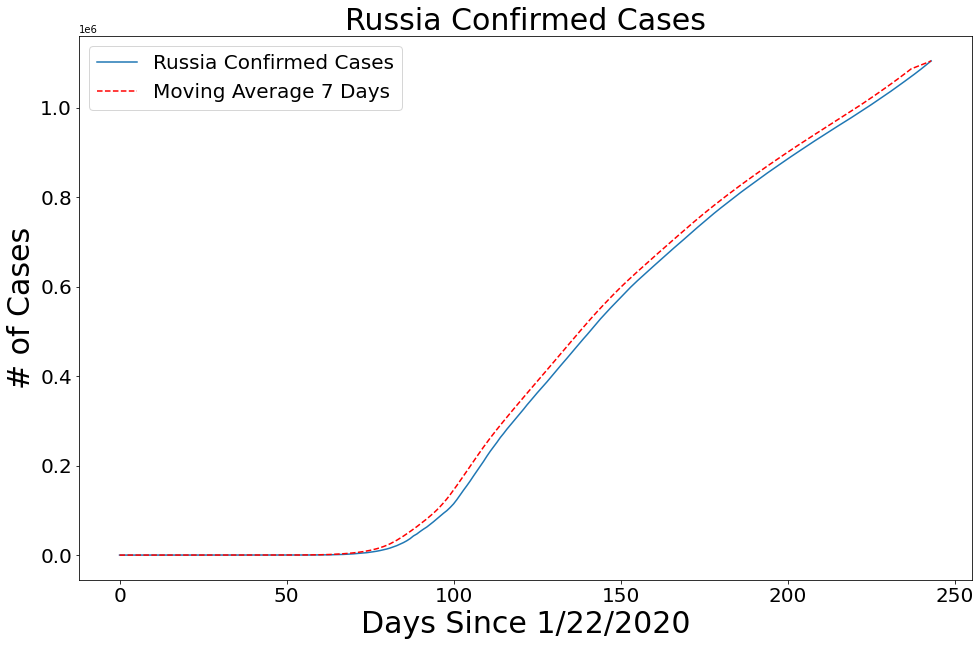

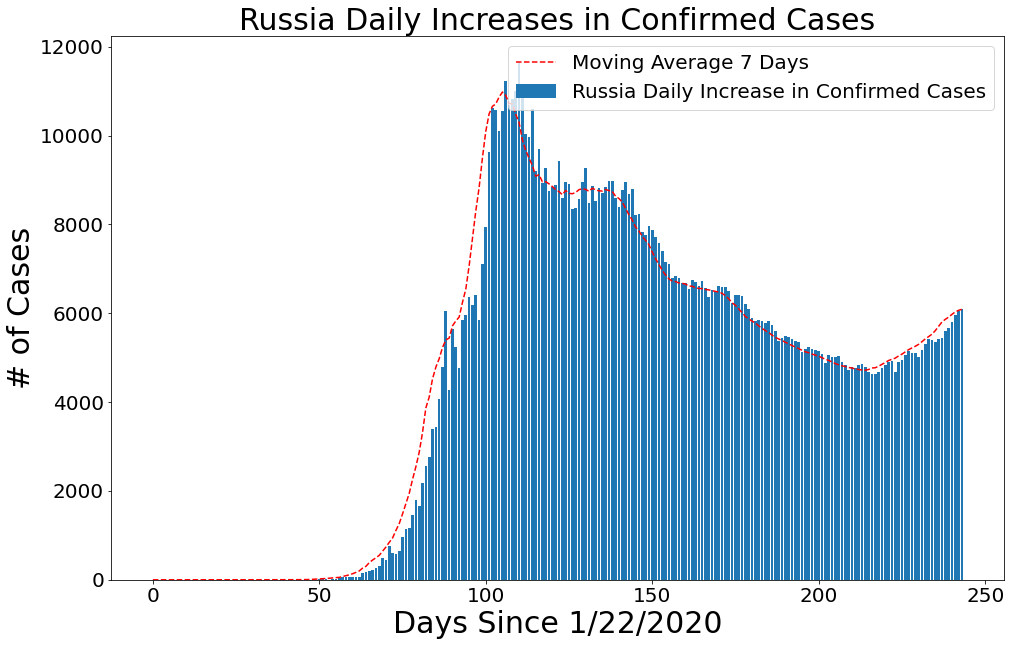

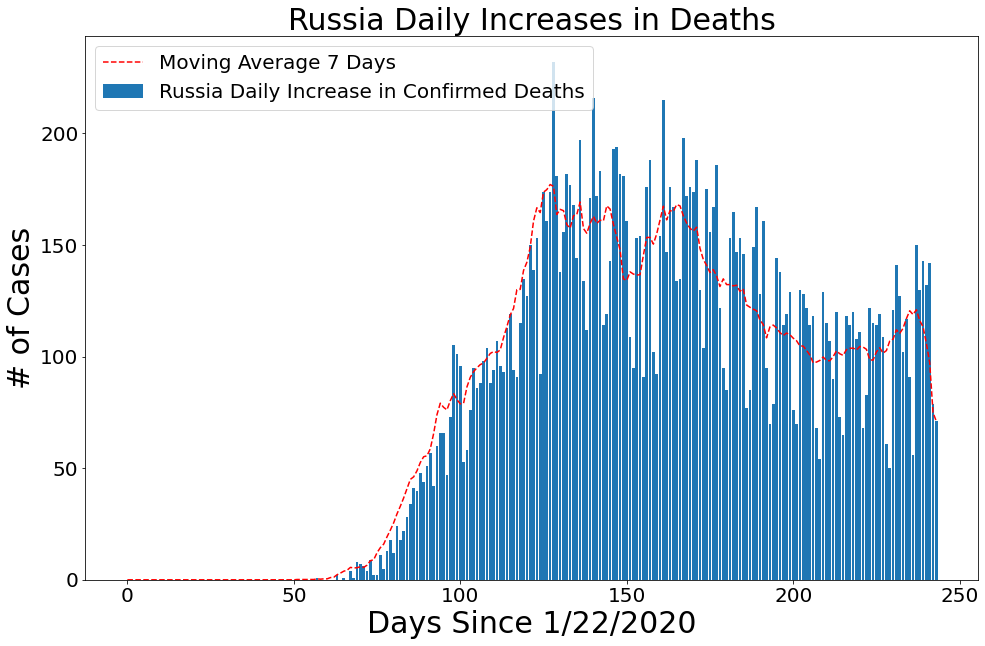

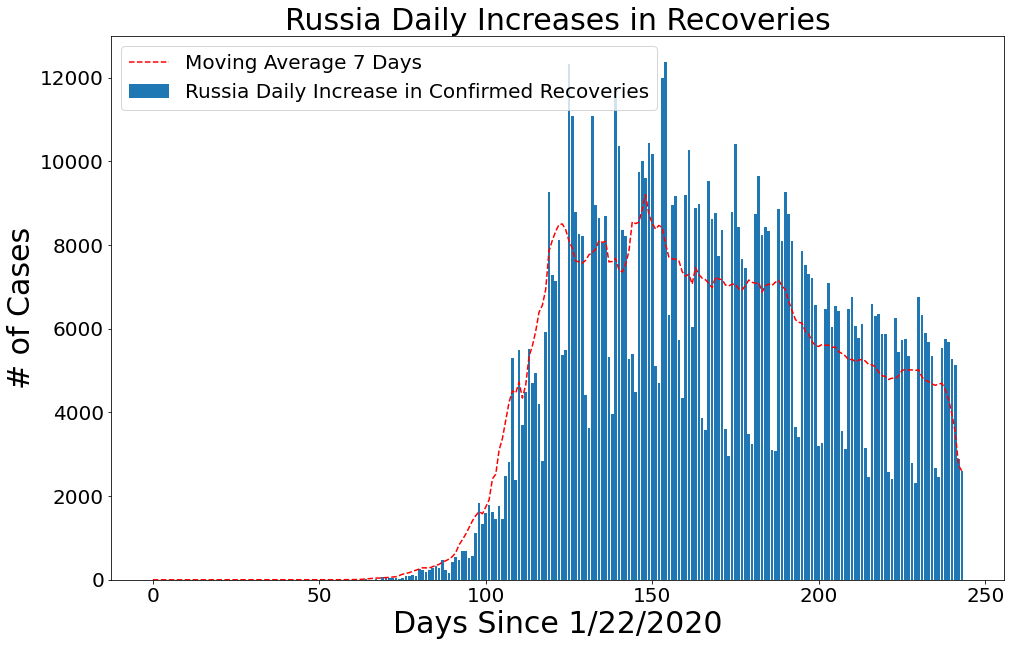

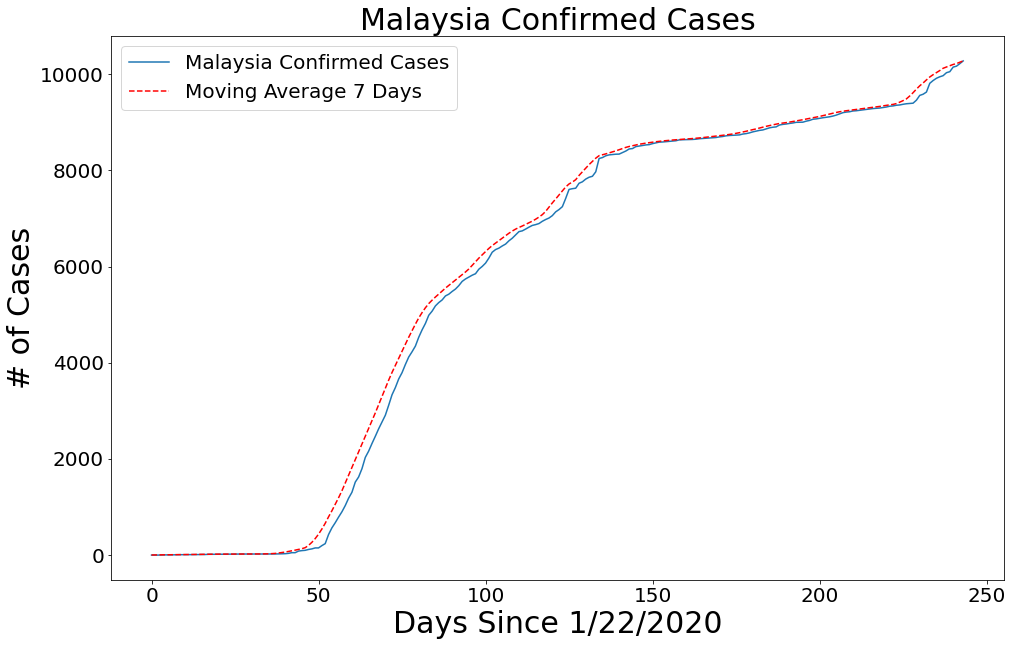

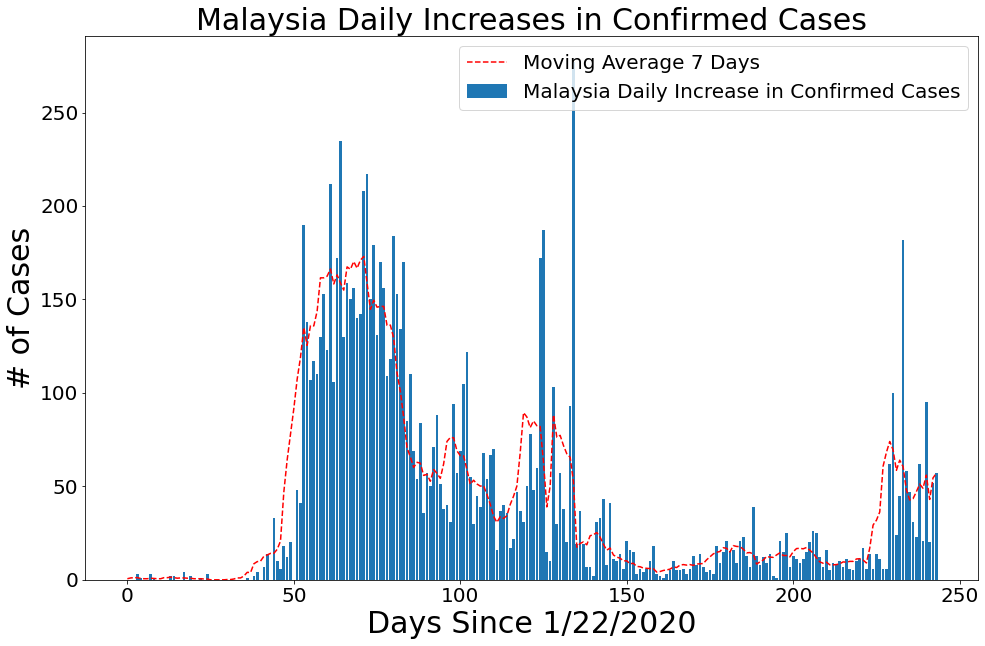

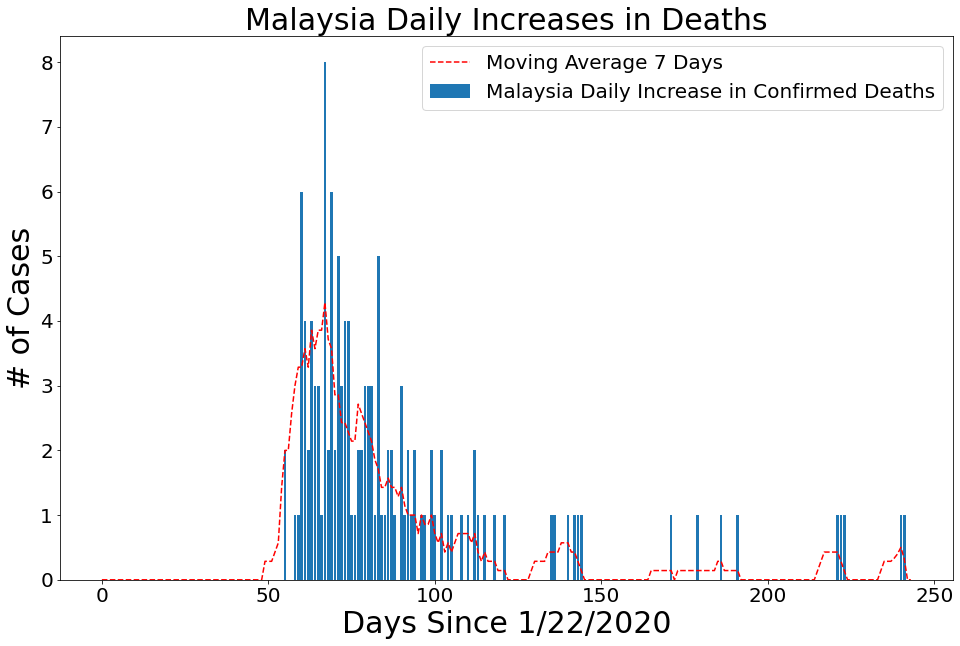

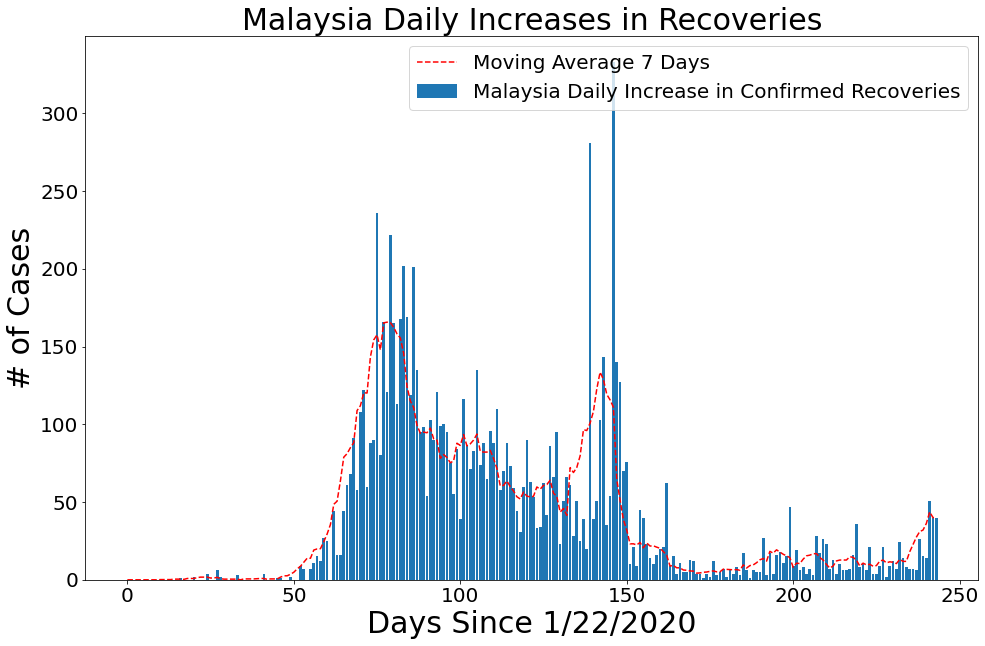

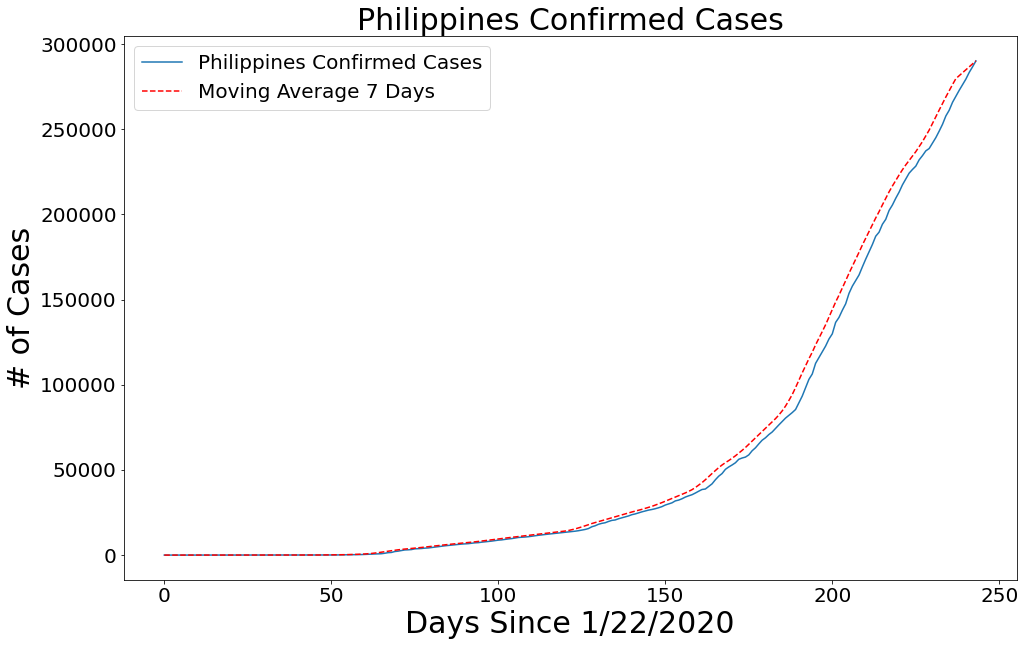

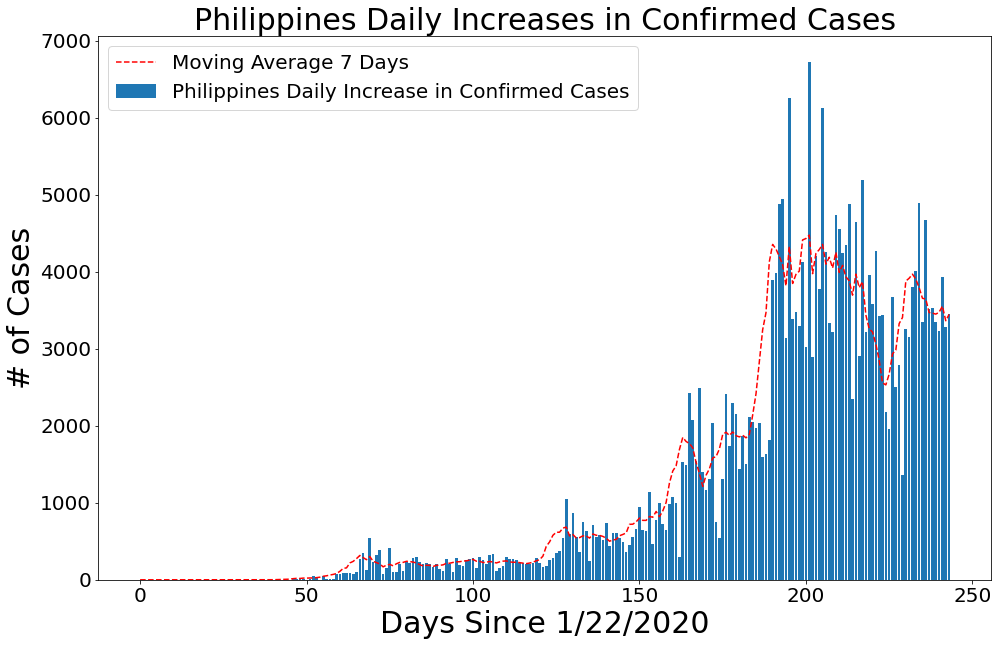

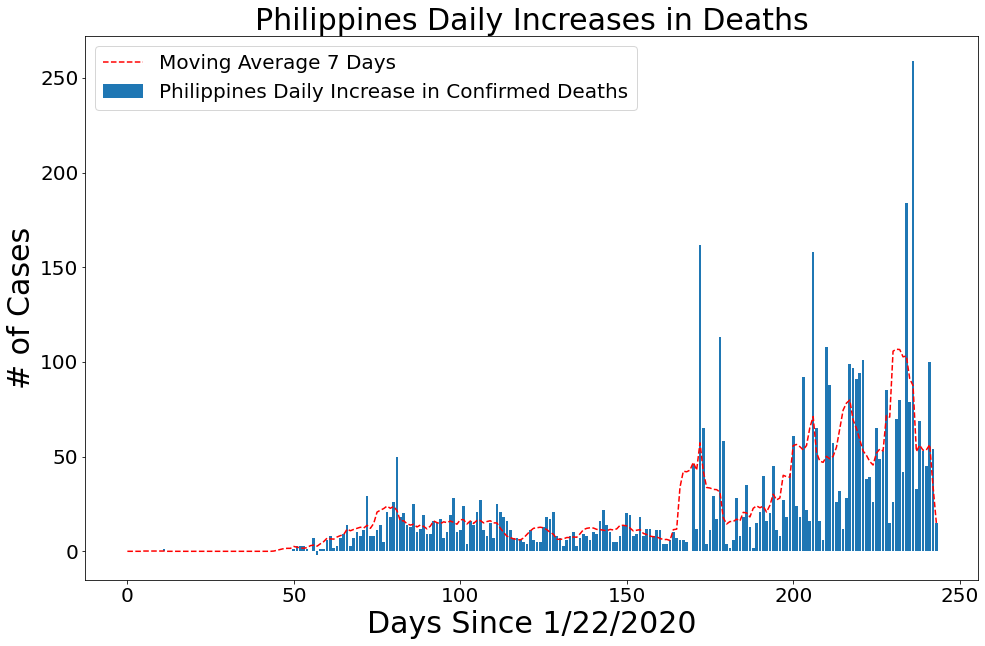

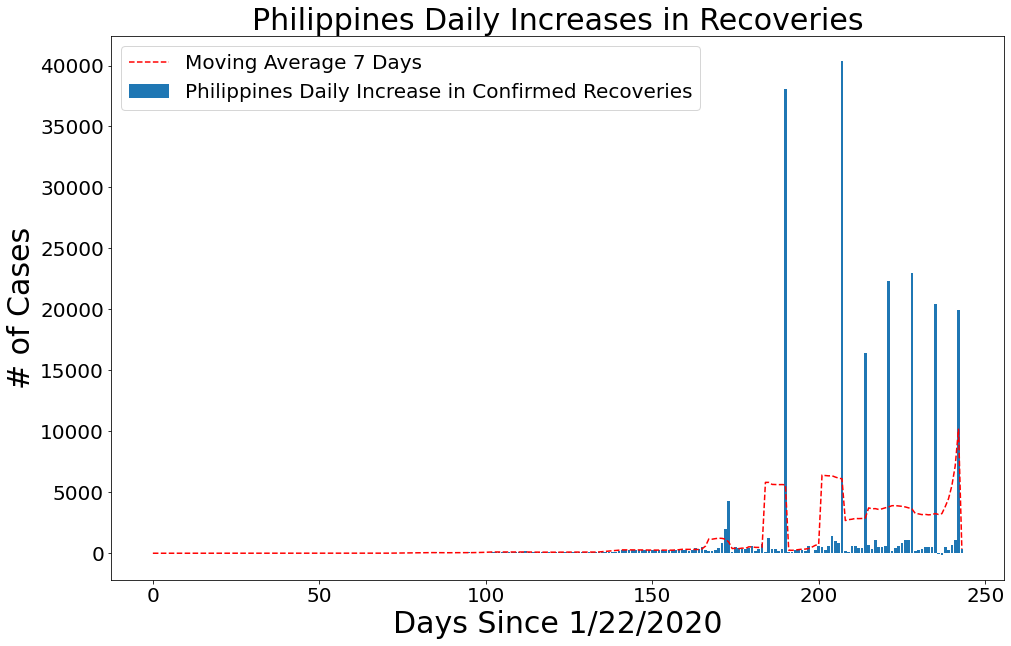

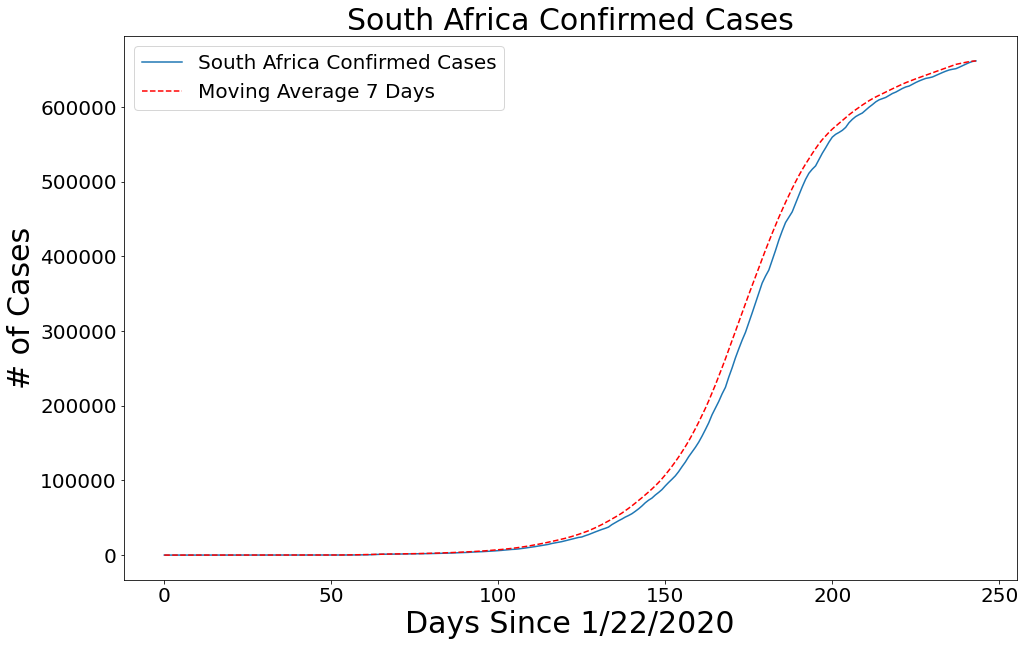

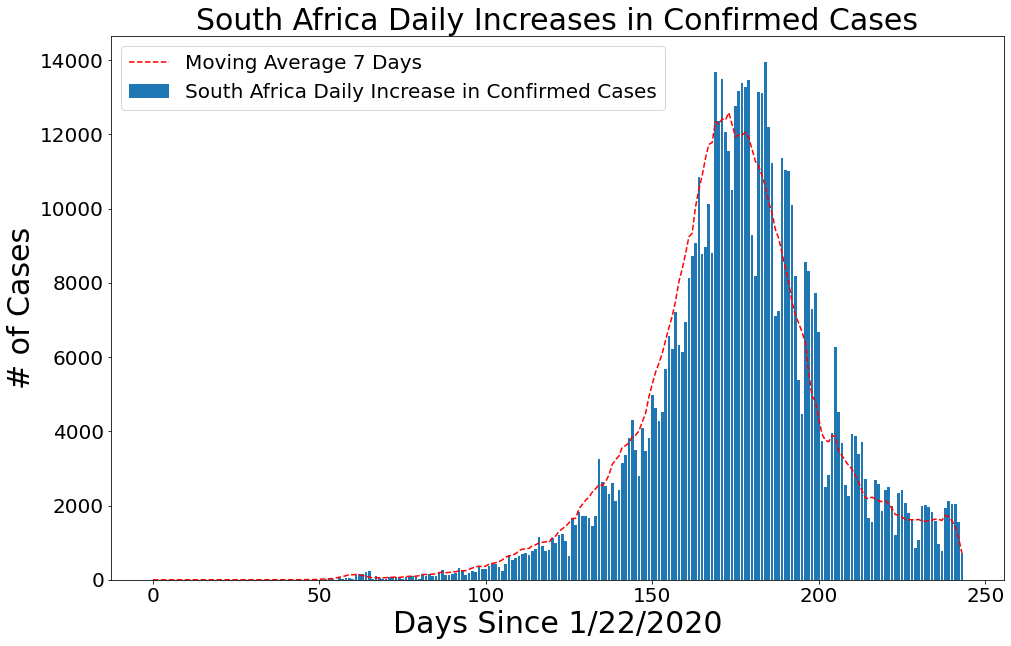

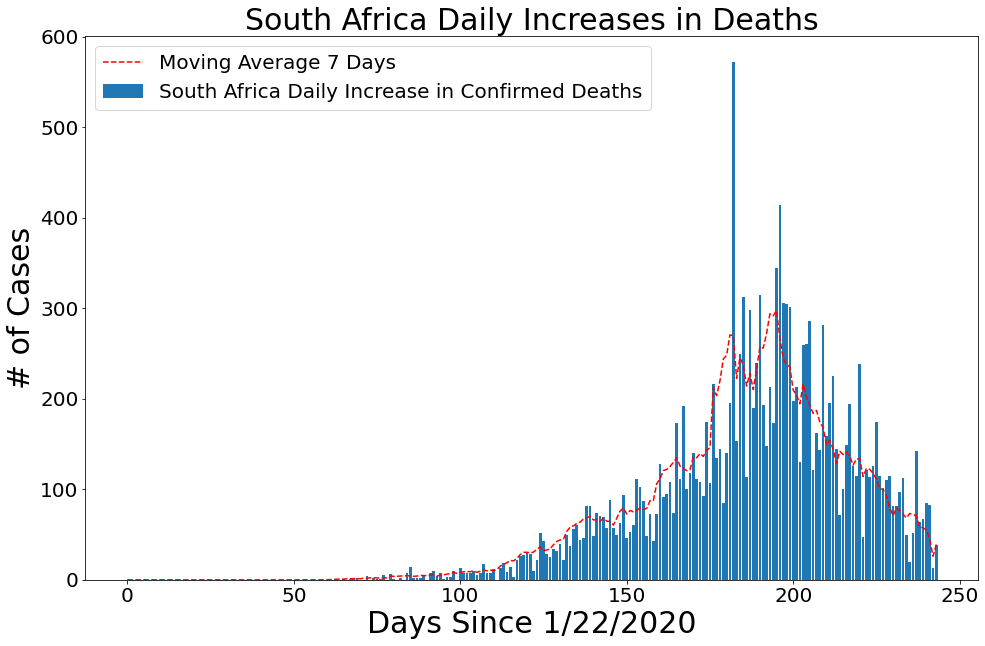

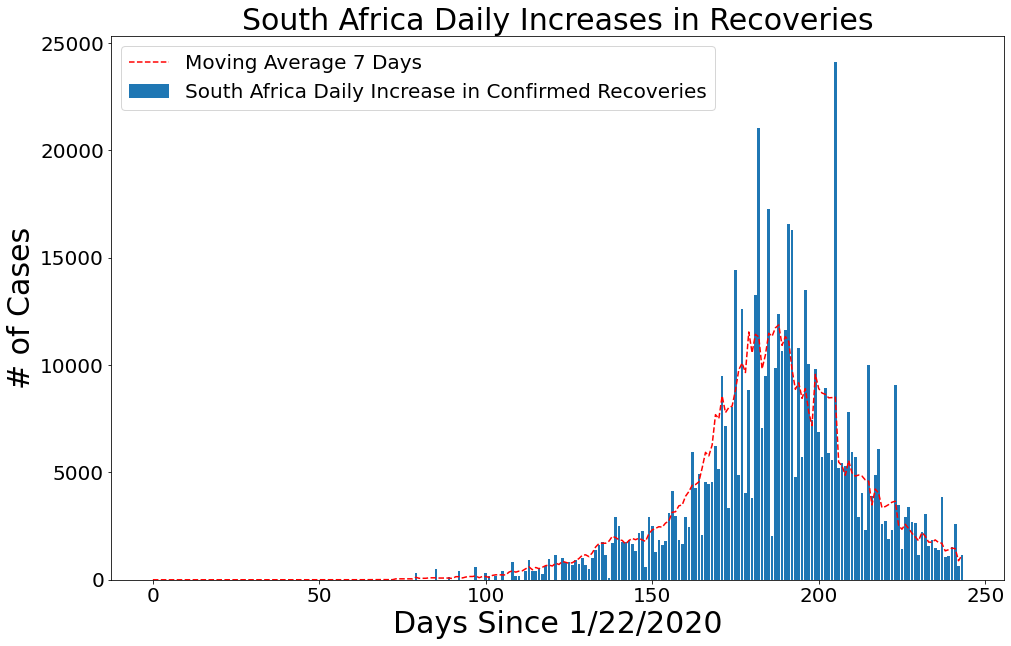

In [57]:
for country in compare_countries:
    country_visualizations(country)

# 4. Train Test Split

In [58]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Confirmed Cases
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[20:], 
                                                                         world_cases[20:], test_size=0.08, shuffle=False) 

# Death Cases
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(days_since_1_22[20:], 
                                                                         total_deaths[20:], test_size=0.08, shuffle=False)

# Recovery Cases
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22[20:], 
                                                                         total_recovered[20:], test_size=0.08, shuffle=False)

# 5. Building a Model

### CONFIRMED CASES

#### Linear Regression

In [59]:
# Using Linear regression model to make predictions

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))


MAE: 6896272.977506774
MSE: 48198710240264.52


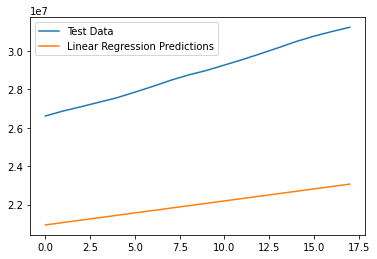

In [60]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Linear Regression Predictions'])

In [90]:
# Predictions for the next 10 days using Linear Regression

print('Linear regression future predictions for Confirmed Cases:')

print(linear_pred[-10:])


Linear regression future predictions for Confirmed Cases:
[[23191686.86483543]
 [23316796.49151472]
 [23441906.11819402]
 [23567015.74487332]
 [23692125.37155261]
 [23817234.99823191]
 [23942344.6249112 ]
 [24067454.2515905 ]
 [24192563.8782698 ]
 [24317673.50494909]]


#### SVR

In [62]:
# Building the SVM model

from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=2, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


RandomizedSearchCV(cv=2, estimator=SVR(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [63]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 1, 'C': 0.1}

In [64]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)
svm_confirmed

SVR(C=0.1, epsilon=1, gamma=0.01, kernel='poly', shrinking=False)

In [65]:
svm_pred

array([  680024.42679064,   680026.82413672,   680043.60555922,
         680089.15513458,   680177.85693923,   680324.0950496 ,
         680542.25354212,   680846.71649322,   681251.86797933,
         681772.09207688,   682421.77286229,   683215.29441201,
         684167.04080245,   685291.39611006,   686602.74441125,
         688115.46978246,   689843.95630012,   691802.58804065,
         694005.7490805 ,   696467.82349608,   699203.19536383,
         702226.24876018,   705551.36776156,   709192.93644439,
         713165.33888511,   717482.95916015,   722160.18134594,
         727211.3895189 ,   732650.96775547,   738493.30013208,
         744752.77072516,   751443.76361113,   758580.66286643,
         766177.85256748,   774249.71679072,   782810.63961258,
         791875.00510948,   801457.19735786,   811571.60043415,
         822232.59841477,   833454.57537616,   845251.91539474,
         857639.00254695,   870630.22090921,   884239.95455796,
         898482.58756963,   913372.50402

MAE: 2740291.610409854
MSE: 7876484475931.114


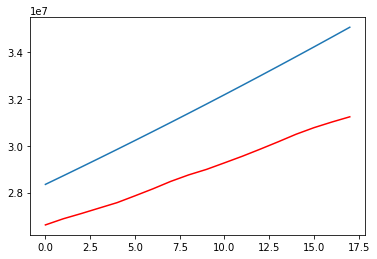

In [66]:
# check against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed, color='r')

print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [67]:
# Predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('09/22/2020', 35505752.98287886),
 ('09/23/2020', 35935695.42471442),
 ('09/24/2020', 36369161.96527521),
 ('09/25/2020', 36806166.98863775),
 ('09/26/2020', 37246724.8788786),
 ('09/27/2020', 37690850.02007408),
 ('09/28/2020', 38138556.79630046),
 ('09/29/2020', 38589859.5916345),
 ('09/30/2020', 39044772.79015217),
 ('10/01/2020', 39503310.7759305)}

#### Polynomial Regression

In [68]:
# transform our data for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

bayesian_poly = PolynomialFeatures(degree=2)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forecast = bayesian_poly.fit_transform(future_forecast)

In [69]:
# polynomial regression
linear_poly_model = LinearRegression(normalize=True, fit_intercept=False)
linear_poly_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_poly_pred = linear_poly_model.predict(poly_X_test_confirmed)
linear_poly_pred = linear_poly_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_poly_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_poly_pred, y_test_confirmed))

MAE: 77990.26191707907
MSE: 10082661726.532501


In [70]:
print(linear_poly_model.coef_)

[[ 1.44201498e+06 -6.23693508e+04  7.65220316e+02]]


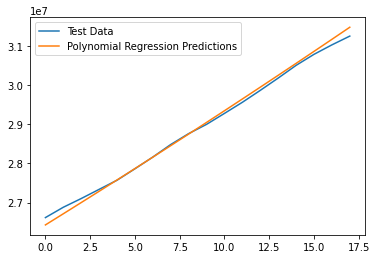

In [71]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_poly_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [72]:
# Predictions for the next 10 days using Polynomial Regression

print('Polynomial Regression predictions:')
print(linear_poly_pred[-10:])

Polynomial Regression predictions:
[[31782050.1339199 ]
 [32093873.51773946]
 [32407227.34219131]
 [32722111.60727547]
 [33038526.31299192]
 [33356471.45934066]
 [33675947.0463217 ]
 [33996953.07393505]
 [34319489.54218068]
 [34643556.45105862]]


#### Bayesian Ridge Polynomial Regression

In [73]:
# bayesian ridge polynomial regression
from sklearn.linear_model import BayesianRidge

tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [74]:
bayesian_search.best_params_

{'tol': 0.001,
 'normalize': True,
 'lambda_2': 0.001,
 'lambda_1': 1e-07,
 'alpha_2': 0.0001,
 'alpha_1': 0.001}

In [98]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forecast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))
bayesian_confirmed

MAE: 75596.97569887858
MSE: 9630500527.622984


BayesianRidge(alpha_1=0.001, alpha_2=0.0001, fit_intercept=False,
              lambda_1=1e-07, lambda_2=0.001, normalize=True)

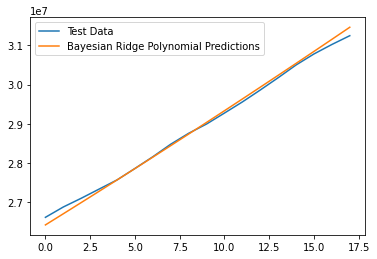

In [76]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

In [77]:
# Predictions for the next 10 days using Bayesian Ridge Polynomial Regression

print('Bayesian Ridge Regression predictions:')
print( bayesian_pred [-10:])

Bayesian Ridge Regression predictions:
[31771176.09905033 32082723.64822418 32395799.05779371 32710402.32775893
 33026533.45811982 33344192.4488764  33663379.30002866 33984094.01157661
 34306336.58352022 34630107.01585953]


### DEATH CASES

#### Linear Regression

In [78]:
linear_deaths = LinearRegression(normalize=True, fit_intercept=True)
linear_deaths.fit(X_train_deaths, y_train_deaths)
test_linear_deaths_pred = linear_deaths.predict(X_test_deaths)
linear_deaths_pred = linear_deaths.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_deaths_pred, y_test_deaths))
print('MSE:',mean_squared_error(test_linear_deaths_pred, y_test_deaths))

MAE: 53777.447713521855
MSE: 2909886193.9196563


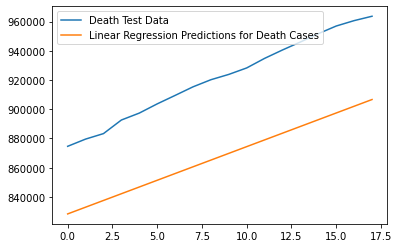

In [109]:
plt.plot(y_test_deaths)
plt.plot(test_linear_deaths_pred)
plt.legend(['Death Test Data', 'Linear Regression Predictions for Death Cases'])

In [93]:
# Predictions for the next 10 days using Linear Regression

print('Linear regression future predictions for Death Cases:')

print(linear_deaths_pred[-10:])

Linear regression future predictions for Death Cases:
[[911277.35812579]
 [915884.3903194 ]
 [920491.42251302]
 [925098.45470663]
 [929705.48690024]
 [934312.51909385]
 [938919.55128746]
 [943526.58348108]
 [948133.61567469]
 [952740.6478683 ]]


#### SVR

MAE: 222046.7213583942
MSE: 50910193215.36614


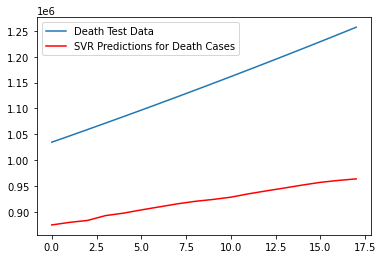

In [97]:
svm_deaths = SVR(C=0.1, epsilon=1, gamma=0.01, kernel='poly', shrinking=False) #based on best parameter
svm_deaths.fit(X_train_deaths, y_train_deaths)
svm_test_deaths_pred = svm_deaths.predict(X_test_deaths)
svm_deaths_pred = svm_deaths.predict(future_forecast)
plt.plot(svm_test_deaths_pred)
plt.plot(y_test_deaths, color='r')
plt.legend(['Death Test Data', 'SVR Predictions for Death Cases'])

print('MAE:', mean_absolute_error(svm_test_deaths_pred, y_test_deaths))
print('MSE:',mean_squared_error(svm_test_deaths_pred, y_test_deaths))

In [91]:
# Predictions for the next 10 days using SVM

print('SVM future predictions for Death Cases:')
set(zip(future_forecast_dates[-10:], svm_deaths_pred[-10:]))

SVM future predictions for Death Cases:


{('09/22/2020', 1271140.2427296513),
 ('09/23/2020', 1285353.4882036787),
 ('09/24/2020', 1299683.2350398903),
 ('09/25/2020', 1314129.9587545437),
 ('09/26/2020', 1328694.1348629673),
 ('09/27/2020', 1343376.2388815065),
 ('09/28/2020', 1358176.7463256088),
 ('09/29/2020', 1373096.1327105616),
 ('09/30/2020', 1388134.8735529971),
 ('10/01/2020', 1403293.4443681655)}

#### Polynomial Regression

In [118]:
# transform our data for polynomial regression

poly_deaths = PolynomialFeatures(degree=2)
poly_X_train_deaths = poly_deaths.fit_transform(X_train_deaths)
poly_X_test_deaths= poly_deaths.fit_transform(X_test_deaths)
poly_deaths_future_forecast = poly_deaths.fit_transform(future_forecast)

bayesian_poly_deaths = PolynomialFeatures(degree=2)
bayesian_poly_X_train_deaths = bayesian_poly_deaths.fit_transform(X_train_deaths)
bayesian_poly_X_test_deaths = bayesian_poly_deaths.fit_transform(X_test_deaths)
bayesian_poly_deaths_future_forecast = bayesian_poly_deaths.fit_transform(future_forecast)

MAE: 21242.030045599546
MSE: 486151659.059435


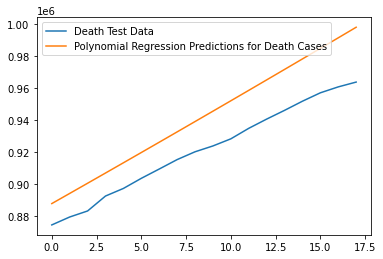

In [119]:
# polynomial regression
linear_poly_deaths = LinearRegression(normalize=True, fit_intercept=False)
linear_poly_deaths.fit(poly_X_train_deaths, y_train_deaths)
test_linear_poly_deaths_pred = linear_poly_deaths.predict(poly_X_test_deaths)
linear_poly_deaths_pred = linear_poly_deaths.predict(poly_deaths_future_forecast)
print('MAE:', mean_absolute_error(test_linear_poly_deaths_pred, y_test_deaths))
print('MSE:',mean_squared_error(test_linear_poly_deaths_pred, y_test_deaths))

plt.plot(y_test_deaths)
plt.plot(test_linear_poly_deaths_pred)
plt.legend(['Death Test Data', 'Polynomial Regression Predictions for Death Cases'])

In [120]:
# Predictions for the next 10 days using Polynomial Regression

print('Polynomial Regression predictions for Death Cases:')
print(linear_poly_deaths_pred[-10:])

Polynomial Regression predictions for Death Cases:
[[1004492.60207398]
 [1011125.69159196]
 [1017775.38813719]
 [1024441.69170967]
 [1031124.6023094 ]
 [1037824.11993637]
 [1044540.2445906 ]
 [1051272.97627207]
 [1058022.3149808 ]
 [1064788.26071677]]


#### Bayesian Ridge Polynomial Regression

MAE: 70383.7873552912
MSE: 5131432286.551772


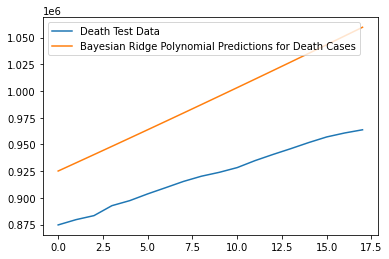

In [121]:
bayesian_deaths = BayesianRidge(alpha_1=0.001, alpha_2=0.0001, fit_intercept=False,
              lambda_1=1e-07, lambda_2=0.001, normalize=True)
bayesian_deaths.fit(bayesian_poly_X_train_deaths, y_train_deaths)
test_bayesian_deaths_pred = bayesian_deaths.predict(bayesian_poly_X_test_deaths)
bayesian_deaths_pred = bayesian_deaths.predict(bayesian_poly_deaths_future_forecast)
print('MAE:', mean_absolute_error(test_bayesian_deaths_pred, y_test_deaths))
print('MSE:',mean_squared_error(test_bayesian_deaths_pred, y_test_deaths))

plt.plot(y_test_deaths)
plt.plot(test_bayesian_deaths_pred)
plt.legend(['Death Test Data', 'Bayesian Ridge Polynomial Predictions for Death Cases'])

In [122]:
# Predictions for the next 10 days using Bayesian Ridge Polynomial Regression

print('Bayesian Ridge Regression predictions for Death Cases:')
print( bayesian_deaths_pred [-10:])

Bayesian Ridge Regression predictions for Death Cases:
[1067881.89056971 1076113.78889657 1084377.15455329 1092671.98753986
 1100998.28785628 1109356.05550256 1117745.2904787  1126165.99278469
 1134618.16242053 1143101.79938623]


### RECOVERED CASES

#### Linear Regression

MAE: 6398936.977344675
MSE: 41487120838770.16


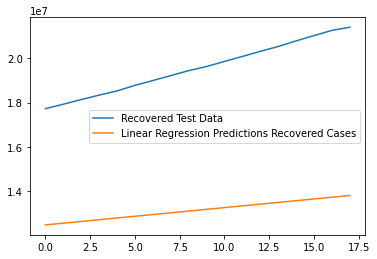

In [107]:
linear_recovered = LinearRegression(normalize=True, fit_intercept=True)
linear_recovered.fit(X_train_recovered, y_train_recovered)
test_linear_recovered_pred = linear_recovered.predict(X_test_recovered)
linear_recovered_pred = linear_recovered.predict(future_forecast)

print('MAE:', mean_absolute_error(test_linear_recovered_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_linear_recovered_pred, y_test_recovered))

plt.plot(y_test_recovered)
plt.plot(test_linear_recovered_pred)
plt.legend(['Recovered Test Data', 'Linear Regression Predictions Recovered Cases'])

In [108]:
# Predictions for the next 10 days using Linear Regression

print('Linear Regression future predictions for Recovered Cases:')

print(linear_recovered_pred[-10:])

Linear Regression future predictions for Recovered Cases:
[[13892642.9754265 ]
 [13970633.64296966]
 [14048624.31051282]
 [14126614.97805599]
 [14204605.64559915]
 [14282596.31314232]
 [14360586.98068548]
 [14438577.64822865]
 [14516568.31577181]
 [14594558.98331497]]


#### SVR

MAE: 162069.0789960801
MSE: 34763259392.034874


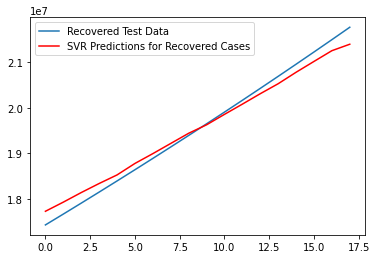

In [110]:
svm_recovered = SVR(C=0.1, epsilon=1, gamma=0.01, kernel='poly', shrinking=False) #based on best parameter
svm_recovered.fit(X_train_recovered, y_train_recovered)
svm_test_recovered_pred = svm_recovered.predict(X_test_recovered)
svm_recovered_pred = svm_recovered.predict(future_forecast)

plt.plot(svm_test_recovered_pred)
plt.plot(y_test_recovered, color='r')
plt.legend(['Recovered Test Data', 'SVR Predictions for Recovered Cases'])

print('MAE:', mean_absolute_error(svm_test_recovered_pred, y_test_recovered))
print('MSE:',mean_squared_error(svm_test_recovered_pred, y_test_recovered))

In [111]:
# Predictions for the next 10 days using SVM

print('SVM future predictions for Recovered Cases:')
set(zip(future_forecast_dates[-10:], svm_recovered_pred[-10:]))

SVM future predictions for Recovered Cases:


{('09/22/2020', 22042803.98378506),
 ('09/23/2020', 22320263.712275572),
 ('09/24/2020', 22599997.688154638),
 ('09/25/2020', 22882015.194064032),
 ('09/26/2020', 23166325.512647223),
 ('09/27/2020', 23452937.926545512),
 ('09/28/2020', 23741861.718401782),
 ('09/29/2020', 24033106.17085886),
 ('09/30/2020', 24326680.566558197),
 ('10/01/2020', 24622594.188142996)}

#### Polynomial Regression

In [124]:
# transform our data for polynomial regression

poly_recovered = PolynomialFeatures(degree=2)
poly_X_train_recovered = poly_recovered.fit_transform(X_train_recovered)
poly_X_test_recovered= poly_recovered.fit_transform(X_test_recovered)
poly_recovered_future_forecast = poly_recovered.fit_transform(future_forecast)

bayesian_poly_recovered = PolynomialFeatures(degree=2)
bayesian_poly_X_train_recovered = bayesian_poly_recovered.fit_transform(X_train_recovered)
bayesian_poly_X_test_recovered = bayesian_poly_recovered.fit_transform(X_test_recovered)
bayesian_poly_recovered_future_forecast = bayesian_poly_recovered.fit_transform(future_forecast)

MAE: 528284.543675805
MSE: 279913717053.52844


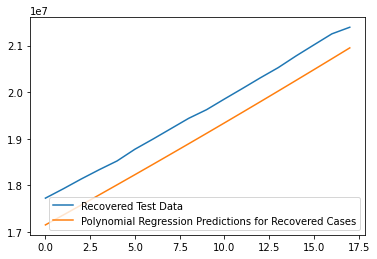

In [125]:
# polynomial regression
linear_poly_recovered = LinearRegression(normalize=True, fit_intercept=False)
linear_poly_recovered.fit(poly_X_train_recovered, y_train_recovered)
test_linear_poly_recovered_pred = linear_poly_recovered.predict(poly_X_test_recovered)
linear_poly_recovered_pred = linear_poly_recovered.predict(poly_recovered_future_forecast)

print('MAE:', mean_absolute_error(test_linear_poly_recovered_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_linear_poly_recovered_pred, y_test_recovered))

plt.plot(y_test_recovered)
plt.plot(test_linear_poly_recovered_pred)
plt.legend(['Recovered Test Data', 'Polynomial Regression Predictions for Recovered Cases'])

In [126]:
# Predictions for the next 10 days using Polynomial Regression

print('Polynomial Regression predictions for Recovered Cases:')
print(linear_poly_recovered_pred[-10:])

Polynomial Regression predictions for Recovered Cases:
[[21187205.86876691]
 [21423745.73869517]
 [21661585.19224952]
 [21900724.22942999]
 [22141162.85023656]
 [22382901.05466925]
 [22625938.84272804]
 [22870276.21441293]
 [23115913.16972394]
 [23362849.70866105]]


#### Bayesian Ridge Polynomial Regression

MAE: 534729.8640673676
MSE: 286725930468.3702


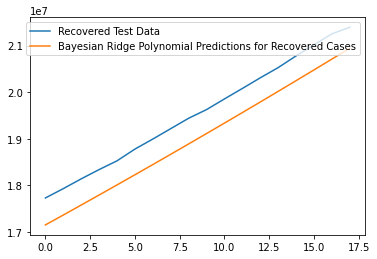

In [127]:
bayesian_recovered = BayesianRidge(alpha_1=0.001, alpha_2=0.0001, fit_intercept=False,
              lambda_1=1e-07, lambda_2=0.001, normalize=True)
bayesian_recovered.fit(bayesian_poly_X_train_recovered, y_train_recovered)
test_bayesian_recovered_pred = bayesian_recovered.predict(bayesian_poly_X_test_recovered)
bayesian_recovered_pred = bayesian_recovered.predict(bayesian_poly_recovered_future_forecast)

print('MAE:', mean_absolute_error(test_bayesian_recovered_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_bayesian_recovered_pred, y_test_recovered))

plt.plot(y_test_recovered)
plt.plot(test_bayesian_recovered_pred)
plt.legend(['Recovered Test Data', 'Bayesian Ridge Polynomial Predictions for Recovered Cases'])

In [128]:
# Predictions for the next 10 days using Bayesian Ridge Polynomial Regression

print('Bayesian Ridge Regression predictions for Recovered Cases:')
print( bayesian_recovered_pred [-10:])

Bayesian Ridge Regression predictions for Recovered Cases:
[21178879.06191449 21415207.70811236 21652833.96205772 21891757.82375061
 22131979.293191   22373498.3703789  22616315.05531431 22860429.34799724
 23105841.24842767 23352550.75660561]


# 6. Model Evaluation

### Prediction Graphs Comparison for Confirmed coronavirus cases worldwide

In [79]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Confirmed Cases vs. Prediction Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

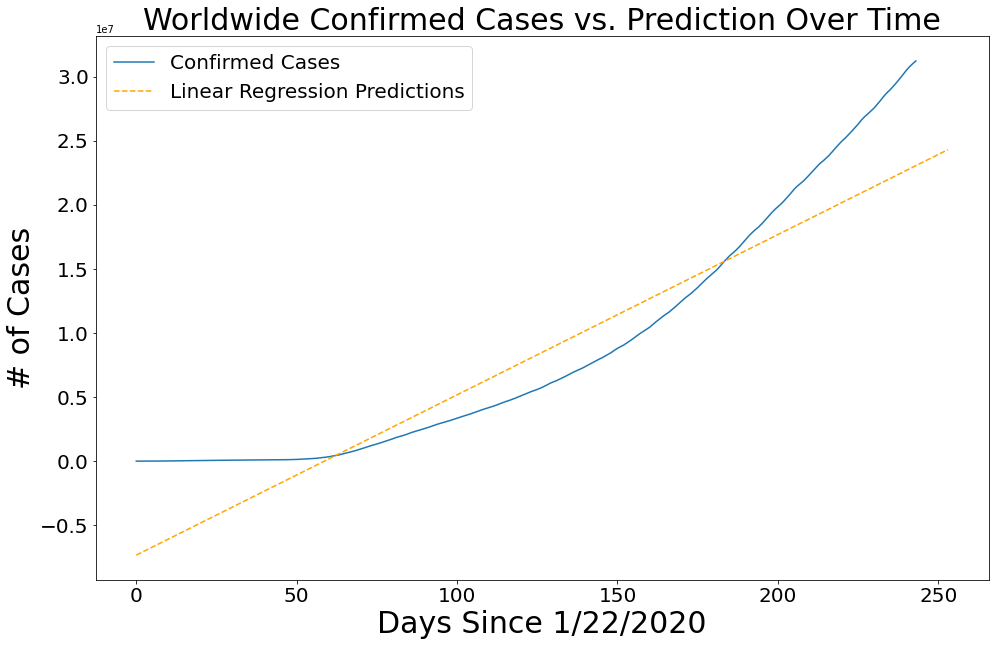

In [80]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Linear Regression Predictions', 'orange')

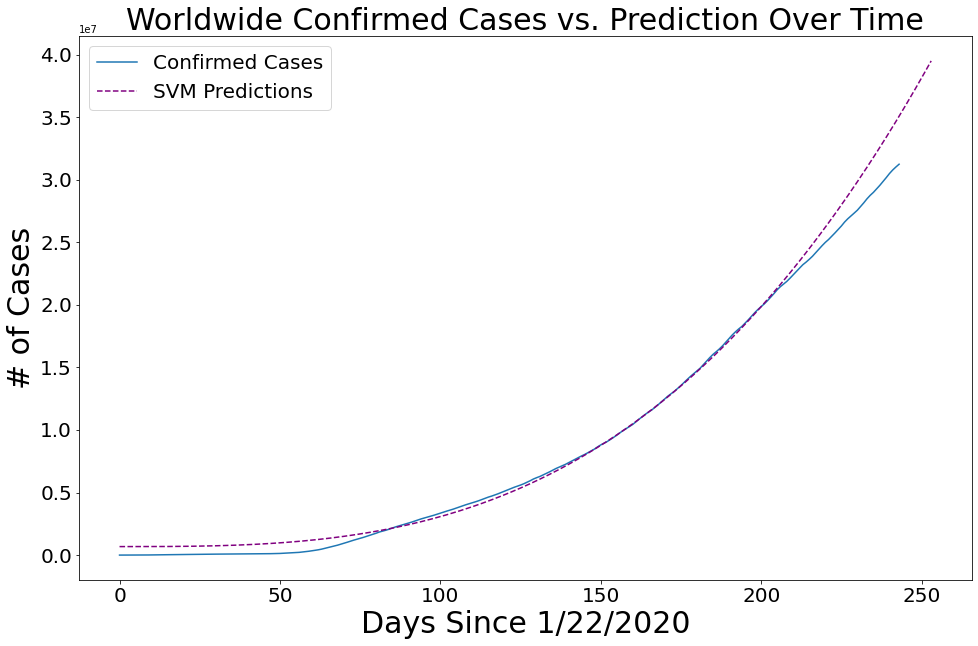

In [81]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

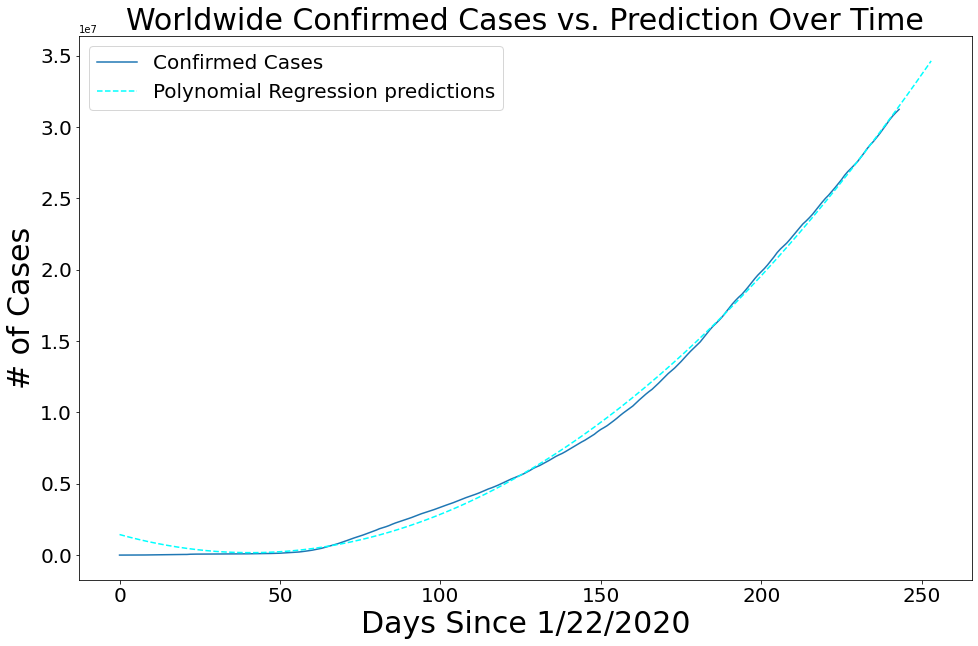

In [82]:
plot_predictions(adjusted_dates, world_cases, linear_poly_pred, 'Polynomial Regression predictions', 'cyan')

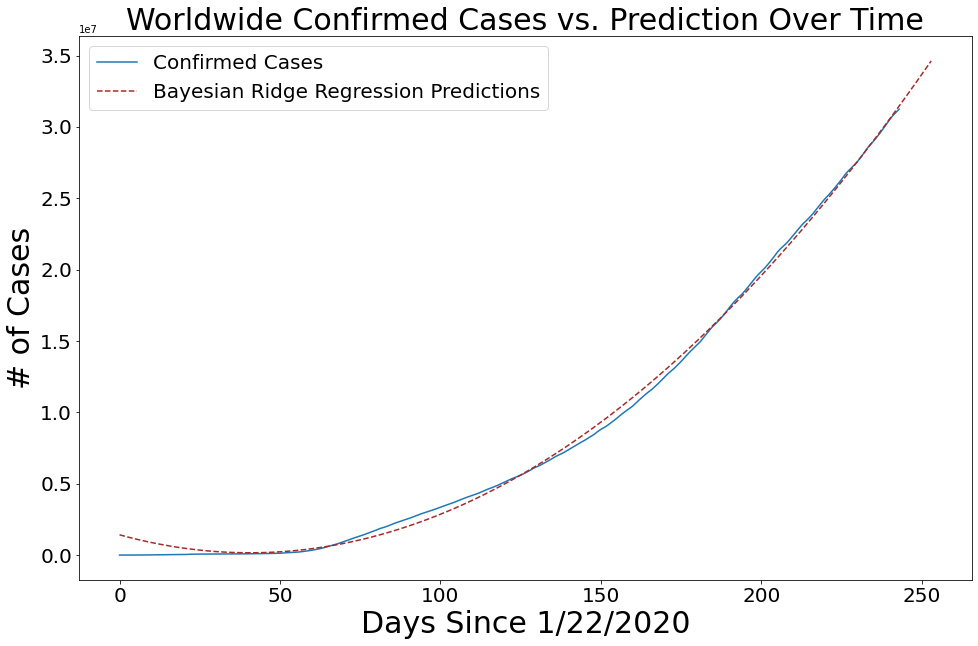

In [83]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'brown')

### Prediction Graphs Comparison for coronavirus Death Cases worldwide

In [129]:
def plot_death_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Death Cases vs. Prediction Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Death Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

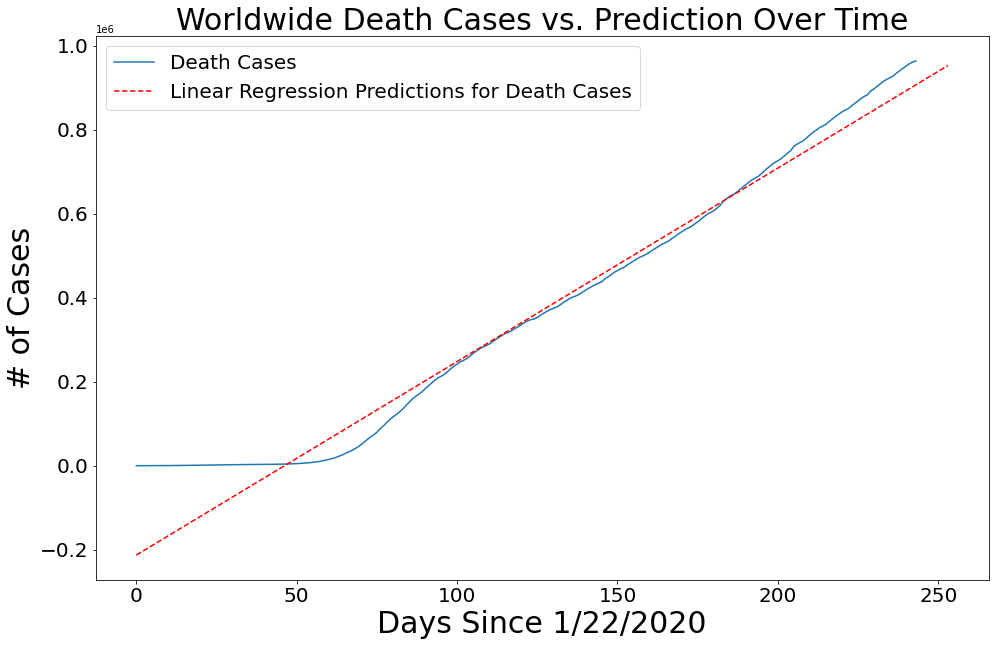

In [130]:
plot_death_predictions(adjusted_dates, total_deaths, linear_deaths_pred, 'Linear Regression Predictions for Death Cases', 'red')

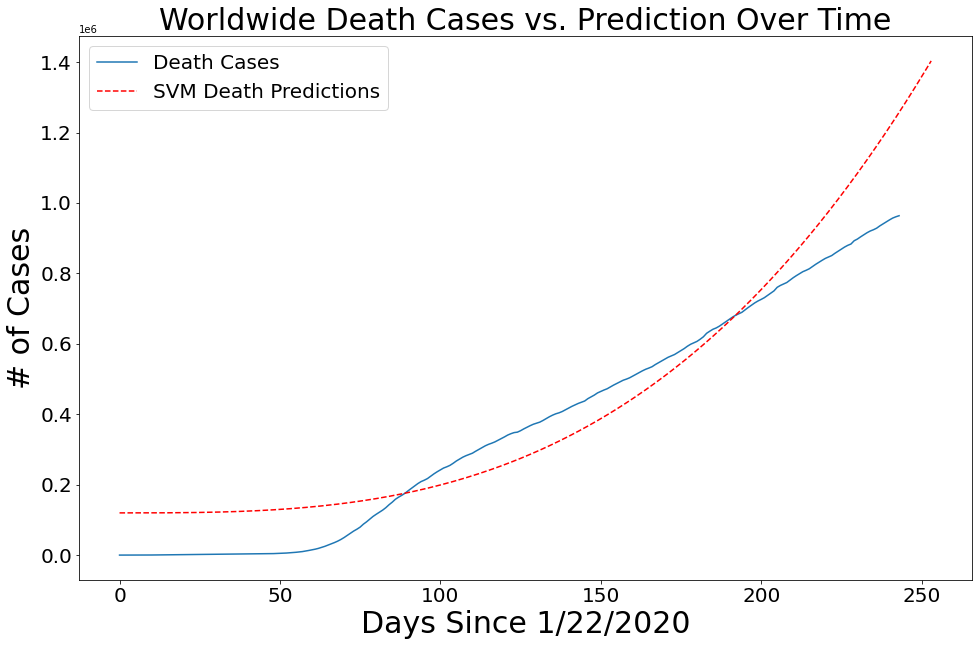

In [132]:
plot_death_predictions(adjusted_dates, total_deaths,svm_deaths_pred, 'SVM Death Predictions', 'red')

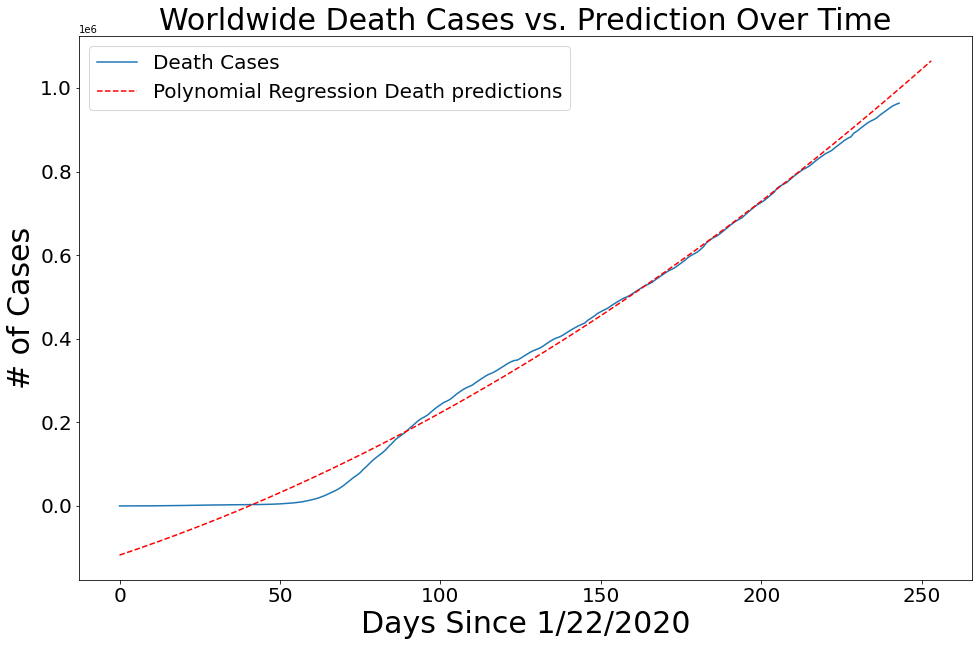

In [133]:
plot_death_predictions(adjusted_dates, total_deaths, linear_poly_deaths_pred, 'Polynomial Regression Death predictions','red')

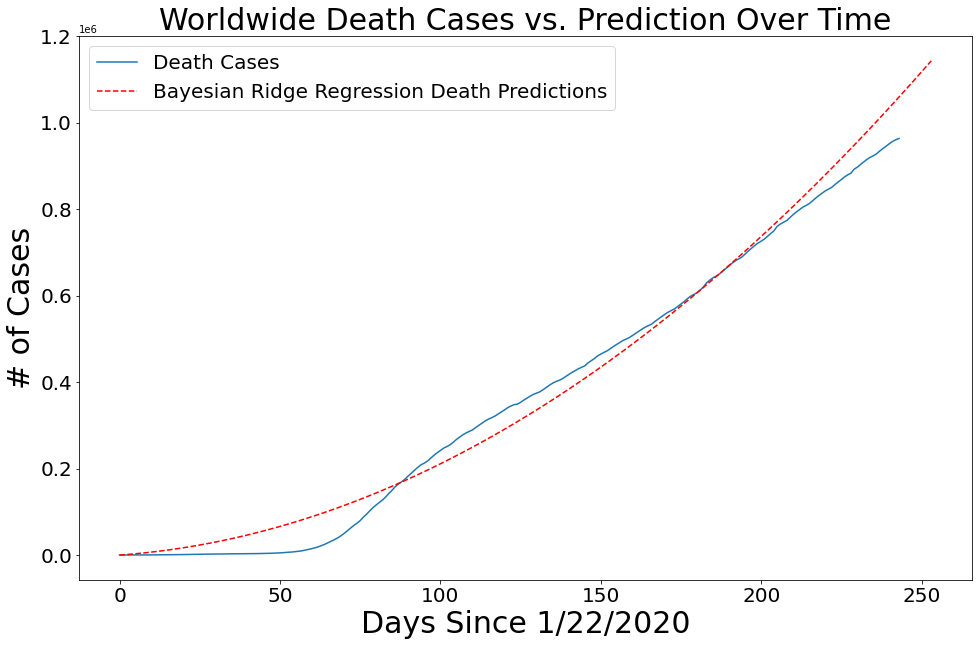

In [134]:
plot_death_predictions(adjusted_dates, total_deaths, bayesian_deaths_pred, 'Bayesian Ridge Regression Death Predictions', 'red')

### Prediction Graphs Comparison for coronavirus Recovery Cases worldwide

In [135]:
def plot_recovery_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Recovery Cases vs. Prediction Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Recovery Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

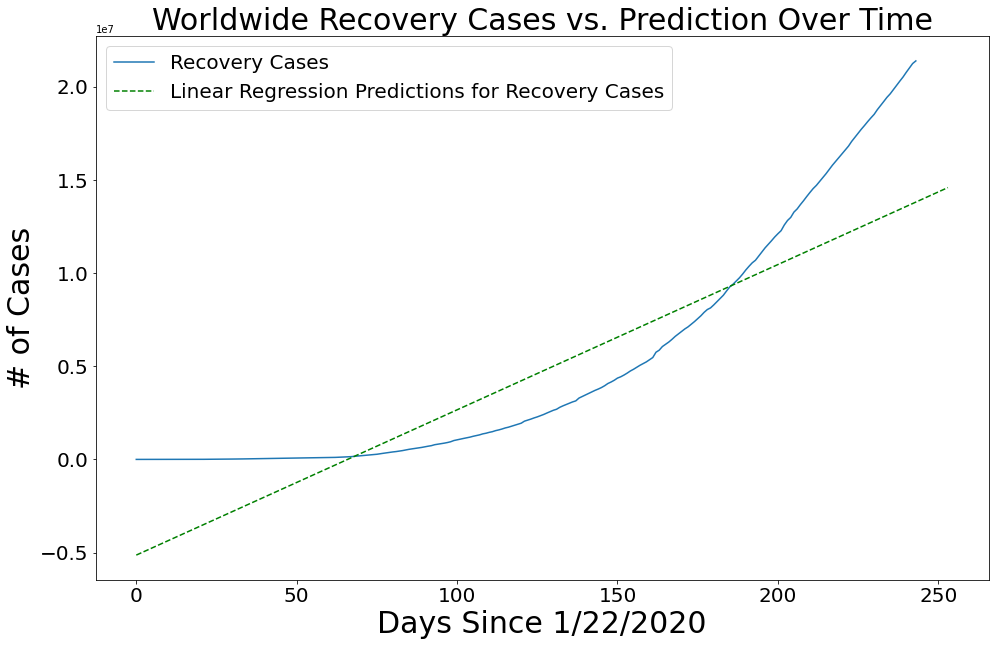

In [136]:
plot_recovery_predictions(adjusted_dates, total_recovered, linear_recovered_pred, 
                          'Linear Regression Predictions for Recovery Cases', 'green')

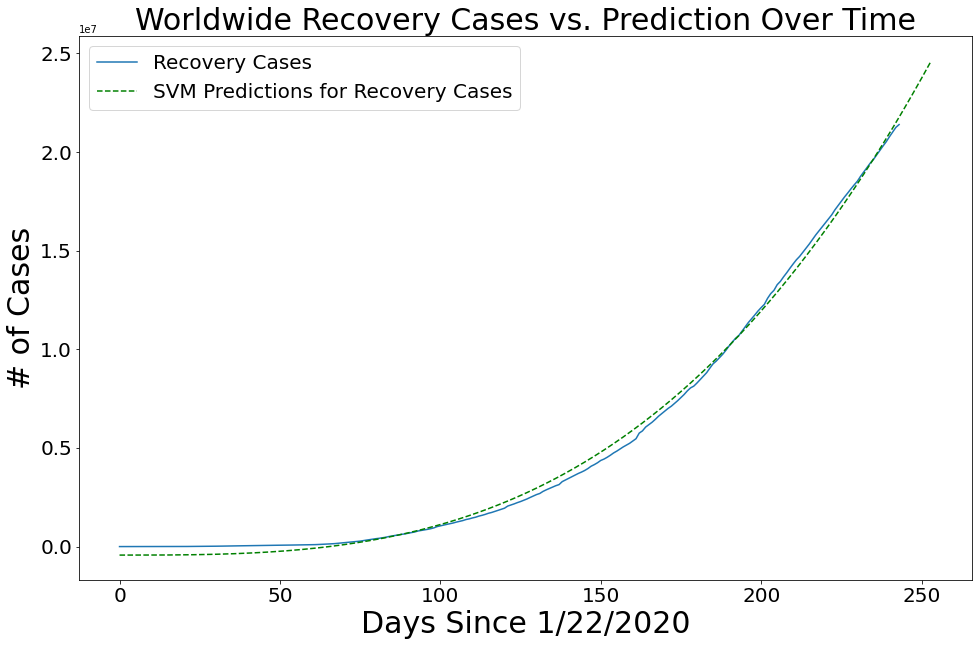

In [138]:
plot_recovery_predictions(adjusted_dates, total_recovered, svm_recovered_pred, 
                          'SVM Predictions for Recovery Cases', 'green')

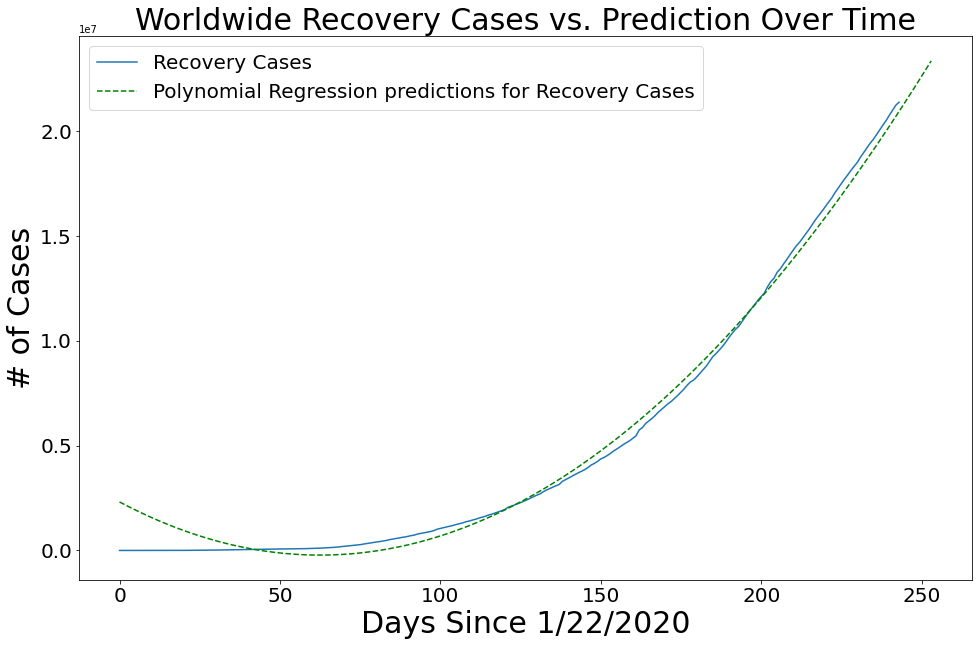

In [139]:
plot_recovery_predictions(adjusted_dates, total_recovered, linear_poly_recovered_pred, 
                          'Polynomial Regression predictions for Recovery Cases', 'green')

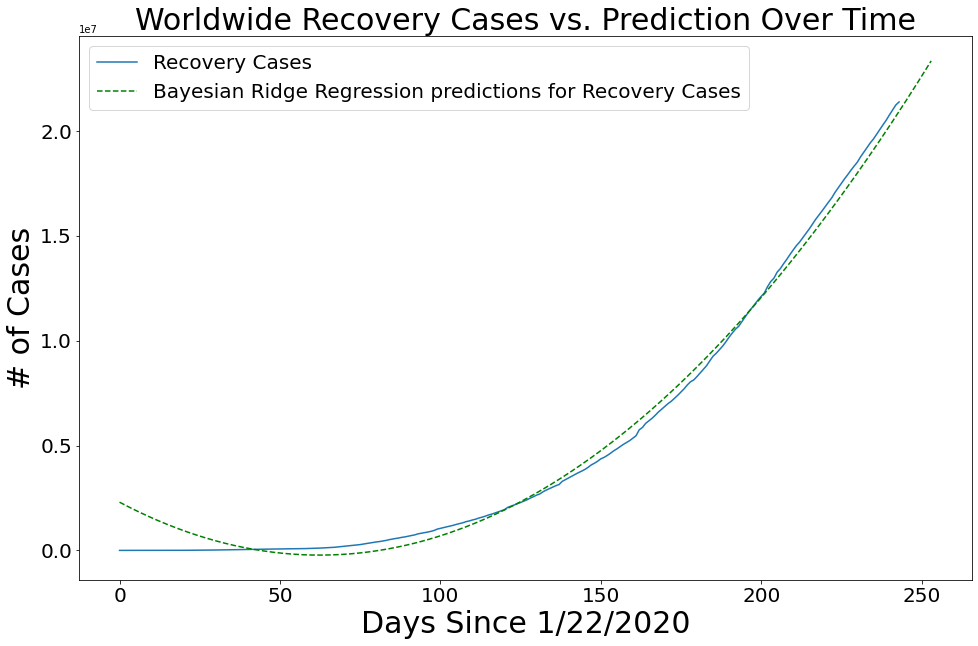

In [140]:
plot_recovery_predictions(adjusted_dates, total_recovered, bayesian_recovered_pred, 
                          'Bayesian Ridge Regression predictions for Recovery Cases', 'green')


# 7. Conclusion

#### Confirmed and Death Cases dataset
* Polynomial Regression and Bayesian Ridge Regression Model are the most accurate prediction based on the graph representation upon evaluating the model.
#### Recovered Cases dataset
* Support Vector Regression (SVR) Model is the most accurate prediction based on the graph representation upon evaluating the model. 

#### Evaluation Using Mean Squared Error
 1. Confirmed Cases - Baysean Ridge Model has the lowest value of MSE @ 9630500527.62298
 2. Death Cases - Polynomial Regression has the lowest value of MSE @ 486151659.059435
 3. Recovered Cases - Support Vector Regression (SVR) has the lowest value of MSE @ 34763259392.0348